#  <span style='color:DarkBlue'>P7 - Implémentez un modèle de scoring</span>

<div style="text-align:center">
    <img src="images/logo_proj7_credit.png" width="50%">
</div>

# <span class='bg-primary'>P7_01 - EDA Part 2</span>

## <span style='background:PowderBlue' id="#section_2">1. Introduction</span>

In [73]:
# Chargement des librairies
import datetime
import sys
import time
from datetime import datetime
import warnings
#import jyquickhelper
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import fonctions_data
#import eda_kernel_fonctions
# import phik
# Plotly
import plotly
# import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from xplotter.insights import *

# Warnings
warnings.filterwarnings('ignore')
plotly.offline.init_notebook_mode(connected=True)

# %matplotlib inline
# # Chargement à chaud des librairies personnelles
# %load_ext autoreload
# %autoreload 2
# # Valide code pep8
# %load_ext pycodestyle_magic
# %pycodestyle_on
# %pycodestyle_off

# Versions
print('Version des librairies utilisées :')
print('Python                : ' + sys.version)
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Outils dataframe      : ' + fonctions_data.__version__)
now = datetime.now().isoformat()
print('Lancé le           : ' + now)

Version des librairies utilisées :
Python                : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
NumPy                 : 1.24.4
Pandas                : 1.5.3
Outils dataframe      : 0.0.0
Lancé le           : 2024-04-19T20:16:29.988039


## <span style='background:PowderBlue' id="#section_2">2. Dataset</span>

**Chargement des fichiers**

In [2]:
# Importation des données train et test

train = pd.read_csv('home_credit_default_risk/application_train.csv')
test = pd.read_csv('home_credit_default_risk/application_test.csv')

In [3]:
# Créer une liste contenant les noms des fichiers
noms_fichiers = ['home_credit_default_risk/bureau.csv', 'home_credit_default_risk/bureau_balance.csv', \
                 'home_credit_default_risk/credit_card_balance.csv', 'home_credit_default_risk/installments_payments.csv', \
                 'home_credit_default_risk/POS_CASH_balance.csv']

# Pour chaque nom de fichier dans la liste, lire le fichier avec pandas
for nom_fichier in noms_fichiers:
    fichier = pd.read_csv(nom_fichier)
    print("Lecture du fichier : ", nom_fichier)
    print(fichier.head())
    print(fichier.shape)
    print("--------------------------------------------------")

Lecture du fichier :  home_credit_default_risk/bureau.csv
   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                

**Vue d'ensemble**

In [4]:
# Vue d'ensemble des 9 jeux de données
# telechargment des 8 tables de l'organigramme

application_train = pd.read_csv('home_credit_default_risk/application_train.csv')
application_test = pd.read_csv('home_credit_default_risk/application_test.csv')
bureau = pd.read_csv('home_credit_default_risk/bureau.csv')
bureau_balance = pd.read_csv('home_credit_default_risk/bureau_balance.csv')
credit_card_balance = pd.read_csv('home_credit_default_risk/credit_card_balance.csv')
installment_payment = pd.read_csv('home_credit_default_risk/installments_payments.csv')
cash_balance = pd.read_csv('home_credit_default_risk/POS_CASH_balance.csv')
previous_application = pd.read_csv('home_credit_default_risk/previous_application.csv')
homecredit_columns_description = pd.read_csv('home_credit_default_risk/homecredit_columns_description.csv', encoding='latin-1')

dataframes = [application_train, application_test, bureau, bureau_balance,
              credit_card_balance, installment_payment, cash_balance,
              previous_application, homecredit_columns_description]
noms = ['application_train', 'application_test', 'bureau', 'bureau_balance',
        'cc_balance', 'installments_payments', 'POS_CASH_balance',
        'previous_application', 'HomeCredit_columns_description']
fonctions_data.resume_datasets(dataframes, noms)

Les données se décomposent en 9 fichier(s).


### <span style='background:orange'>2.1 Fichier bureau.csv</span>

#### <span style='background:Moccasin'>2.1.1. statistique des variables</span>

<span style='background:mistyrose'>**Compréhension des variables**</span>

In [5]:
df_var_bureau = \
    homecredit_columns_description[homecredit_columns_description['Table']
                                   == 'bureau.csv']
df_var_bureau.style.hide_index()

<span style='background:mistyrose'>**Statistiques**</span>

-------------------------------------------------------------
Type de variable pour chacune des variables



SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

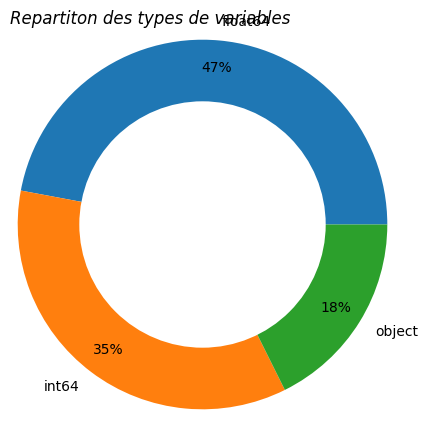

In [6]:
# Types des variables
fonctions_data.affichage_types_var(bureau, True, True, True)

In [7]:
# Résumé des variables qualitatives
fonctions_data.detail_type_var(bureau, type_var='cat')

CREDIT_ACTIVE CREDIT_CURRENCY      CREDIT_TYPE
type          object          object           object
nb_nan           0.0             0.0              0.0
%_nan            0.0             0.0              0.0
count        1716428         1716428          1716428
unique             4               4               15
top           Closed      currency 1  Consumer credit
freq         1079273         1715020          1251615

In [8]:
# Résumé des variables qualitatives
fonctions_data.detail_type_var(bureau, type_var='num')

SK_ID_CURR    SK_ID_BUREAU  DAYS_CREDIT CREDIT_DAY_OVERDUE  \
type            int64           int64        int64              int64   
nb_nan            0.0             0.0          0.0                0.0   
%_nan             0.0             0.0          0.0                0.0   
count       1716428.0       1716428.0    1716428.0          1716428.0   
mean    278214.933645  5924434.489032 -1142.107685           0.818167   
std     102938.558112   532265.728552   795.164928          36.544428   
min          100001.0       5000000.0      -2922.0                0.0   
25%         188866.75      5463953.75      -1666.0                0.0   
50%          278055.0       5926303.5       -987.0                0.0   
75%          367426.0      6385681.25       -474.0                0.0   
max          456255.0       6843457.0          0.0             2792.0   

       DAYS_CREDIT_ENDDATE DAYS_ENDDATE_FACT AMT_CREDIT_MAX_OVERDUE  \
type               float64           float64                float64   
nb_nan            105553.0          633653.0              1124488.0   
%_nan             6.149573         36.916958              65.513264   
count            1610875.0         1082775.0               591940.0   
mean            510.517362      -1017.437148            3825.417661   
std            4994.219837        714.010626          206031.606207   
min               -42060.0          -42023.0                    0.0   
25%                -1138.0           -1489.0                    0.0   
50%                 -330.0            -897.0                    0.0   
75%                  474.0            -425.0                    0.0   
max                31199.0               0.0            115987185.0   

       CNT_CREDIT_PROLONG AMT_CREDIT_SUM AMT_CREDIT_SUM_DEBT  \
type                int64        float64             float64   
nb_nan                0.0           13.0            257669.0   
%_nan                 0.0       0.000757           15.011932   
count           1716428.0      1716415.0           1458759.0   
mean              0.00641  354994.591918       137085.119952   
std              0.096224  1149811.34398       677401.130952   
min                   0.0            0.0         -4705600.32   
25%                   0.0        51300.0                 0.0   
50%                   0.0       125518.5                 0.0   
75%                   0.0       315000.0             40153.5   
max                   9.0    585000000.0         170100000.0   

       AMT_CREDIT_SUM_LIMIT AMT_CREDIT_SUM_OVERDUE DAYS_CREDIT_UPDATE  \
type                float64                float64              int64   
nb_nan             591780.0                    0.0                0.0   
%_nan             34.477415                    0.0                0.0   
count             1124648.0              1716428.0          1716428.0   
mean             6229.51498              37.912758         -593.74832   
std            45032.031476            5937.650035         720.747312   
min             -586406.115                    0.0           -41947.0   
25%                     0.0                    0.0             -908.0   
50%                     0.0                    0.0             -395.0   
75%                     0.0                    0.0              -33.0   
max              4705600.32              3756681.0              372.0   

          AMT_ANNUITY  
type          float64  
nb_nan      1226791.0  
%_nan        71.47349  
count        489637.0  
mean       15712.7577  
std     325826.949053  
min               0.0  
25%               0.0  
50%               0.0  
75%           13500.0  
max       118453423.5

Valeurs manquantes :3939947 NaN pour 29179276 données (13.5 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



Nombres de valeurs manquantes  % de valeurs manquantes
AMT_ANNUITY                                   1226791                    71.47
AMT_CREDIT_MAX_OVERDUE                        1124488                    65.51
DAYS_ENDDATE_FACT                              633653                    36.92
AMT_CREDIT_SUM_LIMIT                           591780                    34.48
AMT_CREDIT_SUM_DEBT                            257669                    15.01
DAYS_CREDIT_ENDDATE                            105553                     6.15
AMT_CREDIT_SUM                                     13                     0.00

-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


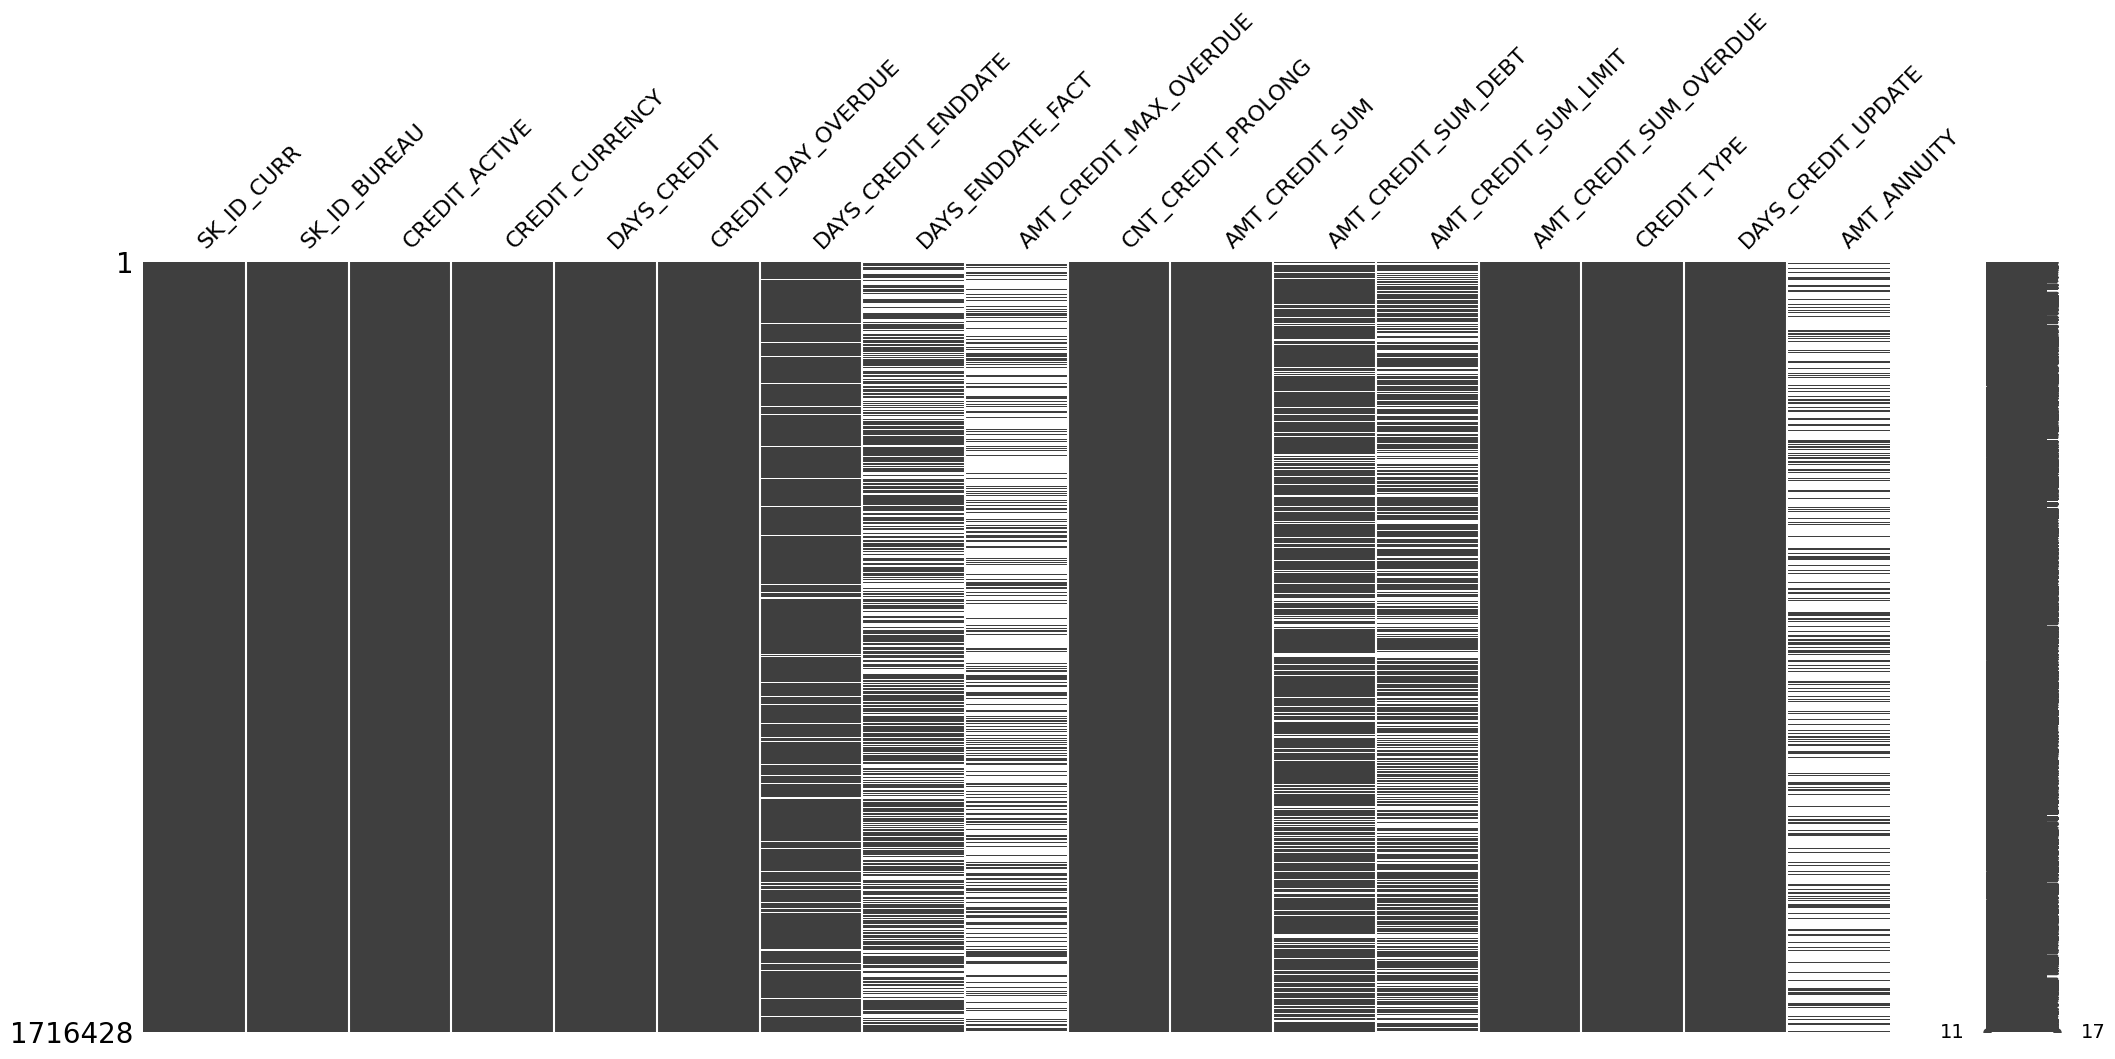

In [9]:
# Visualisation des données manquantes dans le dataset
fonctions_data.get_val_manq(bureau, True, True)

**Bilan** :
***
- On peut voir sur le graphique ci-dessus que 6 variables sur 17 contiennent des valeurs manquantes, avec 1,7 millions de points de données.
- Les valeurs NaN les plus élevées sont observées avec la variable AMT_ANNUITY qui a plus de 70% de valeurs manquantes, suivi de la variable AMT_CREDIT_MAX_OVERDUE (65,5 %). 

**Préparation du dataframe de travail**

In [5]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
print('Création dataframe de travail : merge TARGET avec dataframe bureau')
bureau_merged = application_train.iloc[:, :2].merge(bureau,
                                                    on='SK_ID_CURR',
                                                    how='left')
print("-"*79)

-------------------------------------------------------------------------------
Création dataframe de travail : merge TARGET avec dataframe bureau
-------------------------------------------------------------------------------


#### <span style='background:Moccasin'>2.1.2. Analyse univariée des colonnes</span>

<span style='background:violet'>**Analyse des données catégorielles**</span>

In [71]:
# Liste des variables qualitatives
cols_cat_bureau = \
    bureau.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_bureau

['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

<span style='background:mistyrose'>**Variable CREDIT_ACTIVE**</span>

Cette variable décrit l'état du prêt précédent rapporté par le bureau de crédit.

In [68]:
def categ_var_bar(data, var, couleur, titre, taille, rotation=0, plot_defaulter=True):
    
    
    fig, axs = plt.subplots(1, 2, figsize=taille, tight_layout=True)
    
    # Premier graphique
    plot_countplot(df=data, 
                   col=var, 
                   order=True,
                   palette=couleur, ax=axs[0], orient='v', size_labels=12)
    axs[0].tick_params(axis='x', labelrotation=rotation)
    axs[0].set_title(titre, fontsize=14, fontstyle='italic')

    if plot_defaulter: 

        # Deuxième graphique
        percentage_defaulter_per_category = (data[var][data.TARGET == 1].value_counts() * 100 / data[var].value_counts()).dropna().sort_values(ascending=False)
        
        sns.barplot(x=percentage_defaulter_per_category.index,
                    y=percentage_defaulter_per_category, palette=custom_palette, ax=axs[1])
        axs[1].set_ylabel('Pourcentage par catégorie pour les défaillants', fontsize=12)
        axs[1].set_xlabel(var, fontsize=12)
        axs[1].tick_params(axis='x', labelrotation=rotation)
        axs[1].set_title('Défaillants seuls', fontsize=14, pad=20, fontstyle='italic')
        
        # Ajuster l'espacement horizontal entre les sous-graphiques
        plt.subplots_adjust(wspace=0.5)
        
    plt.show()


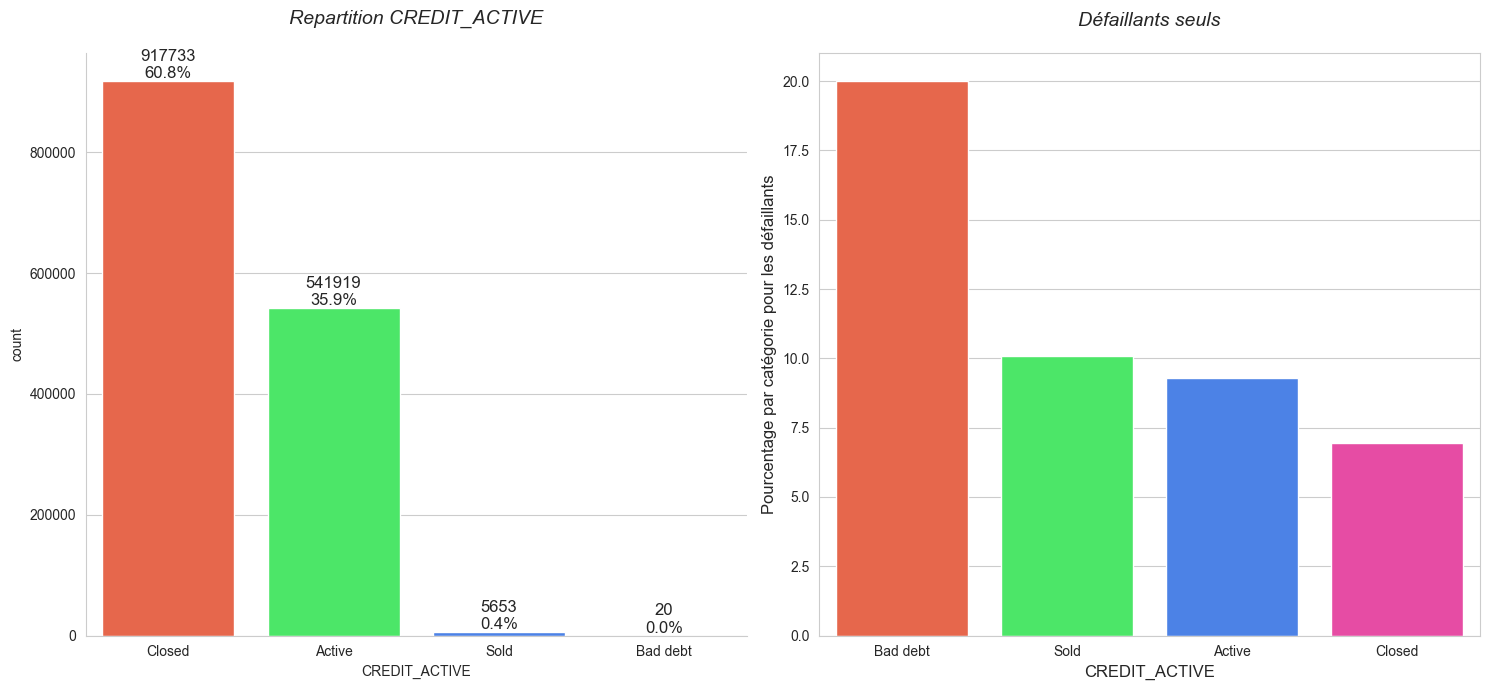

In [167]:
# import matplotlib.pyplot as plt
# import seaborn as sns

custom_palette = ['#FF5733', '#33FF57', '#337AFF', '#FF33A8']

categ_var_bar(bureau_merged, 'CREDIT_ACTIVE', custom_palette, "Repartition CREDIT_ACTIVE\n", (15, 7), plot_defaulter=True)

**Bilan** :
***
À partir du graphique ci-dessus, nous pouvons tirer les conclusions suivantes :

- Dans le premier sous-graphe, nous voyons que la majorité des prêts antérieurs d'autres institutions financières sont des prêts fermés (60,8%), suivis par 35,9% de prêts actifs. Les prêts vendus et les prêts pour créances douteuses sont très peu nombreux.
- Si nous examinons le pourcentage de défaillants par catégorie, nous constatons qu'environ 20 % des personnes ayant des créances douteuses ont fait défaut, ce qui représente le taux de défaillance le plus élevé. Cette catégorie est suivie par les prêts vendus et les prêts actifs. Le taux de défaillance le plus faible concerne les prêts fermés, qui témoignent d'un bon historique du demandeur. La courbe observée ici est donc tout à fait logique et attendue.

***Note*** :
***
Les 'Bad credit loans' sont destinés aux personnes dont le dossier de crédit est loin d'être irréprochable ou qui ont peu ou pas d'antécédents de crédit. Ces prêts ont généralement des taux d'intérêt plus élevés et des restrictions plus importantes que les autres prêts, car cela permet aux prêteurs de réduire le risque que vous ne les remboursiez pas. Cependant, ils peuvent être utiles s'ils sont gérés de manière responsable.

<span style='background:mistyrose'>**Variable CREDIT_CURRENCY**</span>

Cette variable décrit devise recodée du crédit du bureau de crédit.

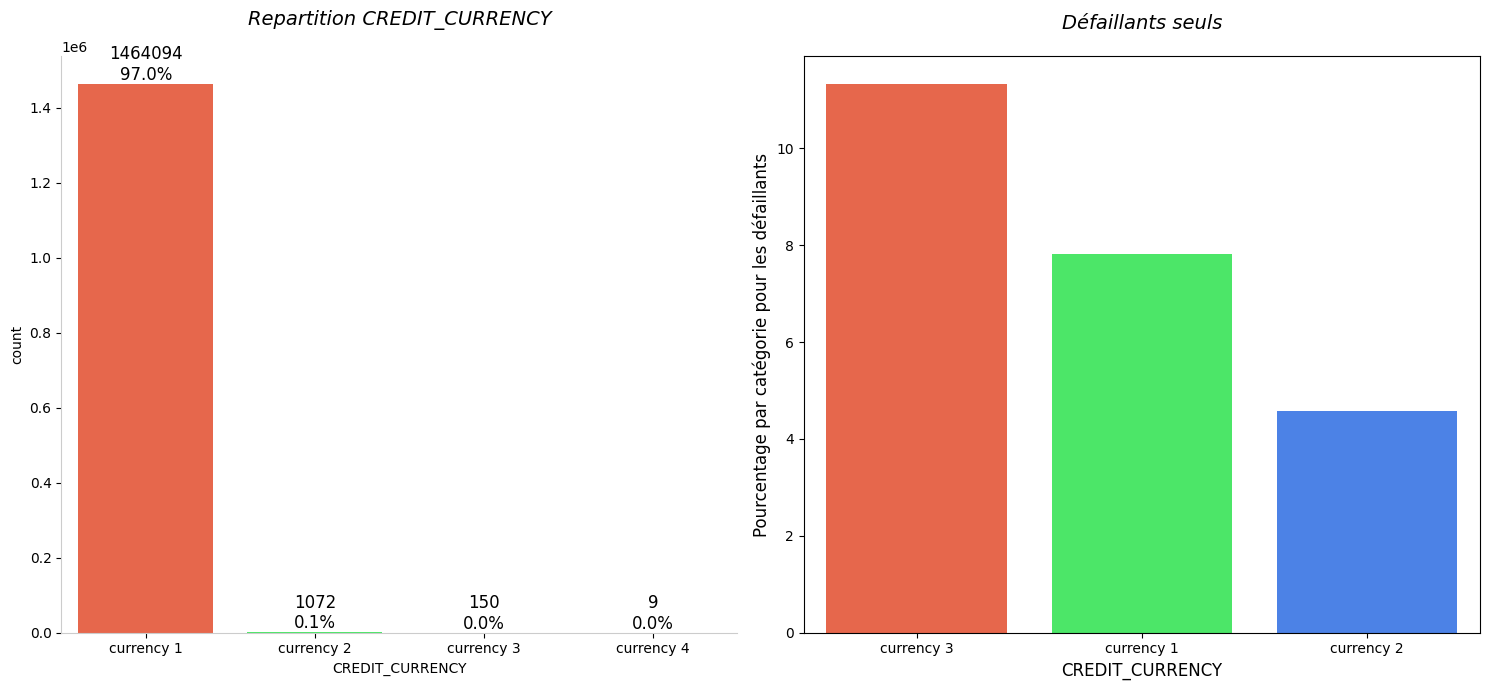

In [59]:
#custom_palette = ['#FF5733', '#33FF57', '#337AFF', '#FF33A8']

categ_var_bar(bureau_merged, 'CREDIT_CURRENCY', custom_palette, "Repartition CREDIT_CURRENCY\n", (15, 7), plot_defaulter=True)

**Bilan** :
***
À partir du graphique ci-dessus, nous pouvons tirer les conclusions suivantes :

- Dans le premier sous-graphe, nous voyons que la majorité des devises utilisées sont 'currency_1'.
- Si nous examinons le pourcentage de défaillants par catégorie, nous constatons qu'environ 11,5 % des personnes ayant des prêts avec la devise 'currency_3' ont été défaillants, ce qui représente le taux de défaillance le plus élevé. Cette catégorie est suivie par les devises currency_1 (8%) et currency_2 (4%). 

Les personnes utilisant les devises currency_2 et currency_3 ont plus de possibilités d'être défaillants.

<span style='background:mistyrose'>**Variable CREDIT_TYPE**</span>

Cette variable décrit le type de crédit au bureau de crédit (exemple :voiture, argent liquide...).

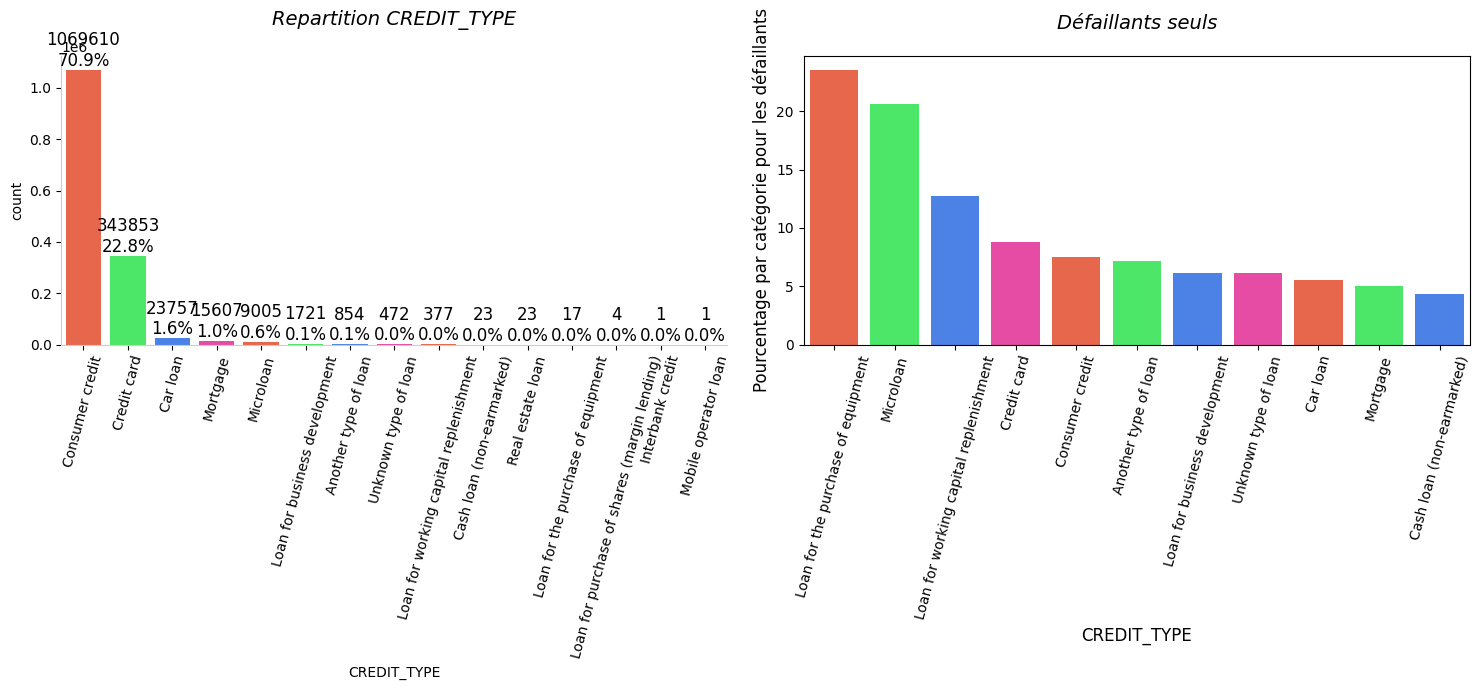

In [69]:
categ_var_bar(bureau_merged, 'CREDIT_TYPE', custom_palette, "Repartition CREDIT_TYPE\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
À partir du graphique ci-dessus, nous pouvons tirer les conclusions suivantes :

- Dans le premier sous-graphe, nous voyons que la majorité des types de prêts des prêts à la consommation ou des cartes de crédit.
- Les défaillants ont recours à d'autres types de crédits : 30% pour l'achat de matériel, 20% pour des micro-crédits et 12,5% pour la reconstitution du fonds de roulement. 

Peut-on en déduire que les défaillants sont plus des auto-entreprenants qui remplacent du matériel et ont besoin de trésorerie pour payer les fournisseurs?

<span style='background:violet'>**Analyse des variables quantitatives**</span>

In [6]:
# Liste des variables quantitatives
cols_num_bureau = \
    bureau.select_dtypes(include=[np.number]).columns.to_list()
cols_num_bureau

['SK_ID_CURR',
 'SK_ID_BUREAU',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'DAYS_CREDIT_UPDATE',
 'AMT_ANNUITY']

<span style='background:mistyrose'>**Variable DAYS_CREDIT**</span>

- Cette variable décrit le nombre de jours avant la demande actuelle, lorsque le demaneur a fait une demande de crédit au bureau de crédit.
- Pour faciliter l'interprétation, nous allons convertir ces jours en années.

-------------------------------------------------------------------------------
Pecentiles de la variable YEARS_CREDIT
Pecentile 0 = 0.0
Pecentile 25 = 1.2876712328767124
Pecentile 50 = 2.6986301369863015
Pecentile 75 = 4.578082191780822
Pecentile 90 = 6.706849315068493
Pecentile 92 = 6.945205479452055
Pecentile 94 = 7.183561643835616
Pecentile 96 = 7.4301369863013695
Pecentile 98 = 7.712328767123288
Pecentile 100 = 8.005479452054795
-------------------------------------------------------------------------------


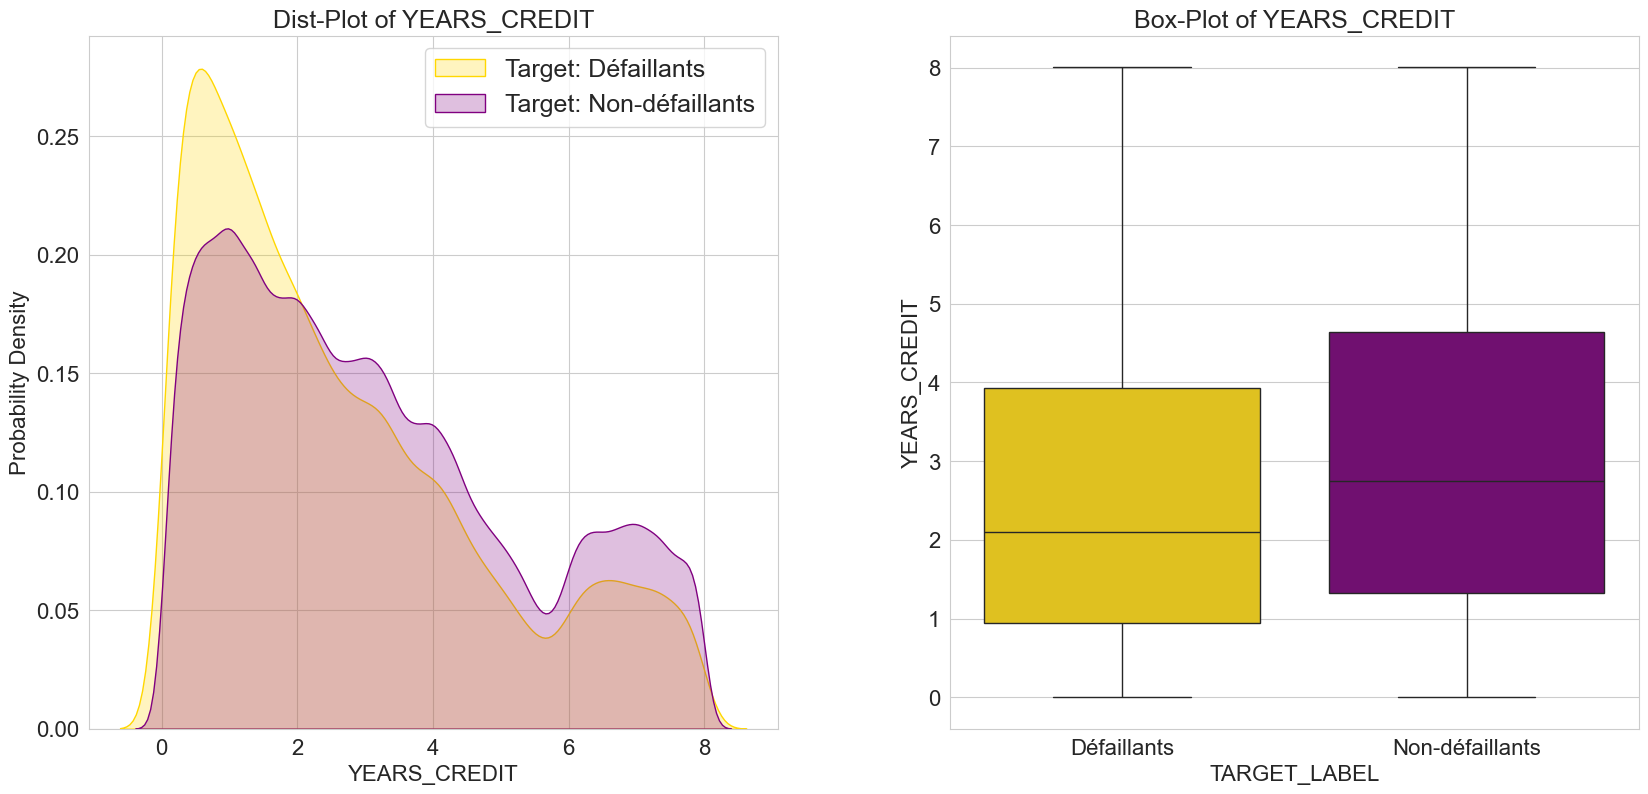

In [7]:
# Transformer en années à partir du nombre de jours
bureau_merged['YEARS_CREDIT'] = \
    bureau_merged['DAYS_CREDIT'] * -1 / 365

# Affiche les quantiles
fonctions_data.print_percentiles(bureau_merged, 'YEARS_CREDIT')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variables(bureau_merged, 'YEARS_CREDIT', plots=['distplot', 'box'])
# Suppression de la variable nouvellement ajoutée
#_ = application_train.pop('DAYS_CREDIT')

**Bilan** :
***
A partir des graphiques ci-dessus, nous voyons que :

- D'après le PDF, nous constatons que les défaillants ont tendance à avoir des pics plus élevés que les non-défaillants lorsque le nombre d'années est inférieur. Cela implique que les demandeurs qui ont fait une demande de prêt au Bureau de crédit récemment ont montré une plus grande tendance à la défaillance que ceux qui ont fait une demande il y a longtemps. Le PDF des défaillants est également un peu plus à gauche que celui des non-défaillants.
- Sur le boxplot, nous voyons que les défaillants ont généralement moins d'années de crédit que les non-défaillants.

<span style='background:mistyrose'>**Variable DAYS_CREDIT_ENDDATE**</span>

Cette variable indique la durée restante du crédit du Bureau de crédit au moment de la demande de prêt en crédit immobilier.

-------------------------------------------------------------------------------
Pecentiles de la variable DAYS_CREDIT_ENDDATE
Pecentile 0 = -42060.0
Pecentile 25 = -1144.0
Pecentile 50 = -334.0
Pecentile 75 = 473.0
Pecentile 90 = 1332.0
Pecentile 92 = 1503.0
Pecentile 94 = 1693.0
Pecentile 96 = 6258.0
Pecentile 98 = 27473.0
Pecentile 100 = 31199.0
-------------------------------------------------------------------------------


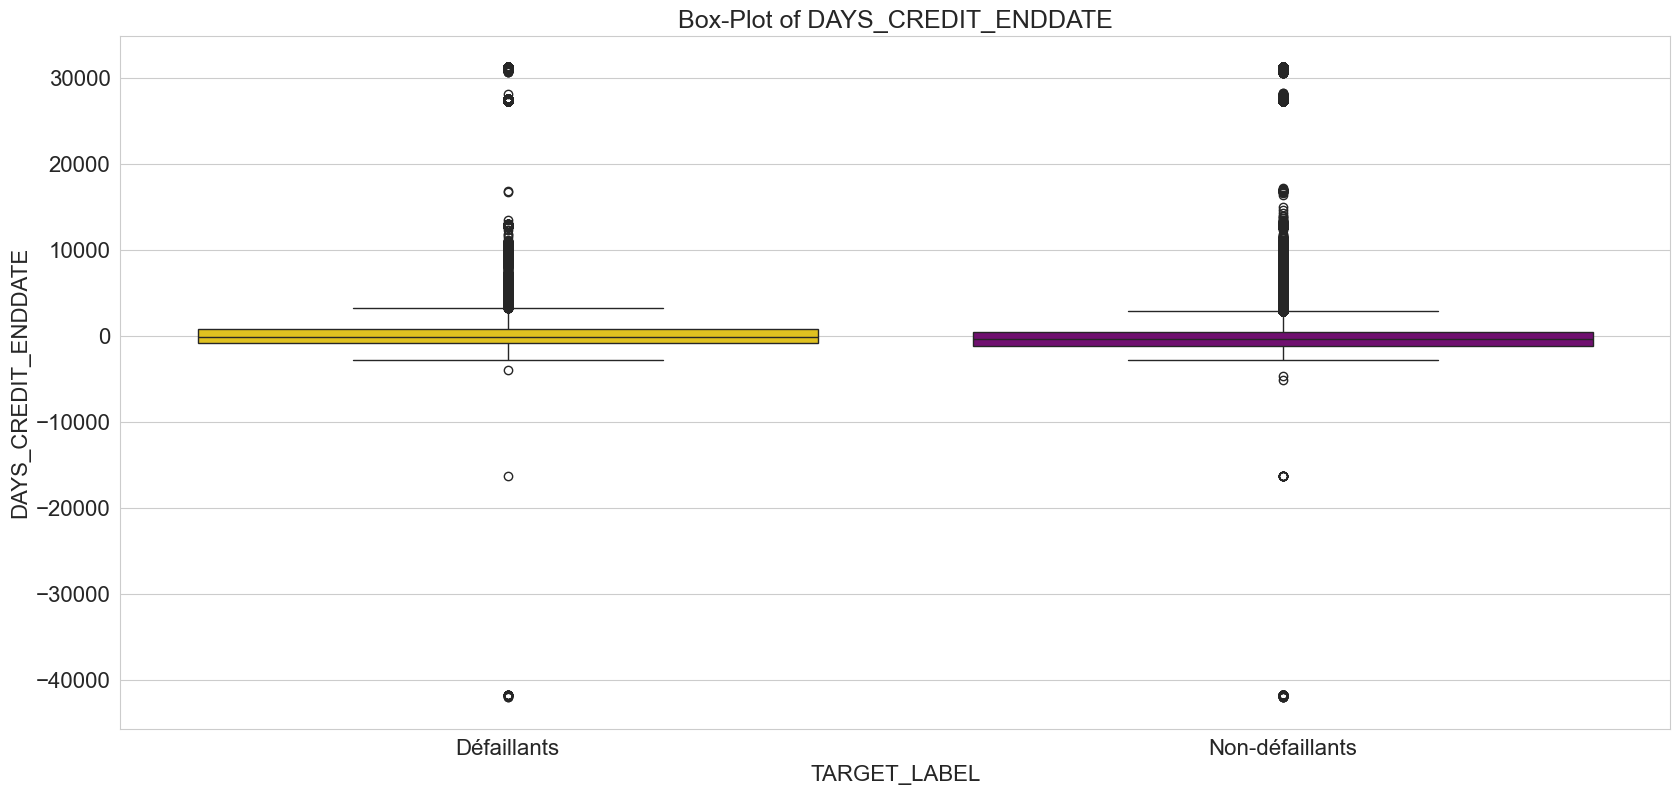

In [9]:
# Affiche les quantiles
fonctions_data.print_percentiles(bureau_merged, 'DAYS_CREDIT_ENDDATE')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variables(bureau_merged, 'DAYS_CREDIT_ENDDATE', plots=['box'])

**Bilan** :
***
- À partir des valeurs de quantile ci-dessus, et en regardant le boxplot, nous constatons qu'il semble y avoir une valeur erronée pour DAYS_CREDIT_ENDDATE, où la valeur du 0e quantile remonte jusqu'à 42060 jours ou 115 ans. Cela n'a pas beaucoup de sens car cela implique que le précédent prêt du demandeur remonte à 115 ans. 
- Il pourrait également s'agir d'un prêt hérité, mais nous ne pouvons pas nous prononcer à ce sujet.

Nous essaierons d'éliminer ces valeurs lors de l'étape de prétraitement des données.

<span style='background:mistyrose'>**Variable  DAYS_ENDDATE_FACT**</span>

- Cette variable indique le nombre de jours depuis lesquels le crédit du Bureau de Credit a été clôturé au moment de la demande de prêt du crédit immobilier. 
- Ces valeurs ne concernent que les crédits fermés.

-------------------------------------------------------------------------------
Pecentiles de la variable DAYS_ENDDATE_FACT
Pecentile 0 = -42023.0
Pecentile 25 = -1503.0
Pecentile 50 = -900.0
Pecentile 75 = -427.0
Pecentile 90 = -177.0
Pecentile 92 = -145.0
Pecentile 94 = -111.0
Pecentile 96 = -78.0
Pecentile 98 = -43.0
Pecentile 100 = 0.0
-------------------------------------------------------------------------------


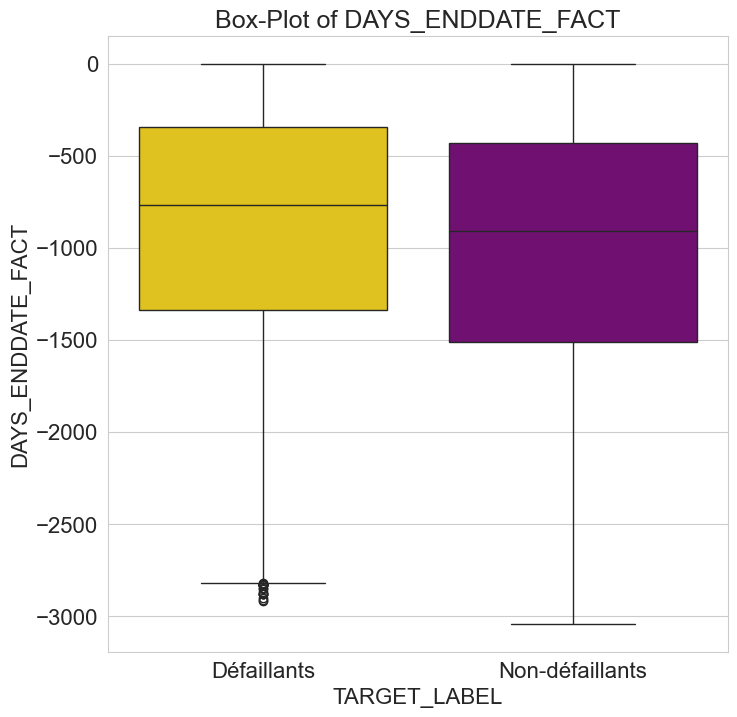

In [11]:
# Affiche les quantiles
fonctions_data.print_percentiles(bureau_merged, 'DAYS_ENDDATE_FACT')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variables(bureau_merged, 'DAYS_ENDDATE_FACT', plots=['box'], figsize=(8,8), scale_limits=[-40000, 0])

**Bilan** :
***
- Sur le boxplot, nous voyons que les défaillants ont tendance à avoir un nombre de jours inférieur depuis que leur crédit au Bureau du Crédit a pris fin. 
- Les non-défaillants ont généralement leur crédit précédent terminé plus longtemps avant que les défaillants.

<span style='background:mistyrose'>**Variable DAYS_CREDIT_UPDATE**</span>

Cette variable indique le nombre de jours depuis lesquels l'information du Bureau de crédit est parvenue au moment de la demande de prêt dans le cadre du crédit immobilier.

-------------------------------------------------------------------------------
Pecentiles de la variable DAYS_CREDIT_UPDATE
Pecentile 0 = -41947.0
Pecentile 25 = -904.0
Pecentile 50 = -406.0
Pecentile 75 = -33.0
Pecentile 90 = -13.0
Pecentile 92 = -11.0
Pecentile 94 = -9.0
Pecentile 96 = -7.0
Pecentile 98 = -5.0
Pecentile 100 = 372.0
-------------------------------------------------------------------------------


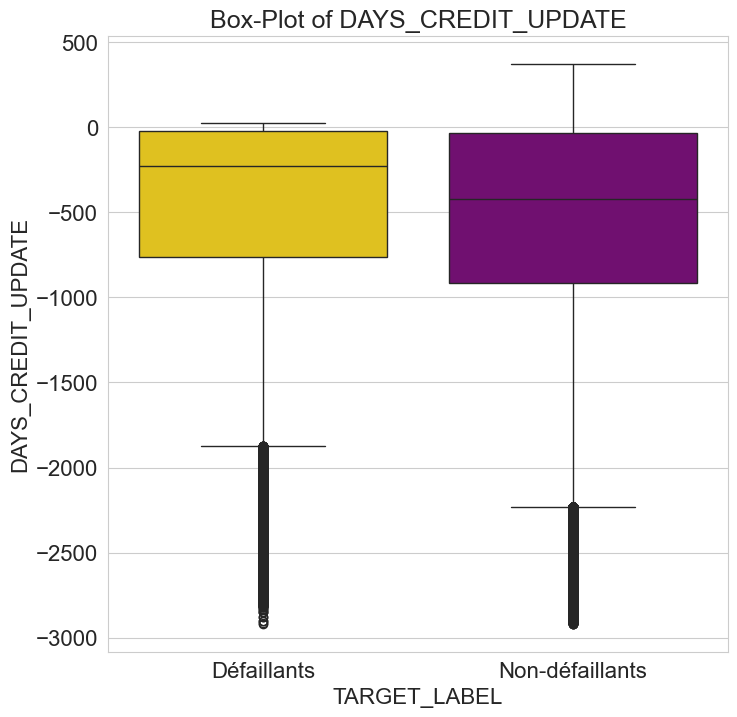

In [14]:
# Affiche les quantiles
fonctions_data.print_percentiles(bureau_merged, 'DAYS_CREDIT_UPDATE')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variables(bureau_merged, 'DAYS_CREDIT_UPDATE', plots=['box'], figsize=(8, 8),
                                               scale_limits=[-40000, 400])

**Bilan** :
***
- La tendance des valeurs erronées est à nouveau très similaire à celle de la variable des autres jours, où la valeur du 0e quantile semble être erronée. 
- De plus, étant donné que seule la valeur du 0e quantile est si étrange, et que le reste semble être correct, cette valeur est donc définitivement erronée. Nous allons également supprimer cette valeur.
- Sur le boxplot, on constate que les défaillants ont tendance à avoir moins de jours depuis la fin de leur crédit auprès du bureau de crédit.
- Leurs valeurs médianes, au 75e centile, sont toutes inférieures à celles des non défaillants.

<span style='background:mistyrose'>**Variable CREDIT_DAY_OVERDUE**</span>

Nombre de jours de retard sur le crédit du Bureau de crédit au moment de la demande de prêt 

-------------------------------------------------------------------------------
Pecentiles de la variable CREDIT_DAY_OVERDUE
Pecentile 0 = 0.0
Pecentile 25 = 0.0
Pecentile 50 = 0.0
Pecentile 75 = 0.0
Pecentile 90 = 0.0
Pecentile 92 = 0.0
Pecentile 94 = 0.0
Pecentile 96 = 0.0
Pecentile 98 = 0.0
Pecentile 100 = 2792.0
-------------------------------------------------------------------------------


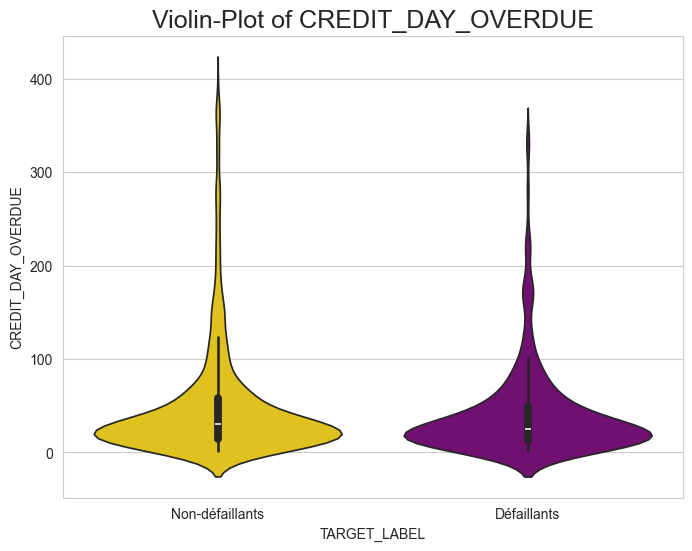

In [16]:
# Affiche les quantiles
fonctions_data.print_percentiles(bureau_merged, 'CREDIT_DAY_OVERDUE')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variables(bureau_merged, 'CREDIT_DAY_OVERDUE', plots=['violin'],
                                               figsize=(8, 6), scale_limits=[0, 400])

**Bilan**:
***
-  Même niveau de valeur pour les défaillants que pour les non-défaillants.

Cette variable ne sera guère utile pour départager les demandeurs défaillants ou non-défaillants.

<span style='background:mistyrose'>**Variable AMT_CREDIT_MAX_OVERDUE**</span>

Montant maximal des impayés sur le crédit du Bureau de crédit jusqu'à présent.

-------------------------------------------------------------------------------
Pecentiles de la variable AMT_CREDIT_MAX_OVERDUE
Pecentile 0 = 0.0
Pecentile 25 = 0.0
Pecentile 50 = 0.0
Pecentile 75 = 0.0
Pecentile 90 = 7632.517500000008
Pecentile 92 = 9690.705
Pecentile 94 = 12375.0
Pecentile 96 = 16775.827199999963
Pecentile 98 = 26910.0
Pecentile 100 = 115987185.0
-------------------------------------------------------------------------------


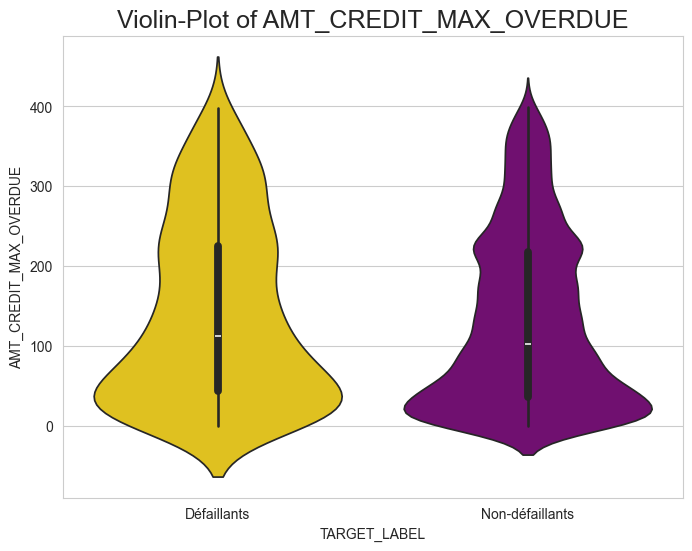

In [19]:
# Affiche les quantiles
fonctions_data.print_percentiles(bureau_merged, 'AMT_CREDIT_MAX_OVERDUE')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variables(bureau_merged, 'AMT_CREDIT_MAX_OVERDUE', plots=['violin'],
                                               figsize=(8, 6), scale_limits=[0, 400])

**Bilan**:
***
-  Même niveau de valeur pour les défaillants que pour les non-défaillants.

Cette variable ne sera guère utile pour départager les demandeurs défaillants ou non-défaillants.

<span style='background:mistyrose'>**Variable CNT_CREDIT_PROLONG**</span>

Nombre de fois ou le crédit à été prolongé ?

-------------------------------------------------------------------------------
Pecentiles de la variable CNT_CREDIT_PROLONG
Pecentile 0 = 0.0
Pecentile 25 = 0.0
Pecentile 50 = 0.0
Pecentile 75 = 0.0
Pecentile 90 = 0.0
Pecentile 92 = 0.0
Pecentile 94 = 0.0
Pecentile 96 = 0.0
Pecentile 98 = 0.0
Pecentile 100 = 9.0
-------------------------------------------------------------------------------


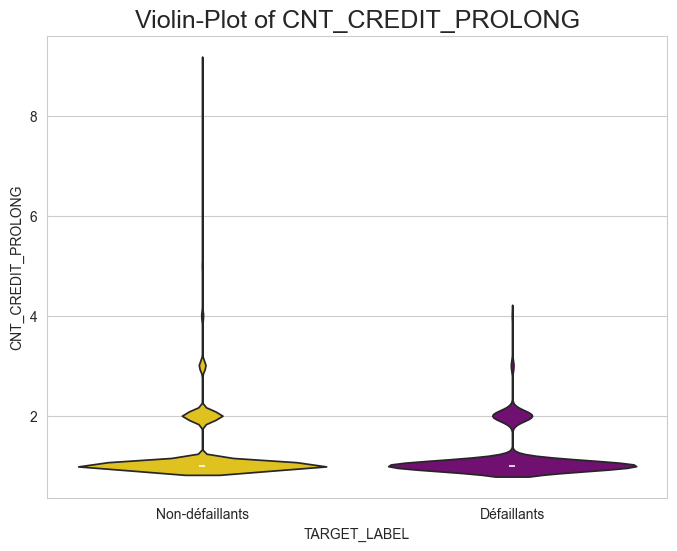

In [21]:
# Affiche les quantiles
fonctions_data.print_percentiles(bureau_merged, 'CNT_CREDIT_PROLONG')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variables(bureau_merged, 'CNT_CREDIT_PROLONG', plots=['violin'],
                                               figsize=(8, 6), scale_limits=[0, 400])

**Bilan**:
***
-  Même niveau de valeur pour les défaillants que pour les non-défaillants.

Cette variable ne sera guère utile pour départager les demandeurs défaillants ou non-défaillants.

<span style='background:mistyrose'>**Variable AMT_CREDIT_SUM**</span>

Montant actuel du crédit du Bureau de crédit.

-------------------------------------------------------------------------------
Pecentiles de la variable AMT_CREDIT_SUM
Pecentile 0 = 0.0
Pecentile 25 = 51165.0
Pecentile 50 = 124698.1275
Pecentile 75 = 308250.0
Pecentile 90 = 765000.0
Pecentile 92 = 900004.5
Pecentile 94 = 1179796.589999999
Pecentile 96 = 1537417.4399999992
Pecentile 98 = 2355906.60000002
Pecentile 100 = 396000000.0
-------------------------------------------------------------------------------


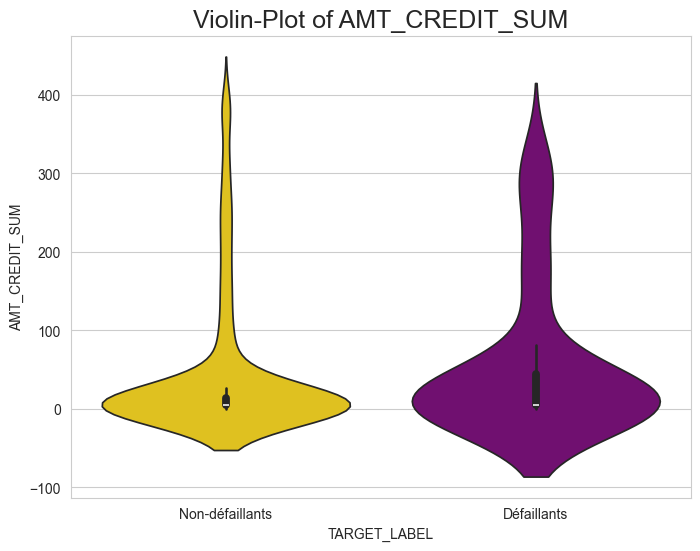

In [22]:
# Affiche les quantiles
fonctions_data.print_percentiles(bureau_merged, 'AMT_CREDIT_SUM')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variables(bureau_merged, 'AMT_CREDIT_SUM', plots=['violin'],
                                               figsize=(8, 6), scale_limits=[0, 400])

**Bilan**:
***
-  Même niveau de valeur pour les défaillants que pour les non-défaillants.

Cette variable ne sera guère utile pour départager les demandeurs défaillants ou non-défaillants.

<span style='background:mistyrose'>**Variable AMT_CREDIT_SUM_DEBT**</span>

Dette actuelle sur le crédit du Bureau de crédit.

-------------------------------------------------------------------------------
Pecentiles de la variable AMT_CREDIT_SUM_DEBT
Pecentile 0 = -4705600.32
Pecentile 25 = 0.0
Pecentile 50 = 0.0
Pecentile 75 = 39654.0
Pecentile 90 = 291231.0
Pecentile 92 = 384966.0
Pecentile 94 = 520385.39999999874
Pecentile 96 = 766845.9000000008
Pecentile 98 = 1350000.0
Pecentile 100 = 170100000.0
-------------------------------------------------------------------------------


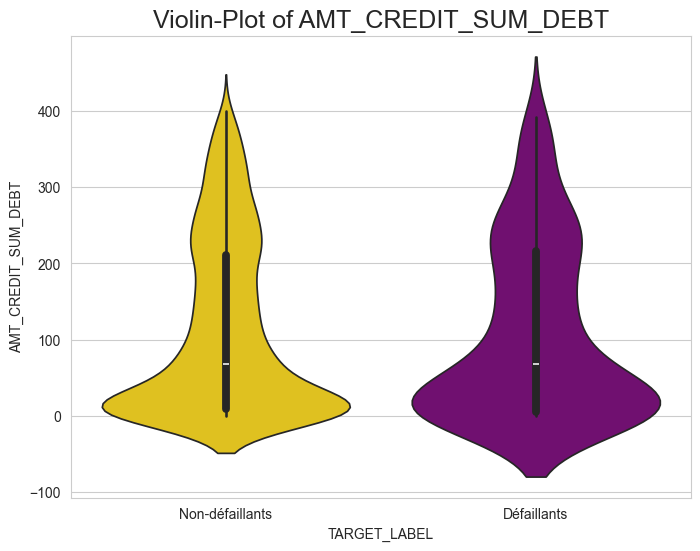

In [23]:
# Affiche les quantiles
fonctions_data.print_percentiles(bureau_merged, 'AMT_CREDIT_SUM_DEBT')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variables(bureau_merged, 'AMT_CREDIT_SUM_DEBT', plots=['violin'],
                                               figsize=(8, 6), scale_limits=[0, 400])

**Bilan**:
***
-  Même niveau de valeur pour les défaillants que pour les non-défaillants.

Cette variable ne sera guère utile pour départager les demandeurs défaillants ou non-défaillants.

<span style='background:mistyrose'>**Variable AMT_CREDIT_SUM_LIMIT**</span>

Limite de crédit actuelle de la carte de crédit déclarée dans le Bureau de crédit.

-------------------------------------------------------------------------------
Pecentiles de la variable AMT_CREDIT_SUM_LIMIT
Pecentile 0 = -586406.115
Pecentile 25 = 0.0
Pecentile 50 = 0.0
Pecentile 75 = 0.0
Pecentile 90 = 0.0
Pecentile 92 = 0.0
Pecentile 94 = 687.6845999999374
Pecentile 96 = 19481.93639999998
Pecentile 98 = 111148.3871999985
Pecentile 100 = 4705600.32
-------------------------------------------------------------------------------


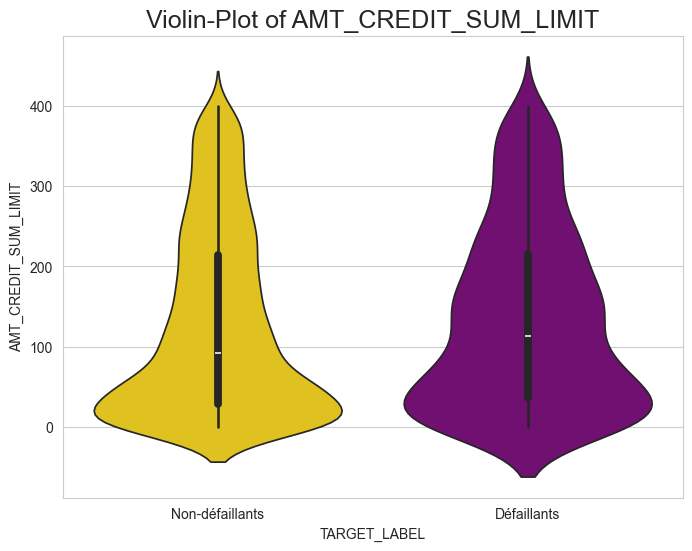

In [24]:
# Affiche les quantiles
fonctions_data.print_percentiles(bureau_merged, 'AMT_CREDIT_SUM_LIMIT')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variables(bureau_merged, 'AMT_CREDIT_SUM_LIMIT', plots=['violin'],
                                               figsize=(8, 6), scale_limits=[0, 400])

**Bilan**:
***
-  Même niveau de valeur pour les défaillants que pour les non-défaillants.

Cette variable ne sera guère utile pour départager les demandeurs défaillants ou non-défaillants.

<span style='background:mistyrose'>**Variable AMT_CREDIT_SUM_OVERDUE**</span>

Montant actuel en retard sur le crédit du Bureau de crédit

-------------------------------------------------------------------------------
Pecentiles de la variable AMT_CREDIT_SUM_OVERDUE
Pecentile 0 = 0.0
Pecentile 25 = 0.0
Pecentile 50 = 0.0
Pecentile 75 = 0.0
Pecentile 90 = 0.0
Pecentile 92 = 0.0
Pecentile 94 = 0.0
Pecentile 96 = 0.0
Pecentile 98 = 0.0
Pecentile 100 = 3756681.0
-------------------------------------------------------------------------------


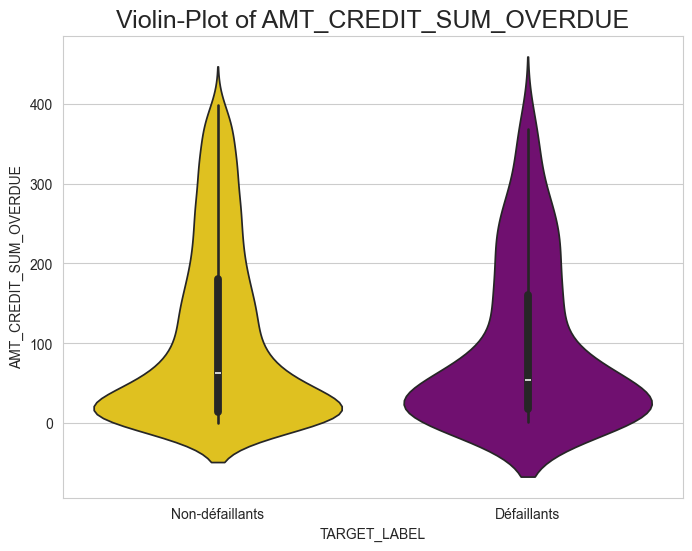

In [25]:
# Affiche les quantiles
fonctions_data.print_percentiles(bureau_merged, 'AMT_CREDIT_SUM_OVERDUE')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variables(bureau_merged, 'AMT_CREDIT_SUM_OVERDUE', plots=['violin'],
                                               figsize=(8, 6), scale_limits=[0, 400])

**Bilan**:
***
-  Même niveau de valeur pour les défaillants que pour les non-défaillants.

Cette variable ne sera guère utile pour départager les demandeurs défaillants ou non-défaillants.

<span style='background:mistyrose'>**Variable AMT_ANNUITY**</span>

-------------------------------------------------------------------------------
Pecentiles de la variable AMT_ANNUITY
Pecentile 0 = 0.0
Pecentile 25 = 0.0
Pecentile 50 = 67.5
Pecentile 75 = 13990.5
Pecentile 90 = 31922.887500000026
Pecentile 92 = 36824.985
Pecentile 94 = 43068.35699999972
Pecentile 96 = 52758.0
Pecentile 98 = 76500.0
Pecentile 100 = 59586682.5
-------------------------------------------------------------------------------


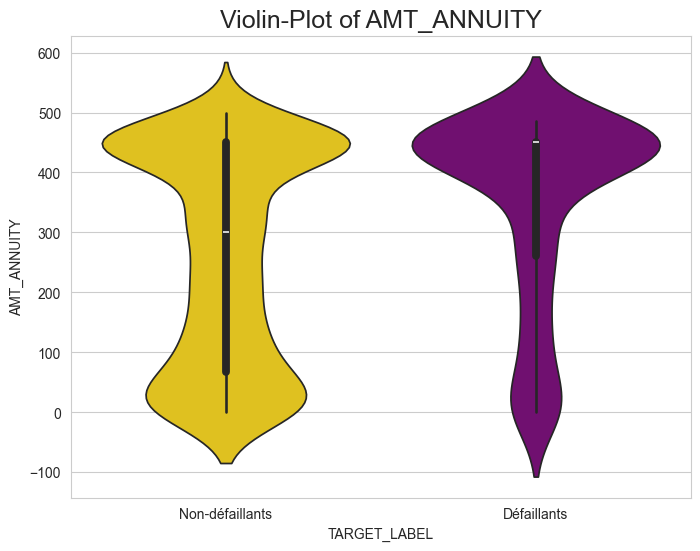

In [27]:
# Affiche les quantiles
fonctions_data.print_percentiles(bureau_merged, 'AMT_ANNUITY')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variables(bureau_merged, 'AMT_ANNUITY', plots=['violin'],
                                               figsize=(8, 6), scale_limits=[0, 500])

**Bilan**:
***
-  Même niveau de valeur pour les défaillants que pour les non-défaillants.

Cette variable ne sera guère utile pour départager les demandeurs défaillants ou non-défaillants.

#### <span style='background:Moccasin'>2.1.3. Analyse mutlivariée des colonnes</span>

<span style='background:mistyrose'>**Corrélation sur les variables catégorielles**</span>

**Matrice Phi_K**

Phi_K est une constante de corrélation pratique qui fonctionne de manière cohérente entre les variables catégorielles, ordinales et d'intervalle. Il est basé sur plusieurs raffinements du test d'hypothèse de Pearson sur l'indépendance de deux variables.

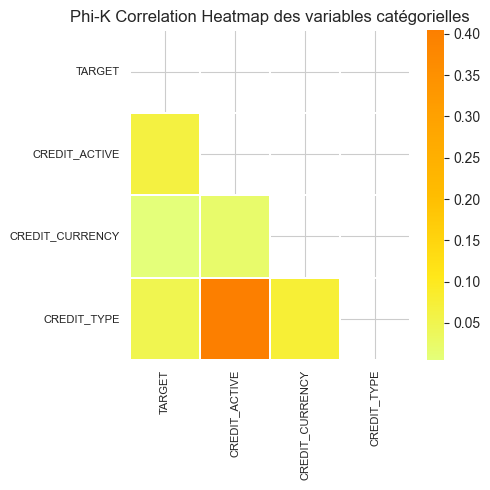

In [31]:
import phik
from phik import resources, report

cols_for_phik = ['TARGET', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
                 'CREDIT_TYPE']
fonctions_data.plot_phik_matrix(bureau_merged, cols_for_phik, figsize=(5, 5), fontsize=8, cmap='Wistia')

**Bilan** :
***
La carte thermique ci-dessus montre les valeurs de corrélation Phi-K entre les valeurs catégorielles.

- D'après le coefficient de corrélation Phi-K, nous voyons que la variable CREDIT_TYPE présente une certaine association avec la variable CREDIT_ACTIVE.
- Nous voyons que les variables catégorielles n'ont pas vraiment une association élevée avec la variable TARGET, en particulier la caractéristique CREDIT_CURRENCY.

<span style='background:mistyrose'>**Corrélation sur les variables numériques**</span>

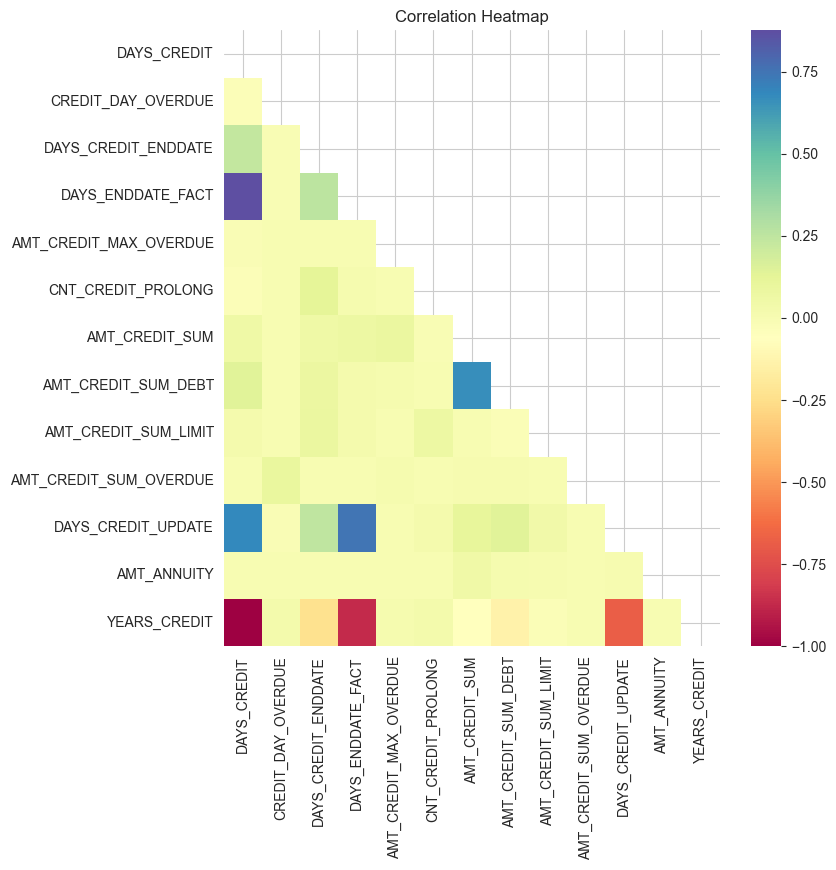

In [100]:
# Heatmap des variables numériques
categorical_columns = bureau_merged.select_dtypes(exclude=[np.number]).columns.to_list()

columns_to_drop = ['SK_ID_CURR', 'SK_ID_BUREAU'] + list(set(categorical_columns)
                                        - set(['TARGET']))

ext_data = bureau_merged.drop(columns_to_drop + ['TARGET'], axis=1)

plt.figure(figsize = (8, 8))
mask = np.triu(np.ones_like(ext_data.corr()))
    
# Heatmap of correlations
sns.heatmap(ext_data.corr(), mask = mask, cmap = plt.cm.Spectral)
plt.title('Correlation Heatmap');

**Bilan** :
***
- La carte thermique ci-dessus montre la corrélation entre chaque variables du dataframe bureau et le reste des variables.
- On peut observer que la plupart de la carte thermique a des couleurs claires, ce qui montre peu ou pas de corrélation.
- Cependant, nous pouvons voir quelques nuances foncées qui représentent une forte corrélation.
- La forte corrélation est particulièrement observée pour les variables :
    - DAYS_CREDIT et DAYS_CREDIT_UPDATE.
    - DAYS_ENDDATE_FACT et DAYS_CREDIT_UPDATE
    - AMT_CREDIT_SUM et AMT_CREDIT_SUM_DEBT
    - DAYS_ENDDATE_FACT et DAYS_CREDIT
- Nous pouvons également constater que les variables ne présentent pas de corrélation particulièrement bonne/élevée avec la variable cible en tant que telle, à l'exception de la variable DAYS_CREDIT. 

Cela implique qu'il n'y a pas de relation linéaire directe entre la cible et les caractéristiques.

### <span style='background:orange'>2.2 Fichier bureau_balance.csv</span>

#### <span style='background:Moccasin'>2.2.1. statistique des variables</span>

<span style='background:mistyrose'>**Compréhension des variables**</span>

In [60]:
df_var_bureau_bal = \
    homecredit_columns_description[homecredit_columns_description['Table']
                                   == 'bureau_balance.csv']
df_var_bureau_bal.style.hide_index()

In [61]:
print("-"*79)
print(f'Number of unique SK_ID_BUREAU in bureau_balance.csv are: {len(bureau_balance.SK_ID_BUREAU.unique())}')
print('-'*79)
print(f'Number of unique values for STATUS are: {len(bureau_balance.STATUS.unique())}')
print(f"Unique values of STATUS are:\n{bureau_balance.STATUS.unique()}")
print('-'*79)
print(f"Max number of months for Months Balance: {np.abs(bureau_balance.MONTHS_BALANCE.min())}")
print('-'*79)

-------------------------------------------------------------------------------
Number of unique SK_ID_BUREAU in bureau_balance.csv are: 817395
-------------------------------------------------------------------------------
Number of unique values for STATUS are: 8
Unique values of STATUS are:
['C' '0' 'X' '1' '2' '3' '5' '4']
-------------------------------------------------------------------------------
Max number of months for Months Balance: 96
-------------------------------------------------------------------------------


<span style='background:mistyrose'>**Statistiques**</span>

-------------------------------------------------------------
Type de variable pour chacune des variables



SK_ID_BUREAU       int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

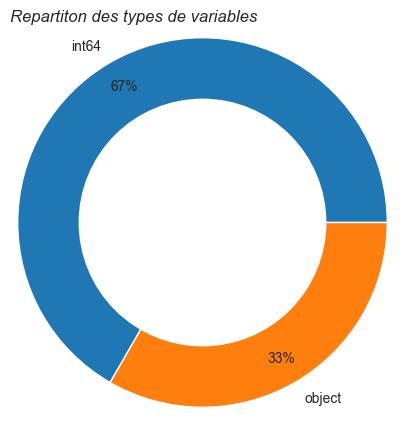

In [62]:
# Types des variables
fonctions_data.affichage_types_var(bureau_balance, True, True, True)

In [63]:
# Résumé des variables qualitatives
fonctions_data.detail_type_var(bureau_balance, type_var='cat')

STATUS
type      object
nb_nan       0.0
%_nan        0.0
count   27299925
unique         8
top            C
freq    13646993

In [64]:
# Résumé des variables qualitatives
fonctions_data.detail_type_var(bureau_balance, type_var='num')

SK_ID_BUREAU MONTHS_BALANCE
type             int64          int64
nb_nan             0.0            0.0
%_nan              0.0            0.0
count       27299925.0     27299925.0
mean    6036297.332974     -30.741687
std      492348.856904      23.864509
min          5001709.0          -96.0
25%          5730933.0          -46.0
50%          6070821.0          -25.0
75%          6431951.0          -11.0
max          6842888.0            0.0

Valeurs manquantes :0 NaN pour 81899775 données (0.0 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



Empty DataFrame
Columns: [Nombres de valeurs manquantes, % de valeurs manquantes]
Index: []

-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


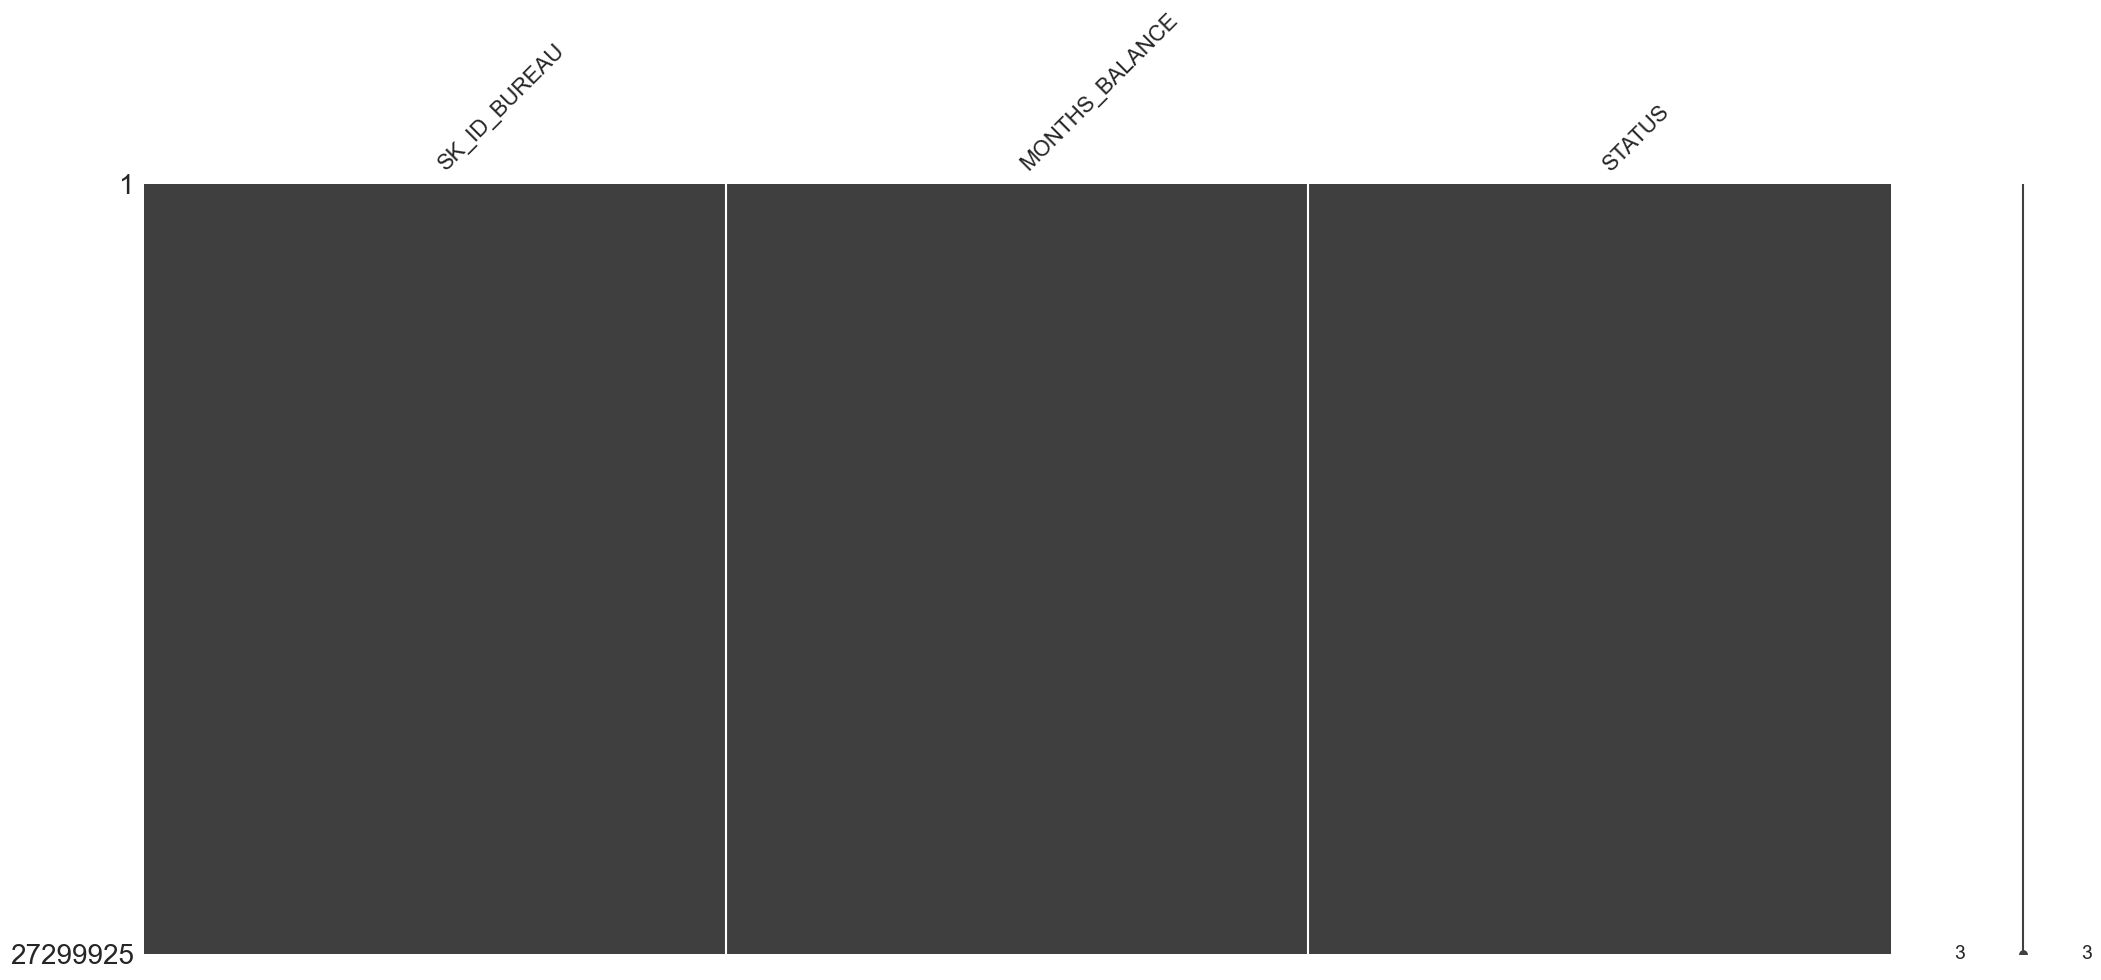

In [65]:
# Visualisation des données manquantes dans le dataset
fonctions_data.get_val_manq(bureau_balance, True, True)

#### <span style='background:Moccasin'>2.2.2. statistique des variables</span>

<span style='background:violet'>**Analyse des données catégorielles**</span>

In [66]:
# Liste des variables qualitatives
cols_cat_bureau_bal = \
    bureau_balance.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_bureau_bal

['STATUS']

<span style='background:mistyrose'>**Variable STATUS**</span>

Statut du prêt du Bureau du crédit durant le mois (actif ou fermé ou DPD0-30... :
- C signifie fermé,
- X signifie état inconnu,
- 0 signifie pas de DPD,
- 1 signifie DPD maximal durant le mois entre 1-30,
- 2 signifie DPD 31-60...,
- 5 signifie DPD 120+ ou vendu ou amorti.

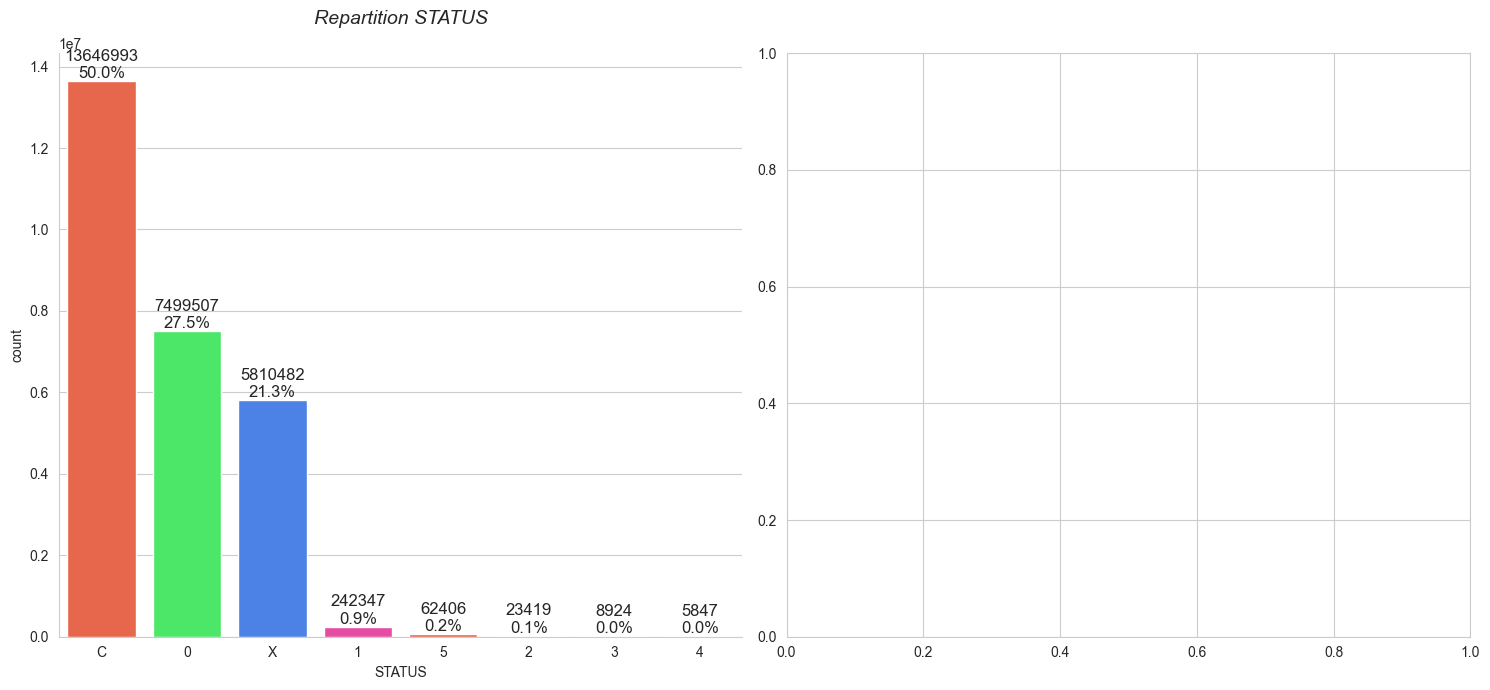

In [76]:
categ_var_bar(bureau_balance, 'STATUS', custom_palette, "Repartition STATUS\n", (15, 7), plot_defaulter=False)

**Bilan** :
***
- Les états des prêts les plus rencontrés sont :
    - C pour prêt fermé (50%),
    - 0 pour 'pas de DPD' (27,5%),
    - X signifie état inconnu (21%).
    - le reste se partage entre les états 1 à 5.
- Plus de 21% des prêts sont dans l'état inconnu.

<span style='background:violet'>**Analyse des variables quantitatives**</span>

In [77]:
# Liste des variables quantitatives
cols_num = \
    bureau_balance.select_dtypes(include=[np.number]).columns.to_list()
cols_num

['SK_ID_BUREAU', 'MONTHS_BALANCE']

<span style='background:mistyrose'>**Variable MONTHS_BALANCE**</span>

- Mois du solde par rapport à la date de la demande :
    - -1 signifie que l'information correspond à l'instantané mensuel le plus récent 
    - 0 signifie que l'information correspond à la date de la demande 
- Il s'agit souvent de la même valeur que -1 car de nombreuses banques ne mettent pas régulièrement à jour les informations fournies au Bureau de crédit.

-------------------------------------------------------------------------------
Pecentiles de la variable MONTHS_BALANCE
Pecentile 0 = -96.0
Pecentile 25 = -46.0
Pecentile 50 = -25.0
Pecentile 75 = -11.0
Pecentile 90 = -4.0
Pecentile 92 = -3.0
Pecentile 94 = -2.0
Pecentile 96 = -1.0
Pecentile 98 = 0.0
Pecentile 100 = 0.0
-------------------------------------------------------------------------------


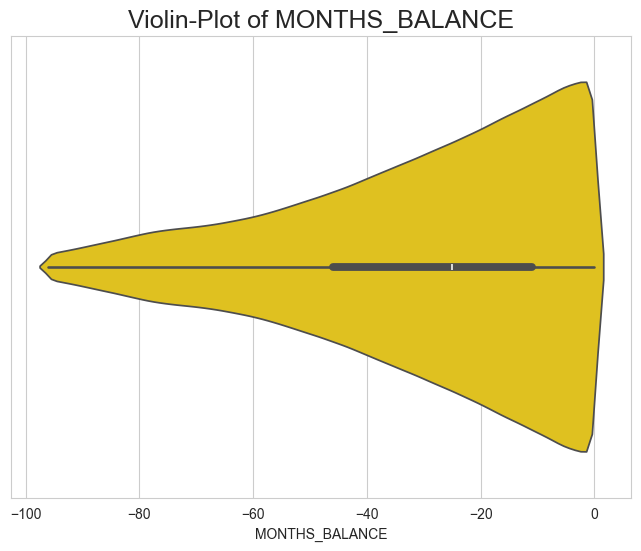

In [91]:
# Affiche les quantiles
fonctions_data.print_percentiles(bureau_balance, 'MONTHS_BALANCE')
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variable(bureau_balance, 'MONTHS_BALANCE', plots=['violin'],
                                               figsize=(8, 6))

#plot_violin(bureau_balance, 'MONTHS_BALANCE', log_scale=False, palette=['purple'])

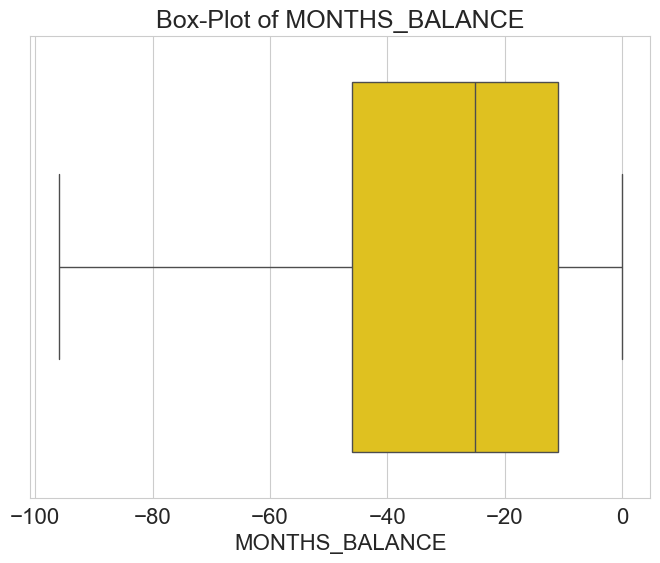

In [92]:
# Affiche boxplot, distplot pour l'âge
fonctions_data.plot_continuous_variable(bureau_balance, 'MONTHS_BALANCE', plots=['box'],
                                               figsize=(8, 6))

### <span style='background:orange'>2.3 Fichier  credit_card_balance.csv</span>

#### <span style='background:Moccasin'>2.3.1. statistique des variables</span>

<span style='background:mistyrose'>**Compréhension des variables**</span>

In [93]:
df_var_ccbal = \
    homecredit_columns_description[homecredit_columns_description['Table']
                                   == 'credit_card_balance.csv']
df_var_ccbal.style.hide_index()

<span style='background:mistyrose'>**Statistiques**</span>

-------------------------------------------------------------
Type de variable pour chacune des variables



SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

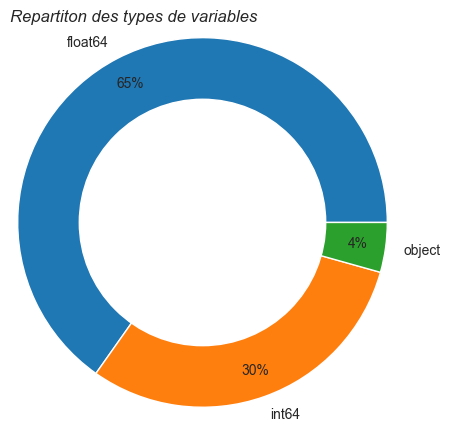

In [94]:
# Types des variables
fonctions_data.affichage_types_var(credit_card_balance, True, True, True)

In [95]:
# Résumé des variables qualitatives
fonctions_data.detail_type_var(credit_card_balance, type_var='cat')

NAME_CONTRACT_STATUS
type                 object
nb_nan                  0.0
%_nan                   0.0
count               3840312
unique                    7
top                  Active
freq                3698436

In [96]:
# Résumé des variables numériques
fonctions_data.detail_type_var(credit_card_balance, type_var='num')

SK_ID_PREV     SK_ID_CURR MONTHS_BALANCE    AMT_BALANCE  \
type            int64          int64          int64        float64   
nb_nan            0.0            0.0            0.0            0.0   
%_nan             0.0            0.0            0.0            0.0   
count       3840312.0      3840312.0      3840312.0      3840312.0   
mean     1904503.5899  278324.207289     -34.521921   58300.155262   
std     536469.470563  102704.475133      26.667751  106307.031024   
min         1000018.0       100006.0          -96.0    -420250.185   
25%         1434385.0       189517.0          -55.0            0.0   
50%         1897122.0       278396.0          -28.0            0.0   
75%        2369327.75       367580.0          -11.0    89046.68625   
max         2843496.0       456250.0           -1.0    1505902.185   

       AMT_CREDIT_LIMIT_ACTUAL AMT_DRAWINGS_ATM_CURRENT AMT_DRAWINGS_CURRENT  \
type                     int64                  float64              float64   
nb_nan                     0.0                 749816.0                  0.0   
%_nan                      0.0                19.524872                  0.0   
count                3840312.0                3090496.0            3840312.0   
mean               153807.9574              5961.324822          7433.388179   
std              165145.699525             28225.688578         33846.077333   
min                        0.0                 -6827.31             -6211.62   
25%                    45000.0                      0.0                  0.0   
50%                   112500.0                      0.0                  0.0   
75%                   180000.0                      0.0                  0.0   
max                  1350000.0                2115000.0          2287098.315   

       AMT_DRAWINGS_OTHER_CURRENT AMT_DRAWINGS_POS_CURRENT  \
type                      float64                  float64   
nb_nan                   749816.0                 749816.0   
%_nan                   19.524872                19.524872   
count                   3090496.0                3090496.0   
mean                   288.169582              2968.804848   
std                   8201.989345             20796.887047   
min                           0.0                      0.0   
25%                           0.0                      0.0   
50%                           0.0                      0.0   
75%                           0.0                      0.0   
max                     1529847.0               2239274.16   

       AMT_INST_MIN_REGULARITY  ... AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
type                   float64  ...                  float64        float64   
nb_nan                305236.0  ...                      0.0            0.0   
%_nan                 7.948208  ...                      0.0            0.0   
count                3535076.0  ...                3840312.0      3840312.0   
mean               3540.204129  ...             55965.876905   58088.811177   
std                5600.154122  ...            102533.616846  105965.369908   
min                        0.0  ...               -423305.82    -420250.185   
25%                        0.0  ...                      0.0            0.0   
50%                        0.0  ...                      0.0            0.0   
75%                 6633.91125  ...                 85359.24    88899.49125   
max                 202882.005  ...              1472316.795    1493338.185   

       AMT_TOTAL_RECEIVABLE CNT_DRAWINGS_ATM_CURRENT CNT_DRAWINGS_CURRENT  \
type                float64                  float64                int64   
nb_nan                  0.0                 749816.0                  0.0   
%_nan                   0.0                19.524872                  0.0   
count             3840312.0                3090496.0            3840312.0   
mean           58098.285489                 0.309449             0.703144   
std           105971.801104                 1.100401 

Valeurs manquantes :5877356 NaN pour 88327176 données (6.65 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



Nombres de valeurs manquantes  \
AMT_PAYMENT_CURRENT                                767988   
AMT_DRAWINGS_ATM_CURRENT                           749816   
AMT_DRAWINGS_OTHER_CURRENT                         749816   
AMT_DRAWINGS_POS_CURRENT                           749816   
CNT_DRAWINGS_ATM_CURRENT                           749816   
CNT_DRAWINGS_OTHER_CURRENT                         749816   
CNT_DRAWINGS_POS_CURRENT                           749816   
AMT_INST_MIN_REGULARITY                            305236   
CNT_INSTALMENT_MATURE_CUM                          305236   

                            % de valeurs manquantes  
AMT_PAYMENT_CURRENT                           20.00  
AMT_DRAWINGS_ATM_CURRENT                      19.52  
AMT_DRAWINGS_OTHER_CURRENT                    19.52  
AMT_DRAWINGS_POS_CURRENT                      19.52  
CNT_DRAWINGS_ATM_CURRENT                      19.52  
CNT_DRAWINGS_OTHER_CURRENT                    19.52  
CNT_DRAWINGS_POS_CURRENT                      19.52  
AMT_INST_MIN_REGULARITY                        7.95  
CNT_INSTALMENT_MATURE_CUM                      7.95

-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


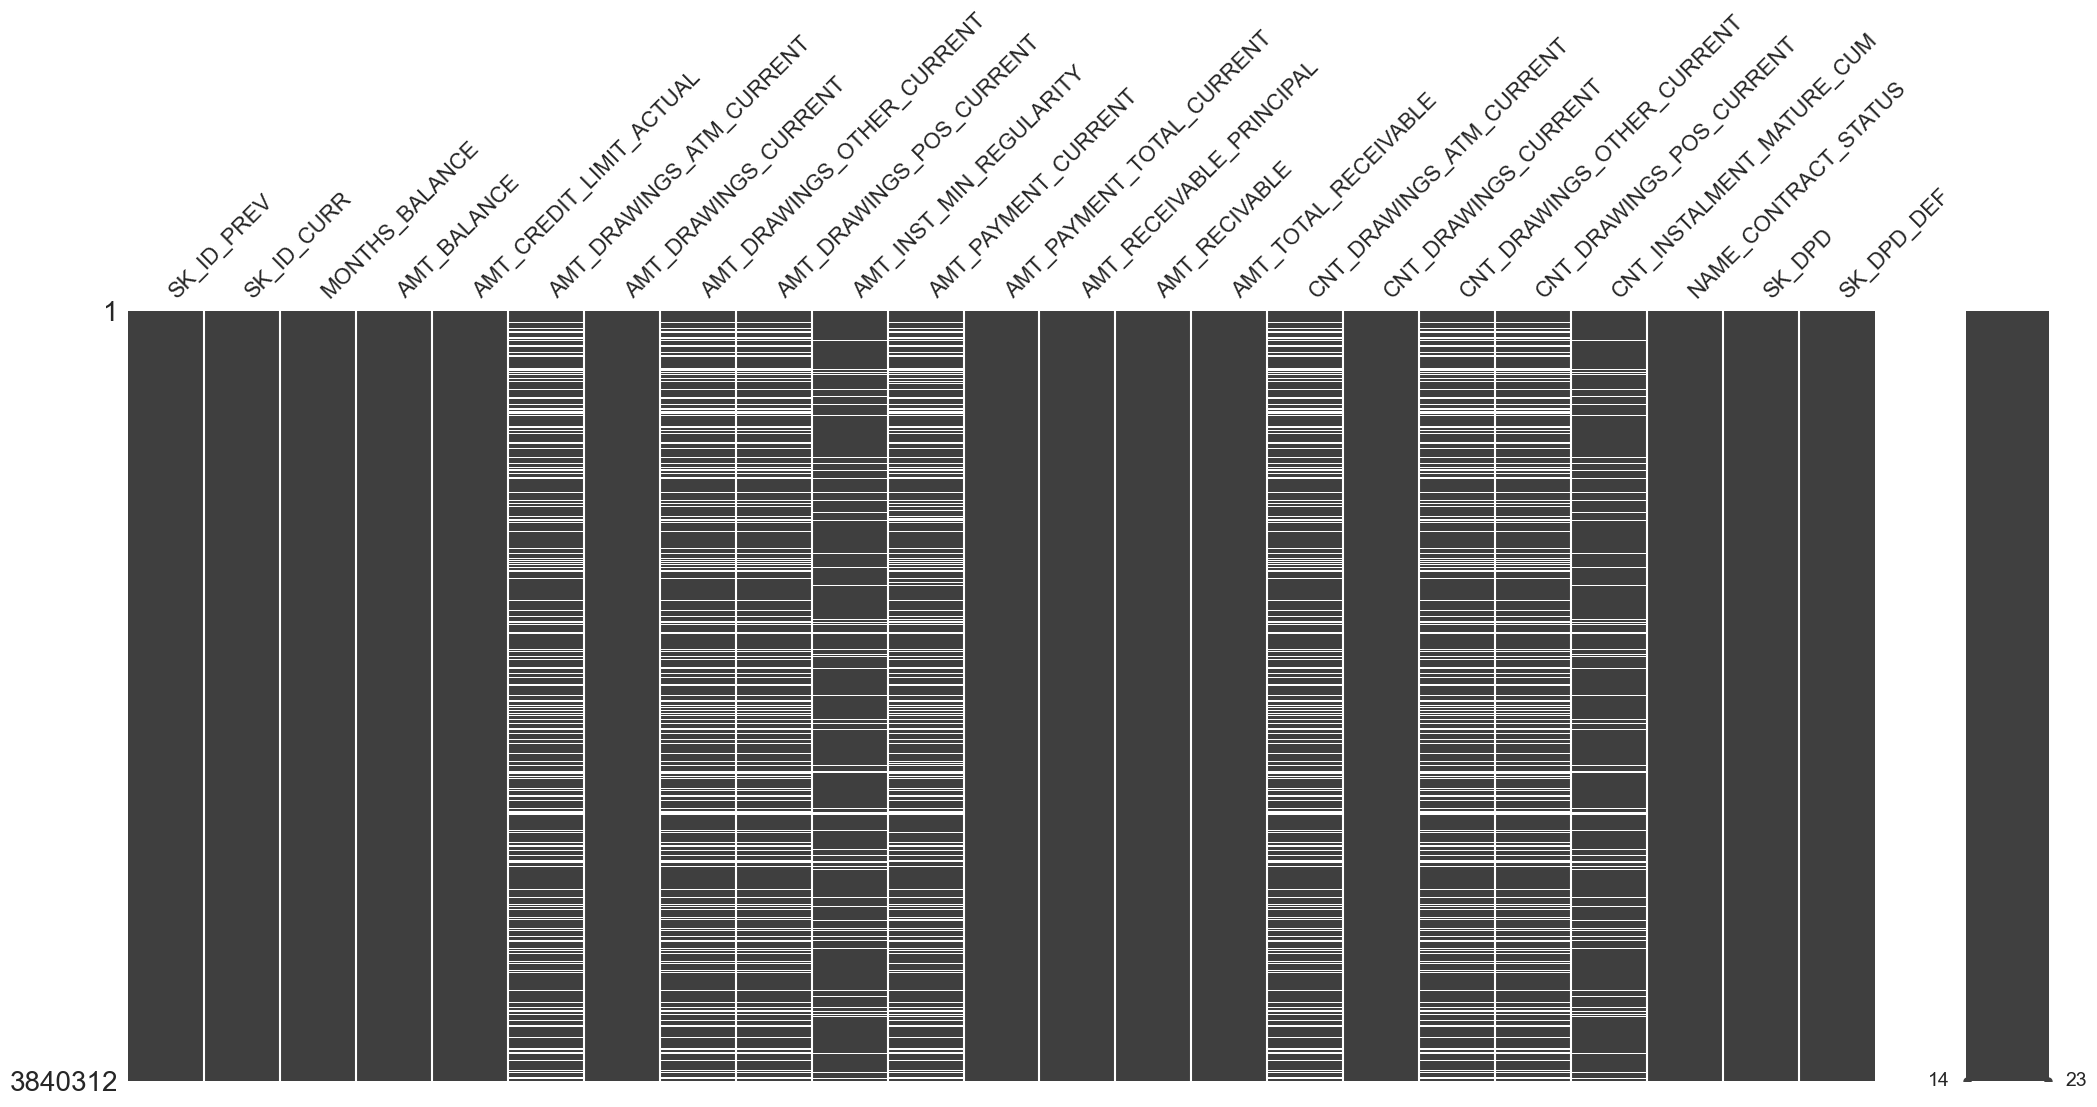

In [97]:
# Visualisation des données manquantes dans le dataset
fonctions_data.get_val_manq(credit_card_balance, True, True)

**Bilan** :
***
- Sur les 23 variables, 9 d'entre elles contiennent des valeurs NaN.
- Si nous regardons les pourcentages de valeurs NaN, ils sont considérablement inférieurs au reste des tableaux que nous avons vus jusqu'à présent.
- 7 de ces variables ont près de 20% de valeurs NaN.
- Ces variables sont principalement liées aux montants des tirages et aux nombres de tirages.
- Les deux autres caractéristiques sont liées aux statistiques sur les versements.

**Préparation du dataframe de travail**

In [98]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
print('Création dataframe de travail : merge TARGET avec dataframe cc_balance')
cc_balance_merged = application_train.iloc[:, :2].merge(credit_card_balance,
                                                        on='SK_ID_CURR',
                                                        how='left')
print("-"*79)

-------------------------------------------------------------------------------
Création dataframe de travail : merge TARGET avec dataframe cc_balance
-------------------------------------------------------------------------------


#### <span style='background:Moccasin'>2.3.2. Analyse univariée des colonnes</span>

<span style='background:violet'>**Analyse des données catégorielles**</span>

In [99]:
# Liste des variables qualitatives
cols_cat_ccbal = \
    cc_balance_merged.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_ccbal

['NAME_CONTRACT_STATUS']

<span style='background:mistyrose'>**Variable NAME_CONTRACT_STATUS**</span>

État du contrat au cours du mois.

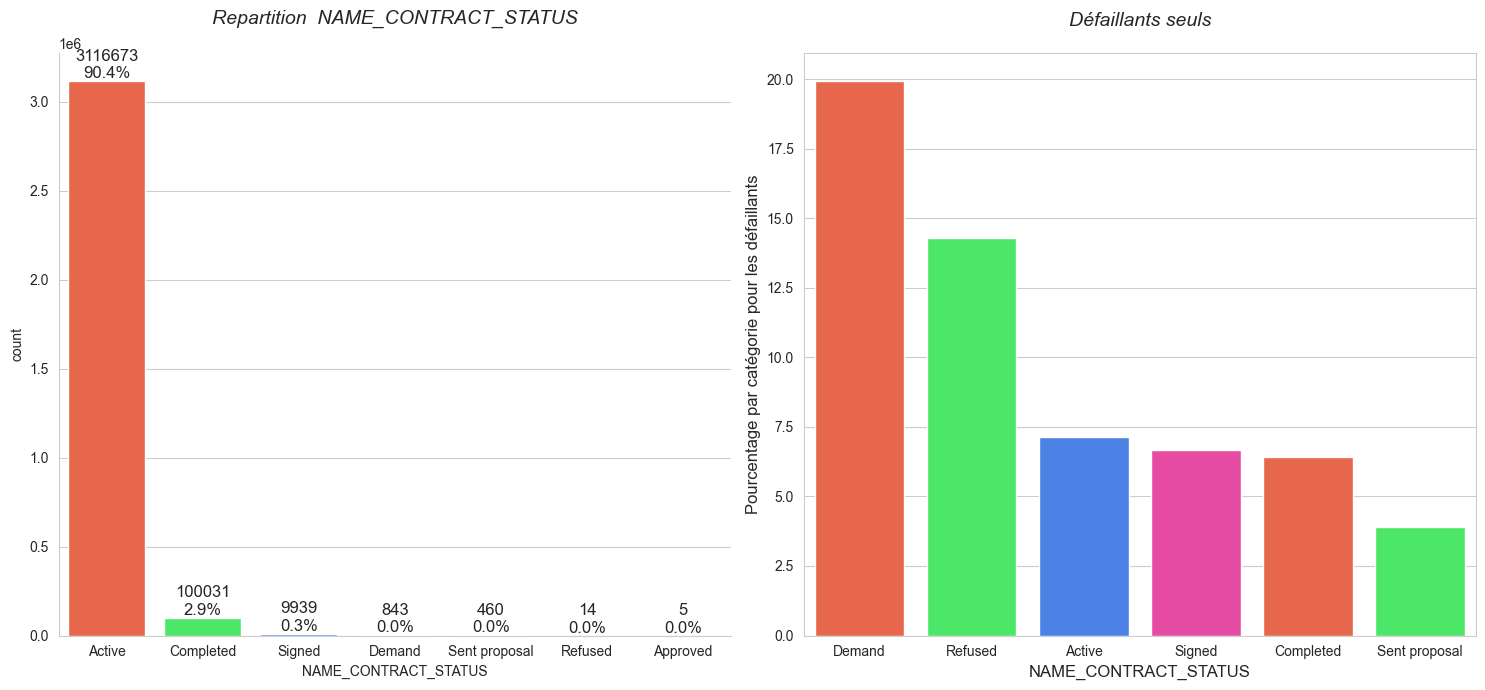

In [103]:
categ_var_bar(cc_balance_merged, 'NAME_CONTRACT_STATUS', custom_palette, "Repartition  NAME_CONTRACT_STATUS\n", (15, 7))

**Bilan** :
***
- La majorité des états des contrats des prêts sont Actif ou Terminé.
- Pour les défaillants, l'état des contrat sont demandé, réfusé puis actif ou signé.
- Les non-défaillants ont plus de prêts actifs que les défaillants.

<span style='background:violet'>**Analyse des variables quantitatives**</span>

In [104]:
# Liste des variables quantitatives
cols_num = \
    cc_balance_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num

['SK_ID_CURR',
 'TARGET',
 'SK_ID_PREV',
 'MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM',
 'SK_DPD',
 'SK_DPD_DEF']

In [105]:
# Aggregation par la moyenne pour chaque pret du champ 'SK_ID_PREV' 

cc_balance_merged = cc_balance_merged.groupby('SK_ID_PREV').mean()

<span style='background:mistyrose'>**Variable AMT_BALANCE**</span>

Montant moyen du solde qu'une personne avait habituellement sur son compte de carte de crédit pour le prêt précédent.

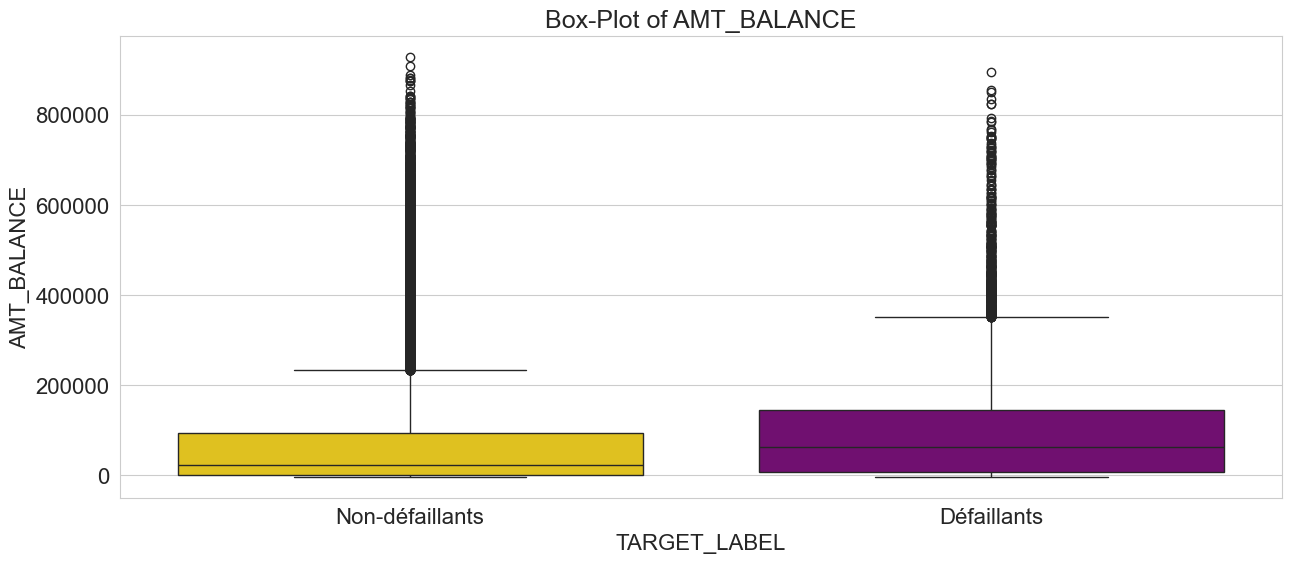

In [106]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'AMT_BALANCE', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- Le boxplot montre une valeur plus élevée, en terme de de montant moyen du solde pour le crédit du coté des défaillants par rapport aux non-défaillants.
- Cela renseigne généralement sur les habitudes de dépense et d'emprunt des personnes. Les défaillants ont des habitudes de dépenses et d'emprunt plus élevées que les non défaillants.

<span style='background:mistyrose'>**Variable AMT_TOTAL_RECEIVABLE**</span>

Moyenne du montant total à recevoir sur le crédit précédent.

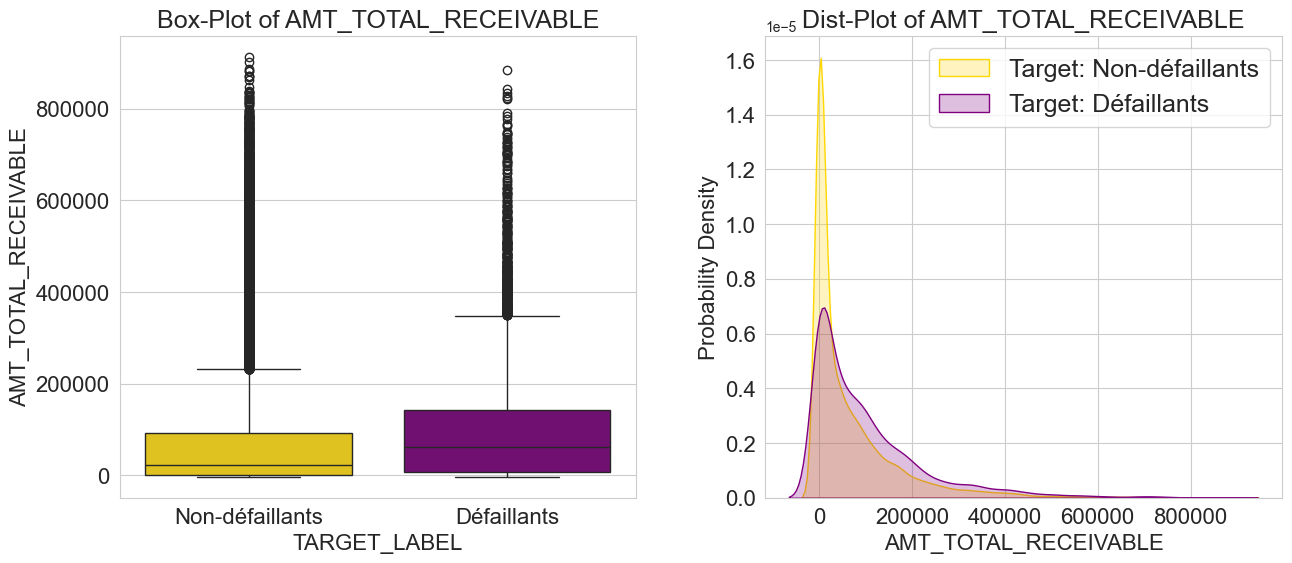

In [108]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'AMT_TOTAL_RECEIVABLE', plots=['box', 'distplot'], figsize=(15, 6))

**Bilan** :
***
-  Les défaillants ont généralement un montant à recevoir plus élevé pour leur crédit par rapport aux non-défaillants.
-  Au niveau de la PDF, on constate une concentration des montants inférieurs coté non-défaillants par rapport aux défaillants, ce qui implique des montatnts de crédits beaucoup plus faibles pris par les non-défaillants, contrairement aux défaillants.  

<span style='background:mistyrose'>**Variable CNT_INSTALMENT_MATURE_CUM**</span>

Nombre moyen de versements effectués sur les crédits précédents.

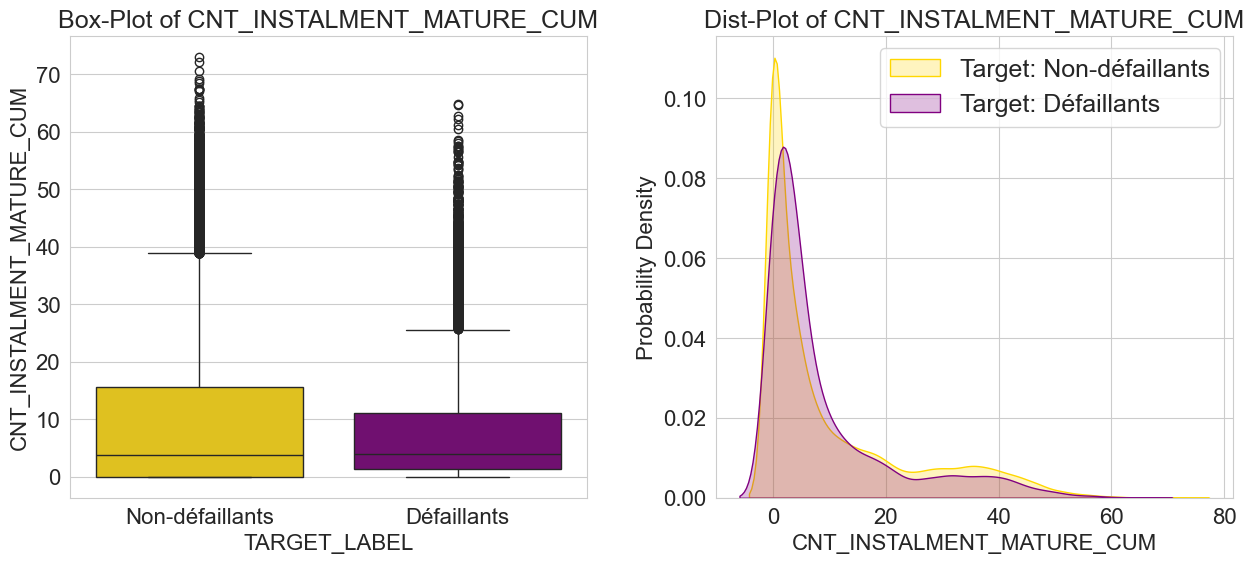

In [109]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'CNT_INSTALMENT_MATURE_CUM', plots=['box', 'distplot'], figsize=(15, 6))

**Bilan** :
***
- Le boxplot témoigne d'une fourchette alloué aux versements de crédits plus importants, coté non-défaillants par rapport aux défaillants.

<span style='background:mistyrose'>**Variable MONTHS_BALANCE**</span>

Mois du solde par rapport à la date d'application (-1 signifie la date de solde la plus récente).

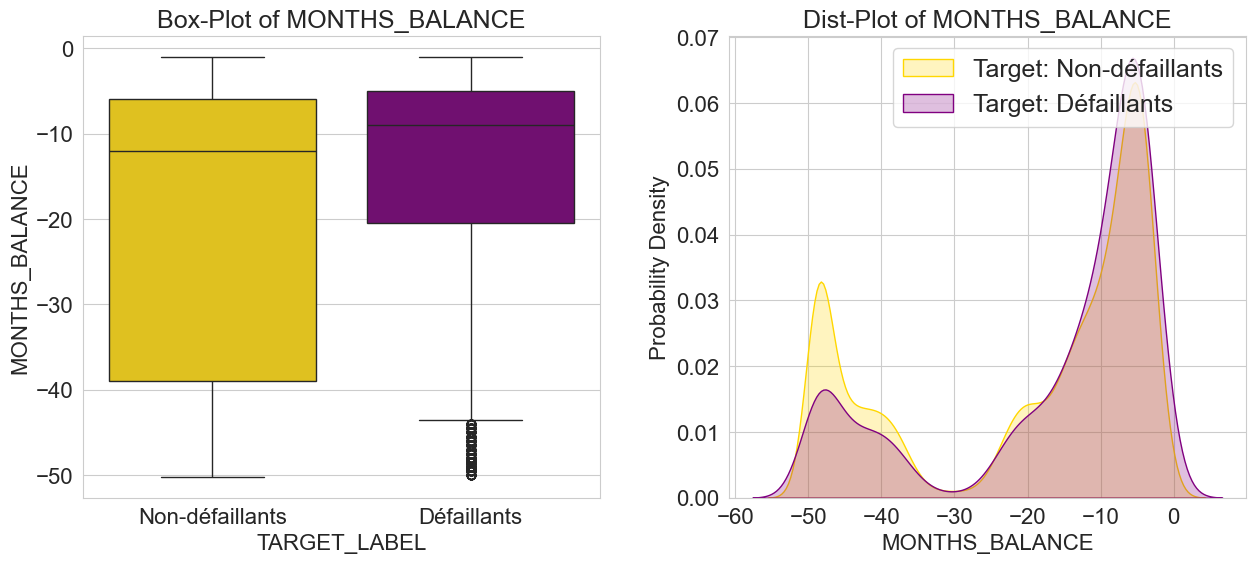

In [110]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'MONTHS_BALANCE', plots=['box', 'distplot'], figsize=(15, 6))

**Bilan** :
***
- Les défaillants ont tendance à faire plus souvent les soldes que les non-défaillants.

<span style='background:mistyrose'>**Variable  AMT_CREDIT_LIMIT_ACTUAL**</span>

Limite de la carte de crédit au cours du mois du crédit précédent.

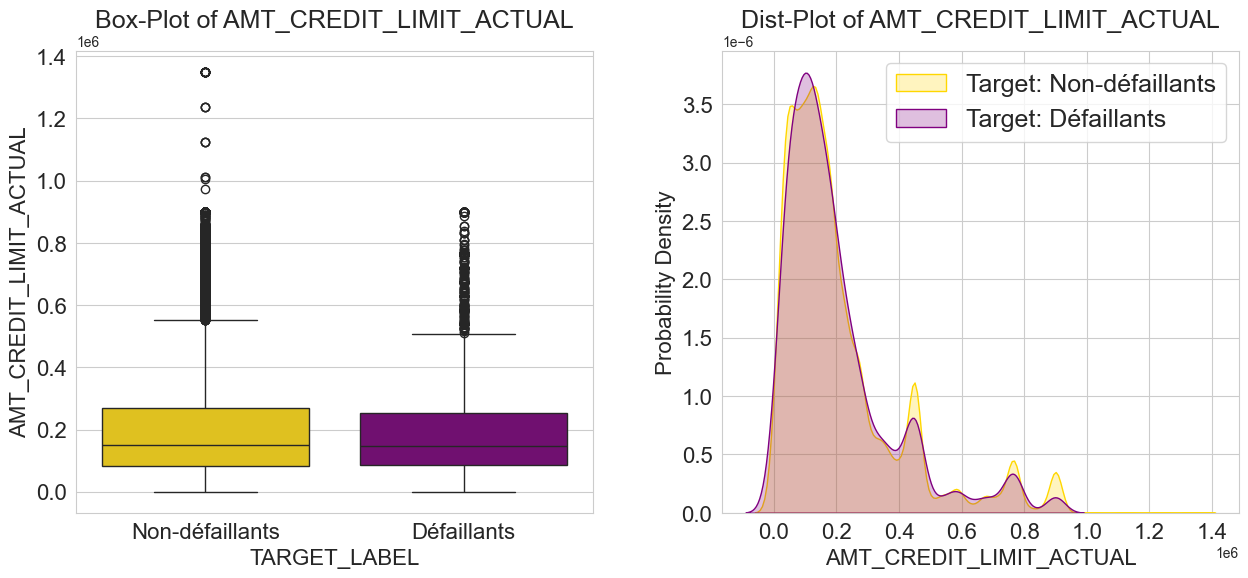

In [111]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'AMT_CREDIT_LIMIT_ACTUAL', plots=['box', 'distplot'], figsize=(15, 6))

**Bilan** :
***
- Les non-défaillants ont une limite sur la carte de crédit légèrement plus élevée que les non-défaillants.
- On peut constater sur la PDF de légers pics vers des montants de crédits (limites) plus conséquent concernant des non-défaillants, qui viennent confirmer l'analyse du boxplot. 

<span style='background:mistyrose'>**Variable AMT_DRAWINGS_ATM_CURRENT**</span>

Montant retiré au guichet automatique pendant le mois du crédit précédent.

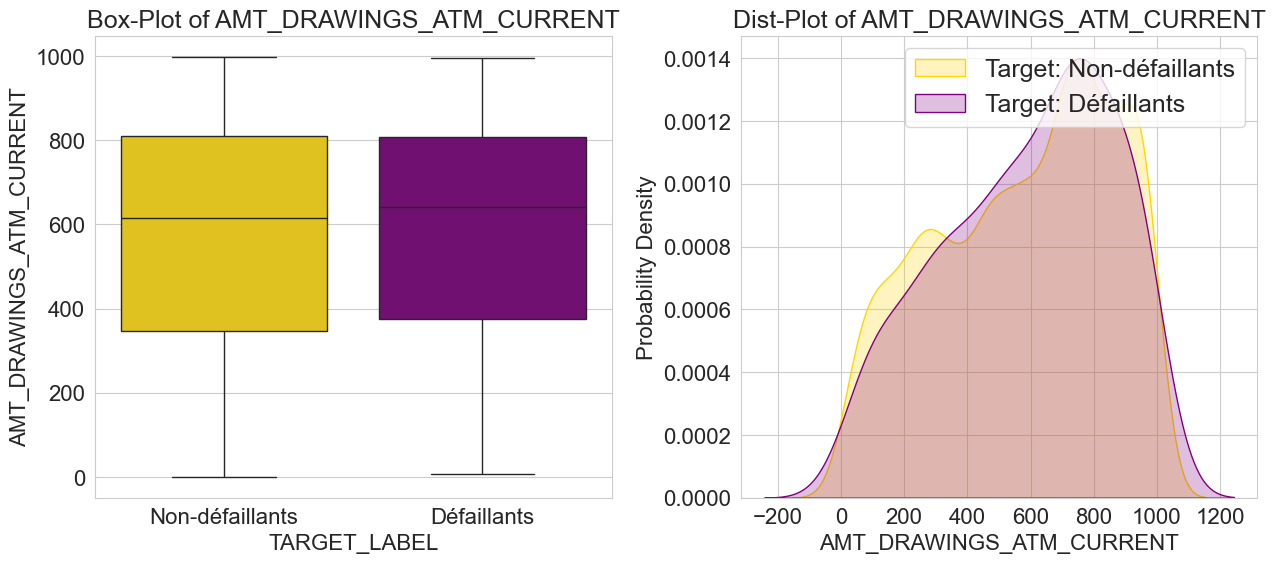

In [113]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'AMT_DRAWINGS_ATM_CURRENT', plots=['box', 'distplot'], figsize=(15, 6), scale_limits=[0, 1000])

**Bilan** :
***
- Un montant retiré au guichet automatique pendant le mois du crédit précédent légèrement supérieur pour les défaillants que les non-défaillants.

<span style='background:mistyrose'>**Variable AMT_DRAWINGS_CURRENT**</span>

Montant prélevé au cours du mois du crédit précédent.

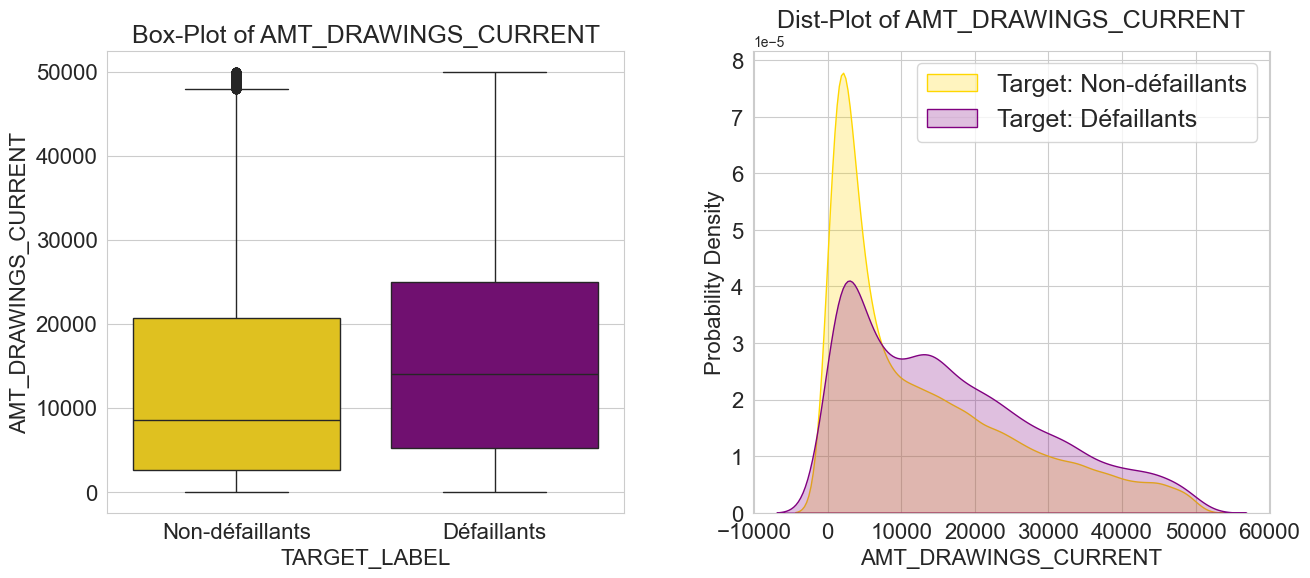

In [114]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'AMT_DRAWINGS_CURRENT', plots=['box', 'distplot'], figsize=(15, 6),
                                               scale_limits=[0, 0.05e6])

**Bilan** :
***
- Un montant prélevé du crédit au cours du mois plus conséquent coté défaillants, par rapport aux non-défaillants. Les défaillants sont plus dépensiers que les non-défaillants.

<span style='background:mistyrose'>**Variable AMT_DRAWINGS_OTHER_CURRENT**</span>

Montant des autres retraits au cours du mois du crédit précédent

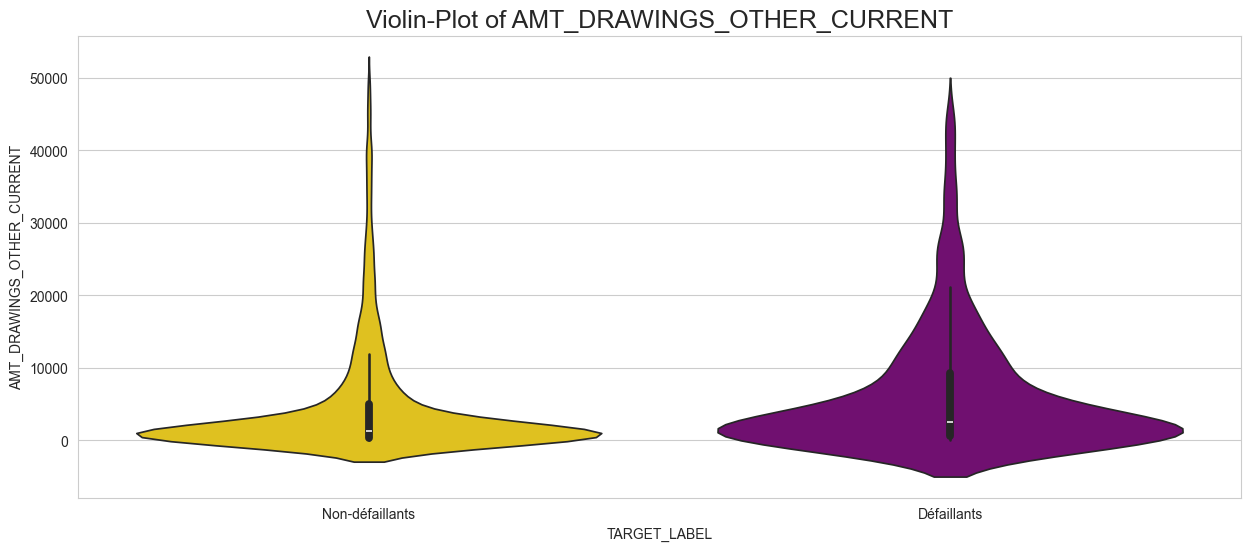

In [115]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'AMT_DRAWINGS_OTHER_CURRENT', plots=['violin'], figsize=(15, 6),
                                               scale_limits=[0, 0.05e6])

**Bilan** :
***
- Les autres retraits, de type secondaire (petits montants) sont légèrement plus élevées coté non-défaillants, par rapport aux défaillants.

<span style='background:mistyrose'>**Variable AMT_DRAWINGS_POS_CURRENT**</span>

Montant des prélèvements ou des achats de marchandises au cours du mois du crédit précédent.

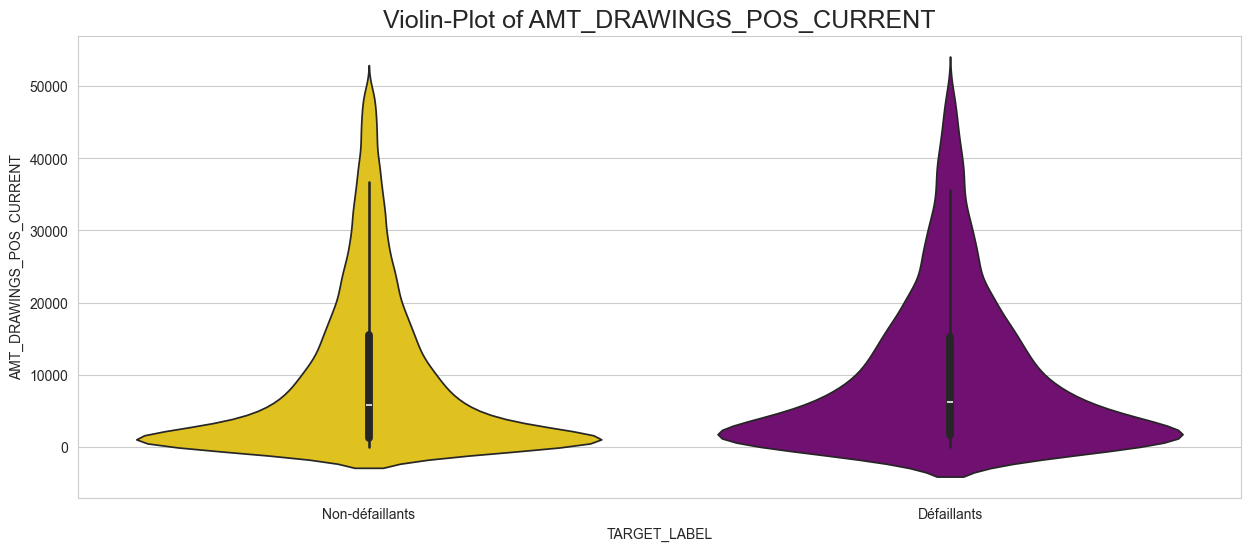

In [117]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'AMT_DRAWINGS_POS_CURRENT', plots=['violin'], figsize=(15, 6),
                                               scale_limits=[0, 0.05e6])

**Bilan** :
***
- Les petits montants des prélèvements ou des achats de marchandises au cours du mois de la crédibilité précédente sont plus nombreux pour les défaillants et inversement.

<span style='background:mistyrose'>**Variable AMT_INST_MIN_REGULARITY**</span>

Montant minimal pour ce mois du crédit précédent(régularité).

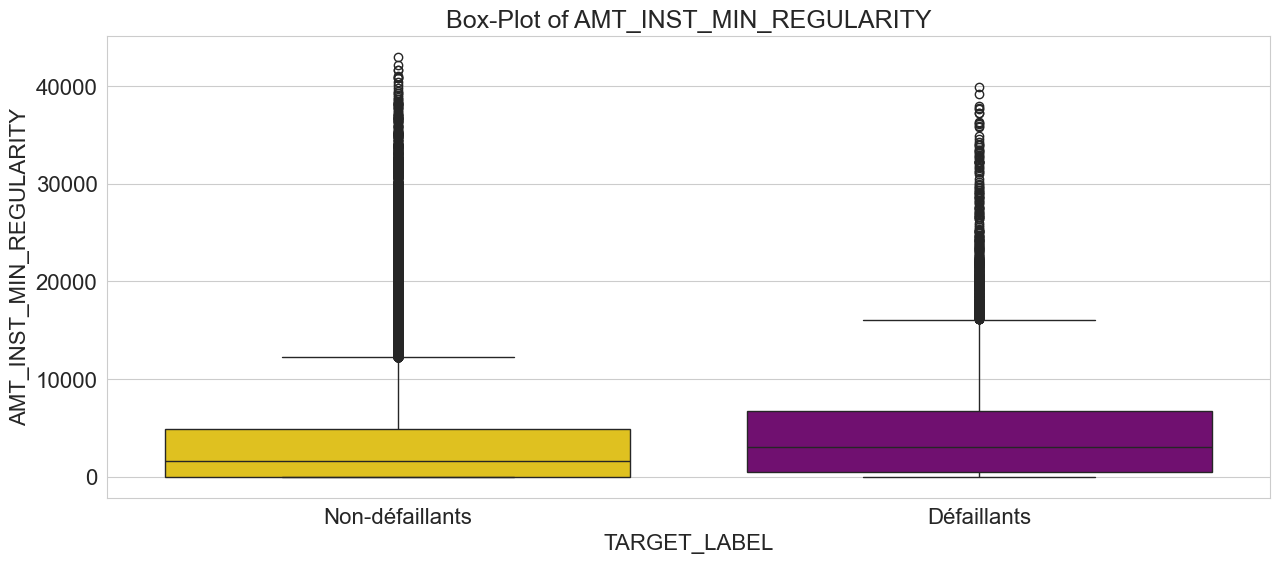

In [118]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'AMT_INST_MIN_REGULARITY', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- Un montant plus important pour les défaillants que les non-défaillants.

<span style='background:mistyrose'>**Variable AMT_PAYMENT_CURRENT**</span>

Montant du paiement courant du demandeur durant le mois sur le crédit précédent.

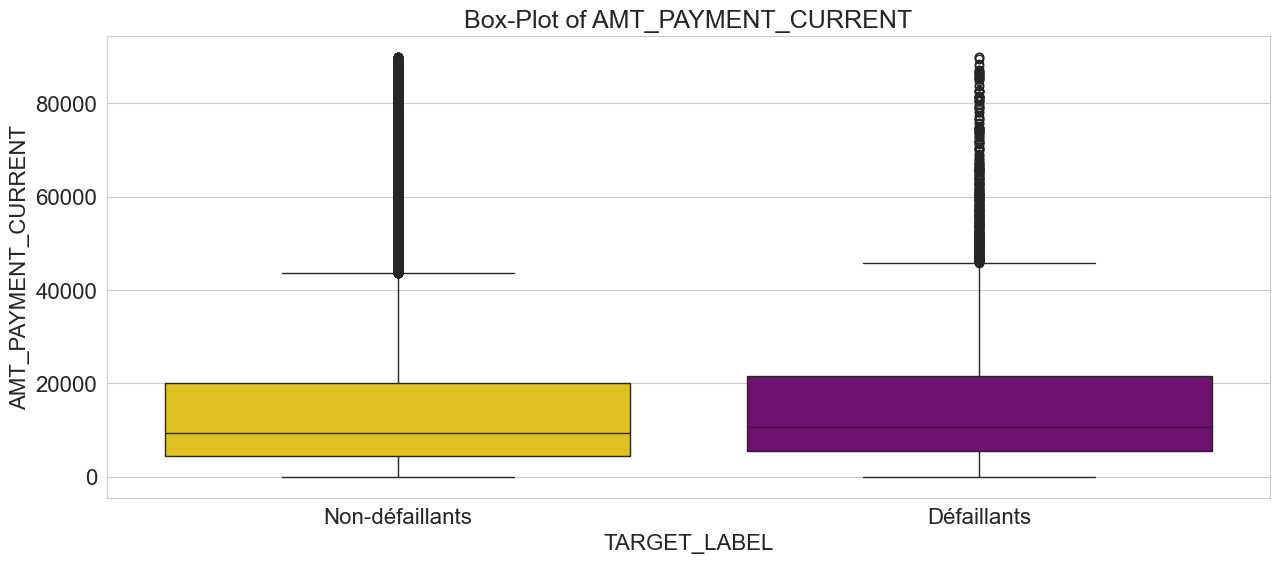

In [121]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'AMT_PAYMENT_CURRENT', plots=['box'], figsize=(15, 6),
                                               scale_limits=[0, 0.09e6])

**Bilan** :
***
- Peu de différence entre les défaillants et non-défaillants.

<span style='background:mistyrose'>**Variable AMT_PAYMENT_TOTAL_CURRENT**</span>

Montan total du paiement courant du crédit du demandeur durant le mois.

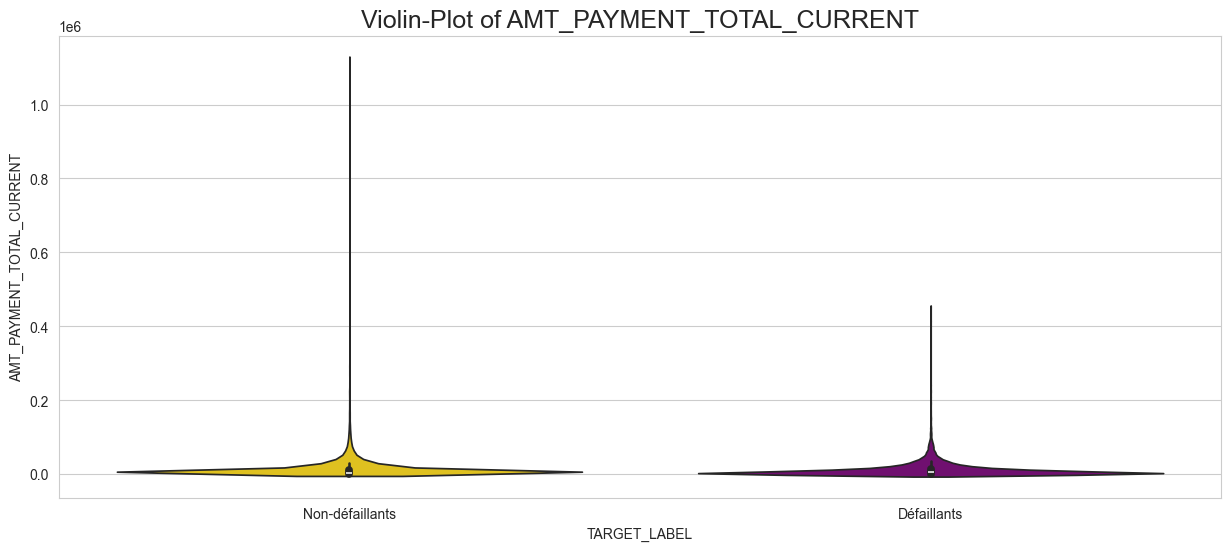

In [126]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'AMT_PAYMENT_TOTAL_CURRENT', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Les non-défaillants au final ont effectué des montants plus élévés pendant le mois sur le crédit précédent que les défaillants.

<span style='background:mistyrose'>**Variable AMT_RECEIVABLE_PRINCIPAL**</span>

Montant à recevoir pour le principal du crédit précédent

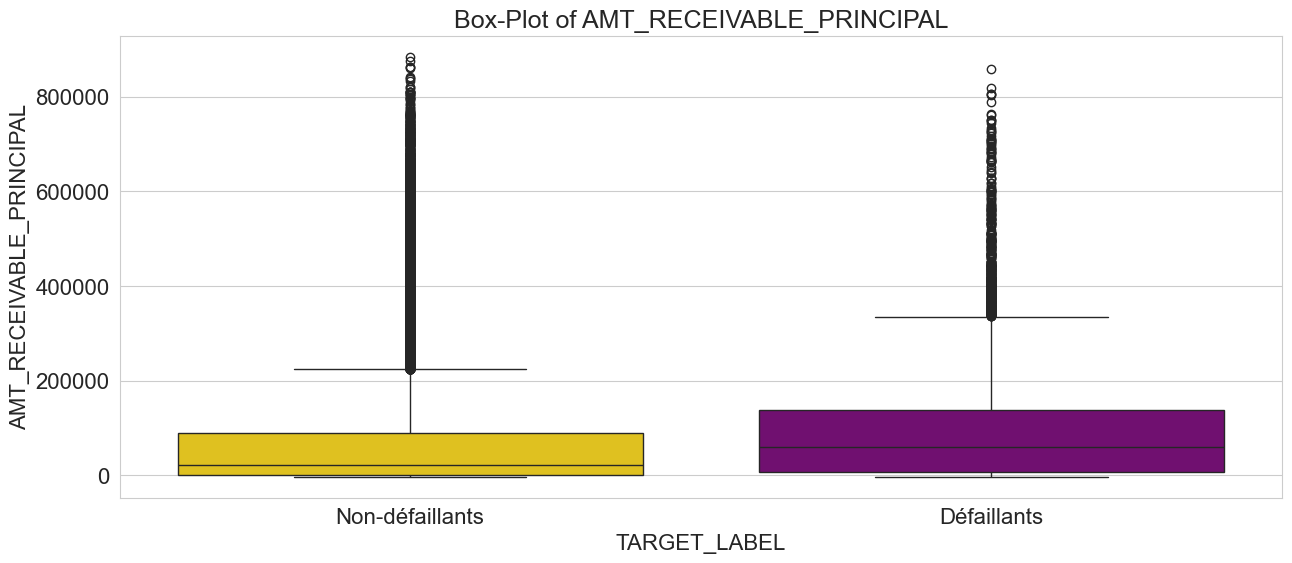

In [127]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'AMT_RECEIVABLE_PRINCIPAL', plots=['box'], figsize=(15, 6))

**Bilan** :
***
-Le montant à recevoir pour le principal du crédit précédent est bien supérieur pour les défaillants que les non-défaillants.

<span style='background:mistyrose'>**Variable AMT_RECIVABLE**</span>

Montant à recevoir du crédit précédent

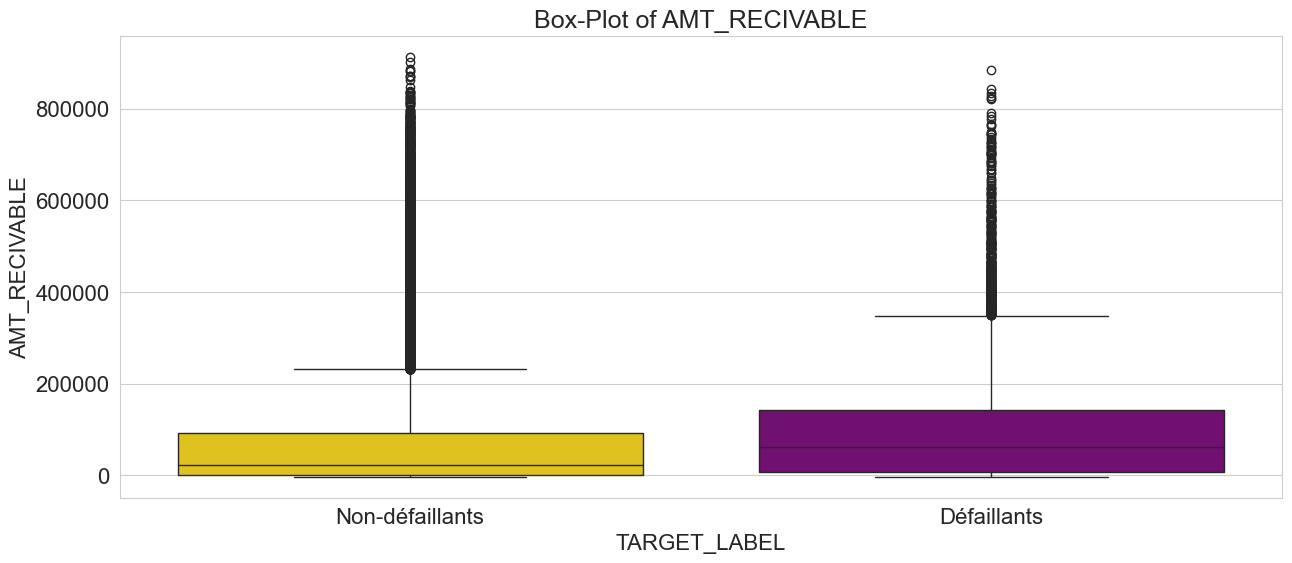

In [128]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'AMT_RECIVABLE', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- Le montant à recevoir sur le crédit précédent est bien supérieur pour les non-défaillants que les défaillants.

<span style='background:mistyrose'>**Variable CNT_DRAWINGS_ATM_CURRENT**</span>

Nombre de retraits au guichet automatique durant ce mois sur le crédit précédent.

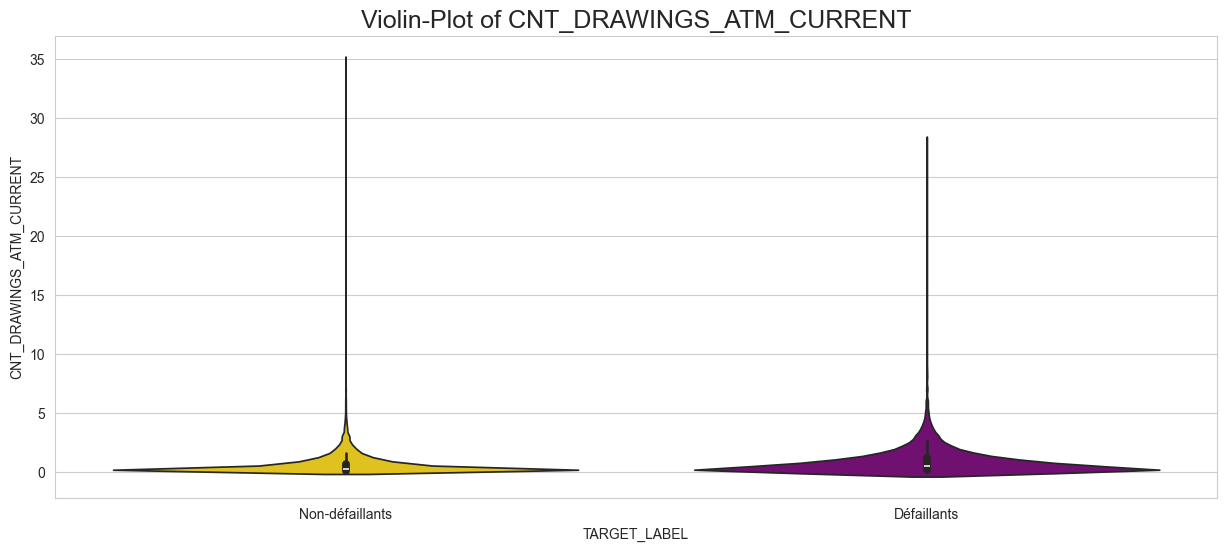

In [130]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'CNT_DRAWINGS_ATM_CURRENT', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Légèemrent moins de retraits cotés défaillants par rapport aux non-défaillants.

<span style='background:mistyrose'>**Variable CNT_DRAWINGS_CURRENT**</span>

Nombre de retraits durant ce mois sur le crédit précédent.

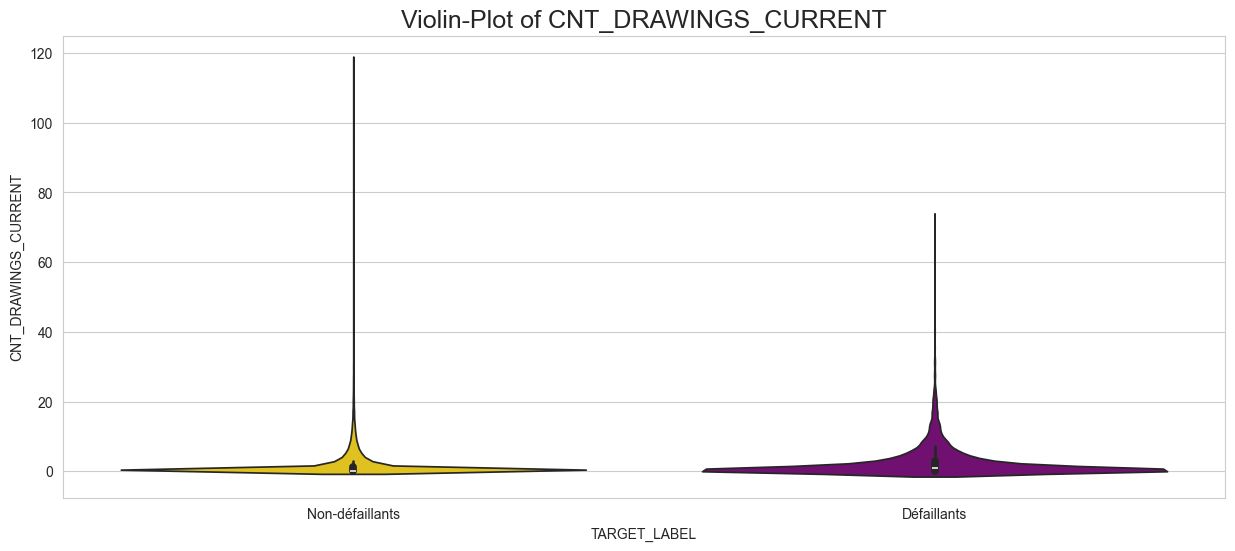

In [133]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'CNT_DRAWINGS_CURRENT', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Meme tendance que la variable **CNT_DRAWINGS_ATM_CURRENT**

<span style='background:mistyrose'>**Variable CNT_DRAWINGS_OTHER_CURRENT**</span>

Nombre d'autres retraits au cours de ce mois sur le crédit précédent.

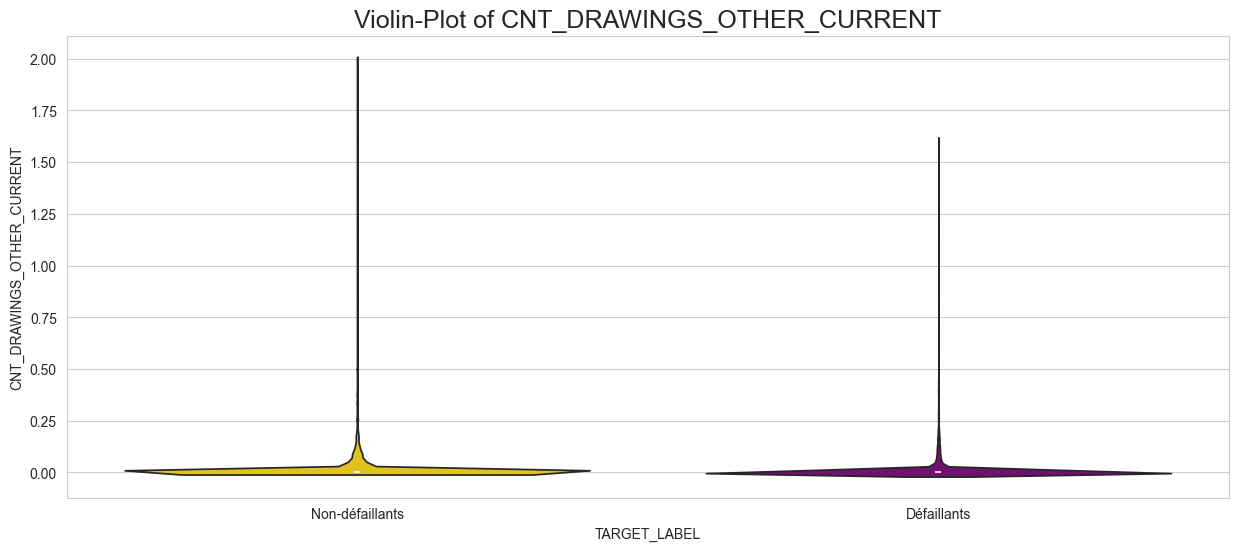

In [134]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'CNT_DRAWINGS_OTHER_CURRENT', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Le nombre d'autres retraits au cours de ce mois sur le crédit précédent est plus nombreux pour les défaillants.

<span style='background:mistyrose'>**Variable CNT_DRAWINGS_POS_CURRENT**</span>

Nombre d'autres retraits marchandises au cours de ce mois sur le crédit précédent.

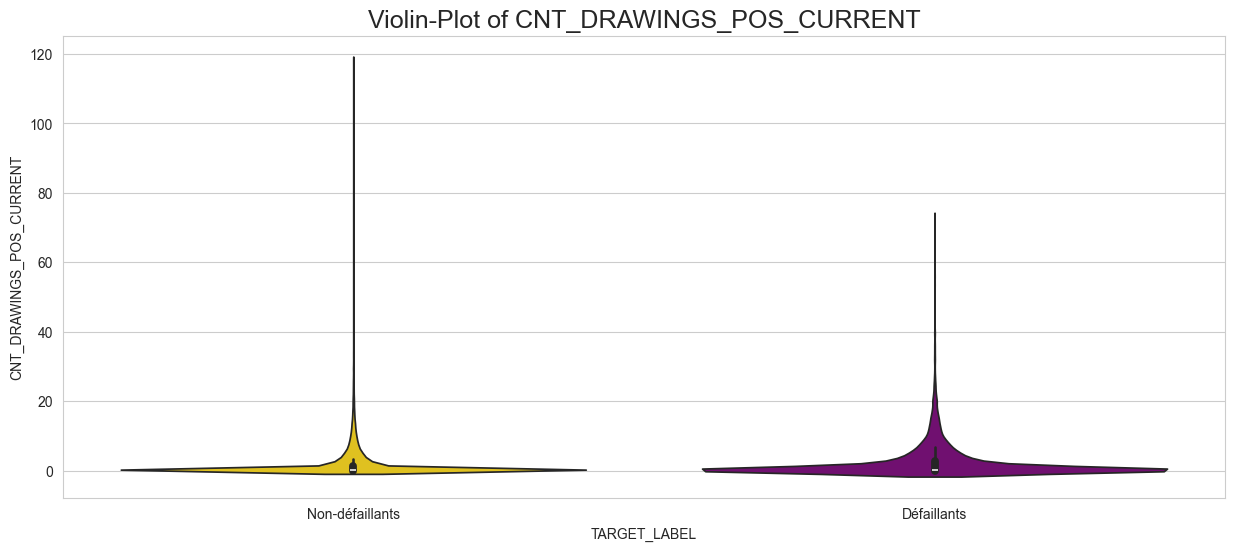

In [135]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'CNT_DRAWINGS_POS_CURRENT', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Nombre de retraits plus nombreux coté non-défaillants par rapport aux défaillants.

<span style='background:mistyrose'>**Variable SK_DPD**</span>

DPD (jours de retard) au cours du mois sur le crédit précédent.

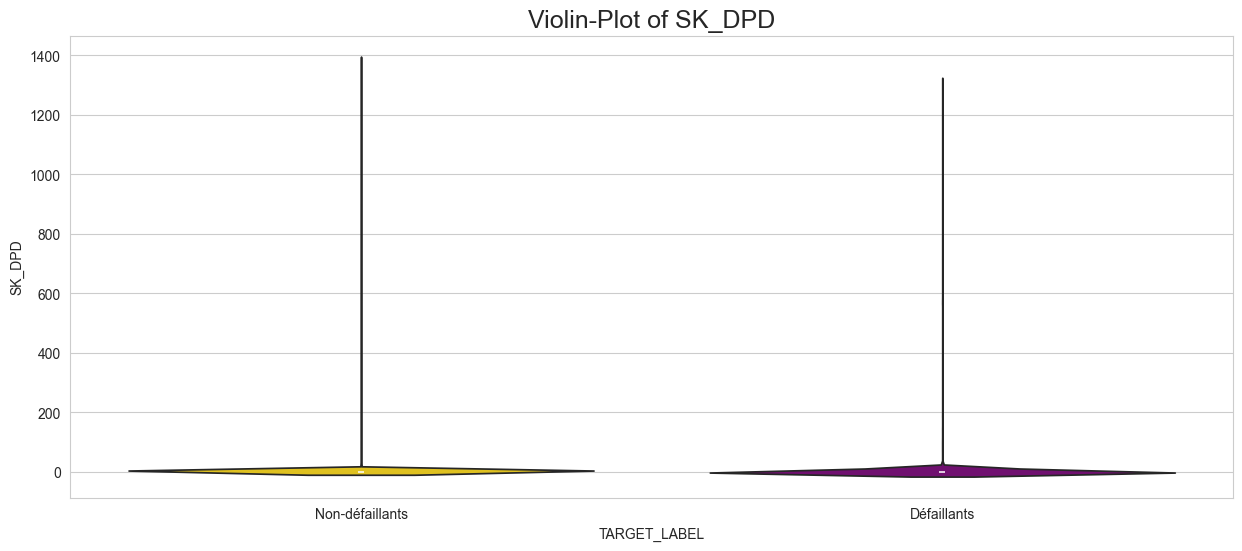

In [136]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'SK_DPD', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence

<span style='background:mistyrose'>**Variable SK_DPD_DEF**</span>

DPD (jours de retard) au cours du mois sur le crédit précédent.

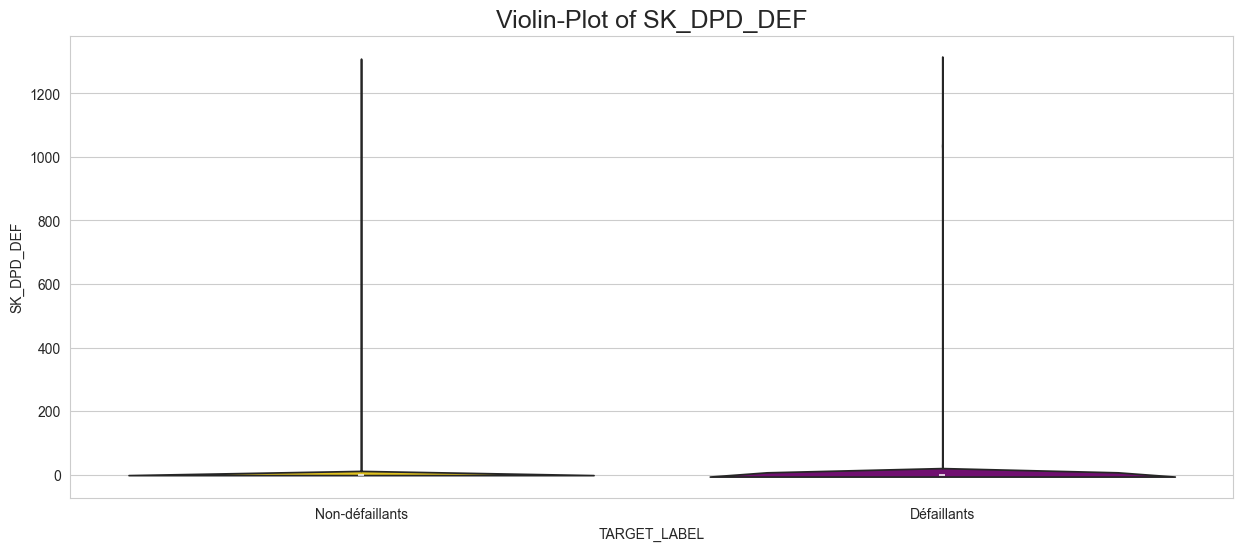

In [137]:
fonctions_data.plot_continuous_variables(cc_balance_merged, 'SK_DPD_DEF', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Les DPDs (jours de retard) au cours du mois sur le crédit précédent sont plus nombreux pour les non-défaillants.

#### <span style='background:Moccasin'>2.3.3. Analyse multivariée des colonnes</span>

<span style='background:mistyrose'>**Corrélation sur les variables numériques**</span>

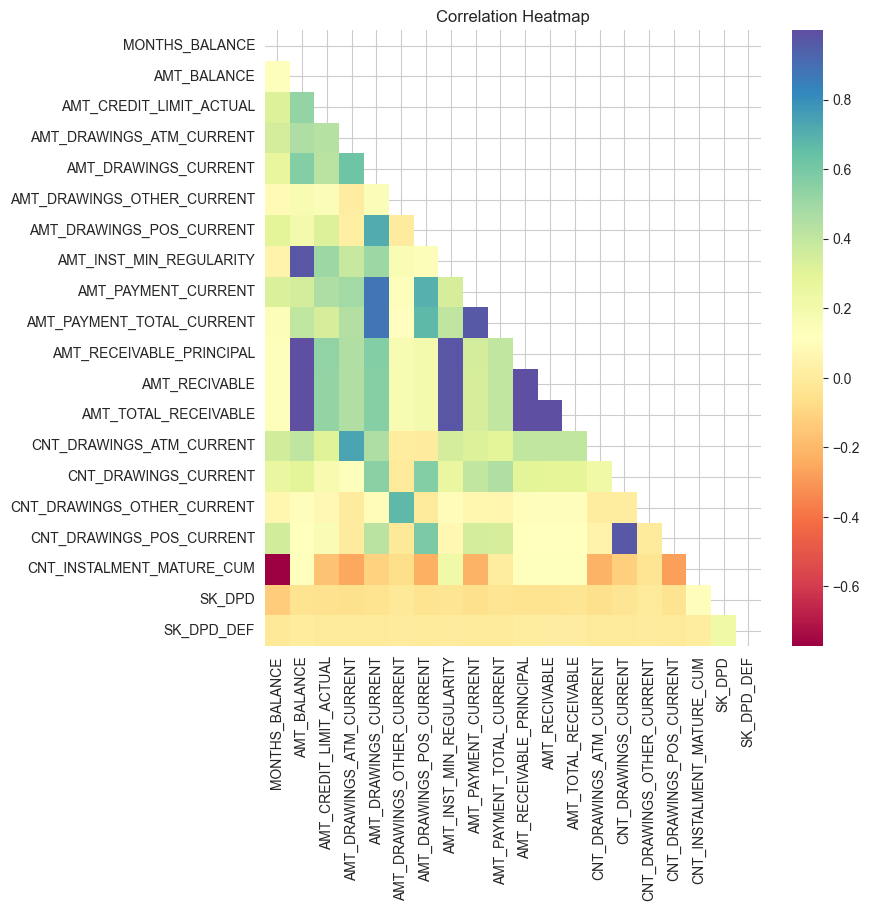

In [140]:
# Heatmap des variables numériques
categorical_columns = cc_balance_merged.select_dtypes(exclude=[np.number]).columns.to_list()

columns_to_drop = ['SK_ID_CURR'] + list(set(categorical_columns)
                                        - set(['TARGET']))

ext_data = cc_balance_merged.drop(columns_to_drop + ['TARGET'], axis=1)

plt.figure(figsize = (8, 8))
mask = np.triu(np.ones_like(ext_data.corr()))
    
# Heatmap of correlations
sns.heatmap(ext_data.corr(), mask = mask, cmap = plt.cm.Spectral)
plt.title('Correlation Heatmap');

**Bilan** :
***
- La carte thermique ci-dessus montre visuellement la corrélation entre les variables du fichier credit_card_balance.csv.
- À partir de la carte thermique de la matrice de corrélation, nous voyons quelques couples de variables fortement corrélées. 
- Il s'agit de :
    - AMT_RECEIVABLE_PRINCIPLE,
    - AMT_RECIVABLE,
    - AMT_TOTAL_RECEIVABLE
    - et AMT_BALANCE.
- Nous observons également une forte corrélation entre ces 2 variables :
    - AMT_PAYMENT_TOTAL_CURRENT,
    - et AMT_PAYMENT_CURRENT.
- Les ensembles des 2ème et 3ème variables en corrélation sont compréhensibles car ils ont plus ou moins la même histoire.
- La corrélation des variables avec la variable cible n'est pas perceptible, ce qui montre l'absence d'une relation linéaire entre la caractéristique et la variable cible.

### <span style='background:orange'>2.4 Fichier installments_payments.csv</span>

#### <span style='background:Moccasin'>2.4.1. statistique des variables</span>

<span style='background:mistyrose'>**Compréhension des variables**</span>

In [141]:
df_var_ccbal = \
    homecredit_columns_description[homecredit_columns_description['Table']
                                   == 'installments_payments.csv']
df_var_ccbal.style.hide_index()

<span style='background:mistyrose'>**Statistiques**</span>

-------------------------------------------------------------
Type de variable pour chacune des variables



SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

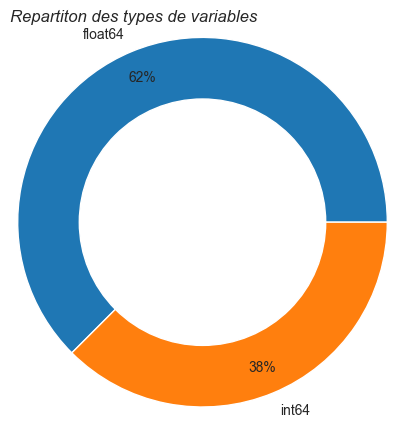

In [142]:
# Types des variables
fonctions_data.affichage_types_var(installment_payment, True, True, True)

In [144]:
# Résumé des variables qualitatives
fonctions_data.detail_type_var(installment_payment, type_var='num')

SK_ID_PREV     SK_ID_CURR NUM_INSTALMENT_VERSION  \
type             int64          int64                float64   
nb_nan             0.0            0.0                    0.0   
%_nan              0.0            0.0                    0.0   
count       13605401.0     13605401.0             13605401.0   
mean    1903364.969549  278444.881738               0.856637   
std      536202.905546  102718.310411               1.035216   
min          1000001.0       100001.0                    0.0   
25%          1434191.0       189639.0                    0.0   
50%          1896520.0       278685.0                    1.0   
75%          2369094.0       367530.0                    1.0   
max          2843499.0       456255.0                  178.0   

       NUM_INSTALMENT_NUMBER DAYS_INSTALMENT DAYS_ENTRY_PAYMENT  \
type                   int64         float64            float64   
nb_nan                   0.0             0.0             2905.0   
%_nan                    0.0             0.0           0.021352   
count             13605401.0      13605401.0         13602496.0   
mean               18.870896    -1042.269992       -1051.113684   
std                26.664067      800.946284         800.585883   
min                      1.0         -2922.0            -4921.0   
25%                      4.0         -1654.0            -1662.0   
50%                      8.0          -818.0             -827.0   
75%                     19.0          -361.0             -370.0   
max                    277.0            -1.0               -1.0   

       AMT_INSTALMENT   AMT_PAYMENT  
type          float64       float64  
nb_nan            0.0        2905.0  
%_nan             0.0      0.021352  
count      13605401.0    13602496.0  
mean     17050.906989   17238.22325  
std      50570.254429  54735.783981  
min               0.0           0.0  
25%          4226.085      3398.265  
50%           8884.08      8125.515  
75%          16710.21     16108.425  
max       3771487.845   3771487.845

Valeurs manquantes :5810 NaN pour 108843208 données (0.01 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



Nombres de valeurs manquantes  % de valeurs manquantes
DAYS_ENTRY_PAYMENT                           2905                     0.02
AMT_PAYMENT                                  2905                     0.02

-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


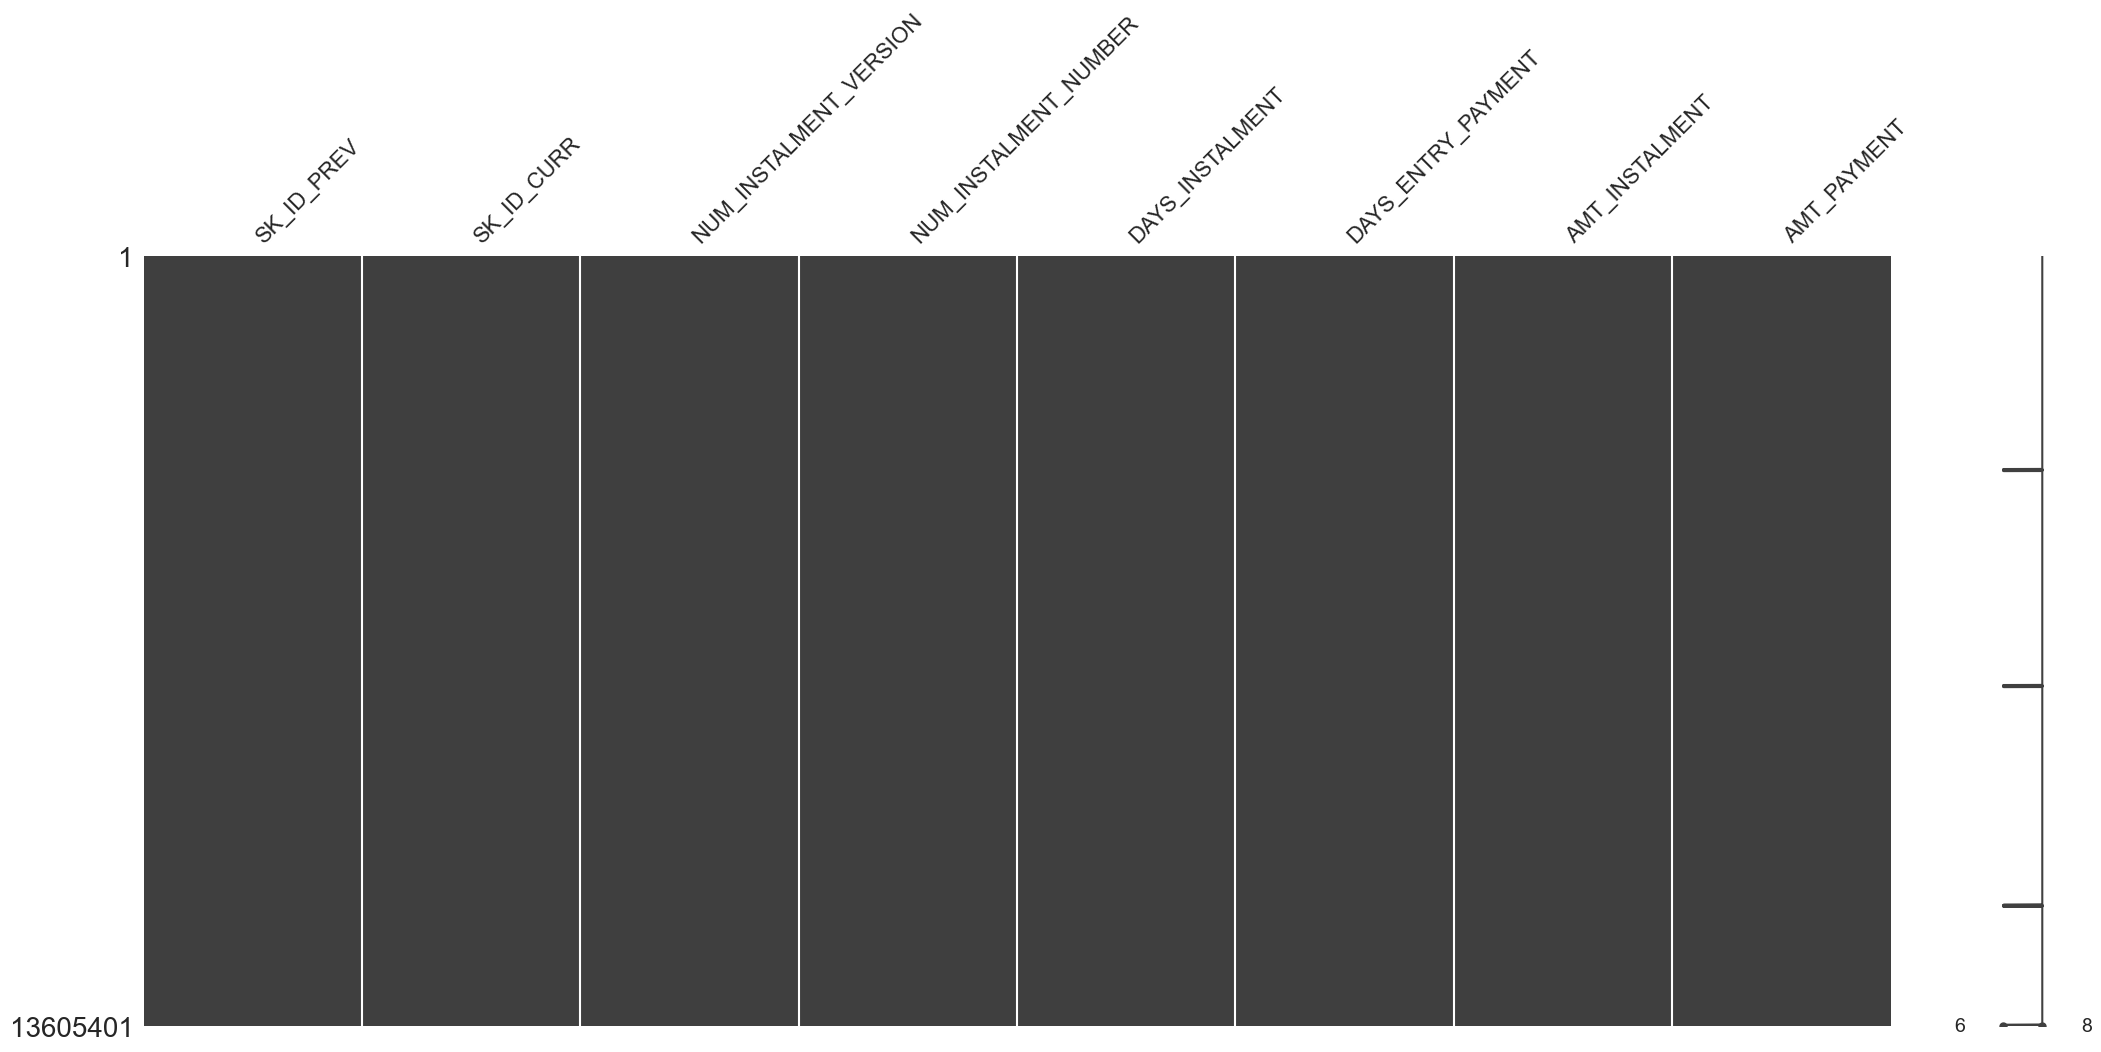

In [145]:
# Visualisation des données manquantes dans le dataset
fonctions_data.get_val_manq(installment_payment, True, True)

**Bilan** :
***
- Sur les 8 variables, 2 d'entre elles contiennent des valeurs NaN.
- 2 de ces variables ont près de 0.02% de valeurs NaN: **DAYS_ENTRY_PAYMENT** et **AMT_PAYMENT** 

**Préparation du dataframe**

In [147]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
part1 = 'Création dataframe de travail : merge TARGET '
print(part1 + 'avec dataframe installments_payments')
installments_merged = \
    application_train.iloc[:, :2].merge(installment_payment,
                                        on='SK_ID_CURR',
                                        how='left')
print("-"*79)

-------------------------------------------------------------------------------
Création dataframe de travail : merge TARGET avec dataframe installments_payments
-------------------------------------------------------------------------------


#### <span style='background:Moccasin'>2.4.2. Analyse univariée des colonnes</span>

<span style='background:violet'>**Analyse des données catégorielles**</span>

In [150]:
# Liste des variables quantitatives
cols_num_instpaie = \
    installments_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num_instpaie

['SK_ID_CURR',
 'TARGET',
 'SK_ID_PREV',
 'NUM_INSTALMENT_VERSION',
 'NUM_INSTALMENT_NUMBER',
 'DAYS_INSTALMENT',
 'DAYS_ENTRY_PAYMENT',
 'AMT_INSTALMENT',
 'AMT_PAYMENT']

In [151]:
# Aggrégation par la moyenne du champ SK_ID_PREV
installments_merged = installments_merged.groupby('SK_ID_PREV').mean()

<span style='background:mistyrose'>**Variable DAYS_INSTALMENT**</span>

Cette variable indique les jours où le versement du crédit précédent devait être payé.

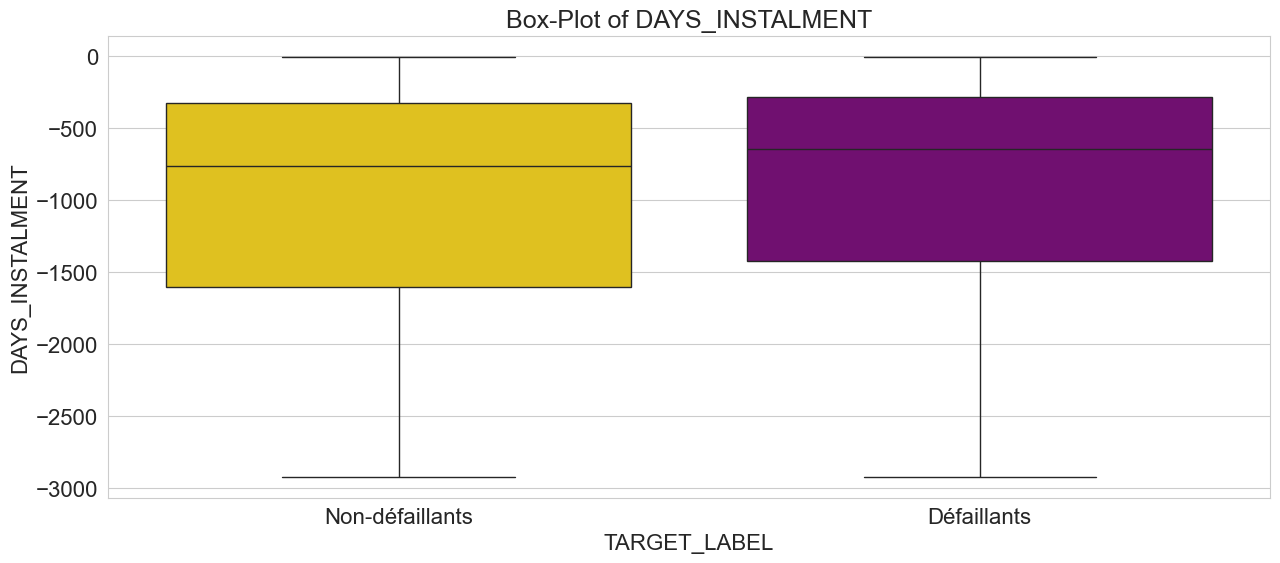

In [152]:
fonctions_data.plot_continuous_variables(installments_merged, 'DAYS_INSTALMENT', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- Les jours où le versement du précédent devait être payé est inférieur pour les défaillants

<span style='background:mistyrose'>**Variable DAYS_ENTRY_PAYMENT**</span>

Cette variable indique les jours où le versement du crédit précédent a été effectivement payé.

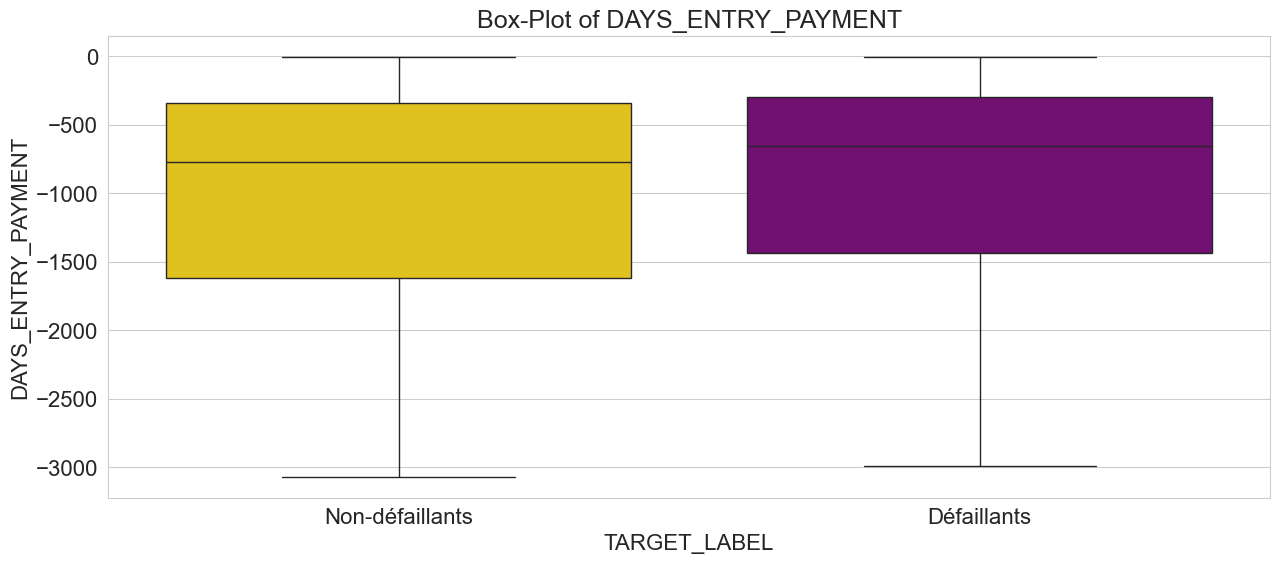

In [153]:
fonctions_data.plot_continuous_variables(installments_merged, 'DAYS_ENTRY_PAYMENT', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- les mauvais payeurs ont tendance à avoir moins de jours depuis leur dernier paiement, tandis que les mauvais payeurs ont plus de jours depuis leur dernier paiement.- 
Tous les quantiles des défaillants ont plus de jours récents que ceux des non-défaillants. Ainsi, les non-défaillants ont généralement plus d'écart dans leurs paiements depuis le jour de la demande que les défaillants.

<span style='background:mistyrose'>**Variable NUM_INSTALMENT_VERSION**</span>

Version du calendrier des versements (0 pour la carte de crédit) du crédit précédent. Le changement de la version des versements d'un mois à l'autre signifie qu'un paramètre du calendrier de paiement a changé.

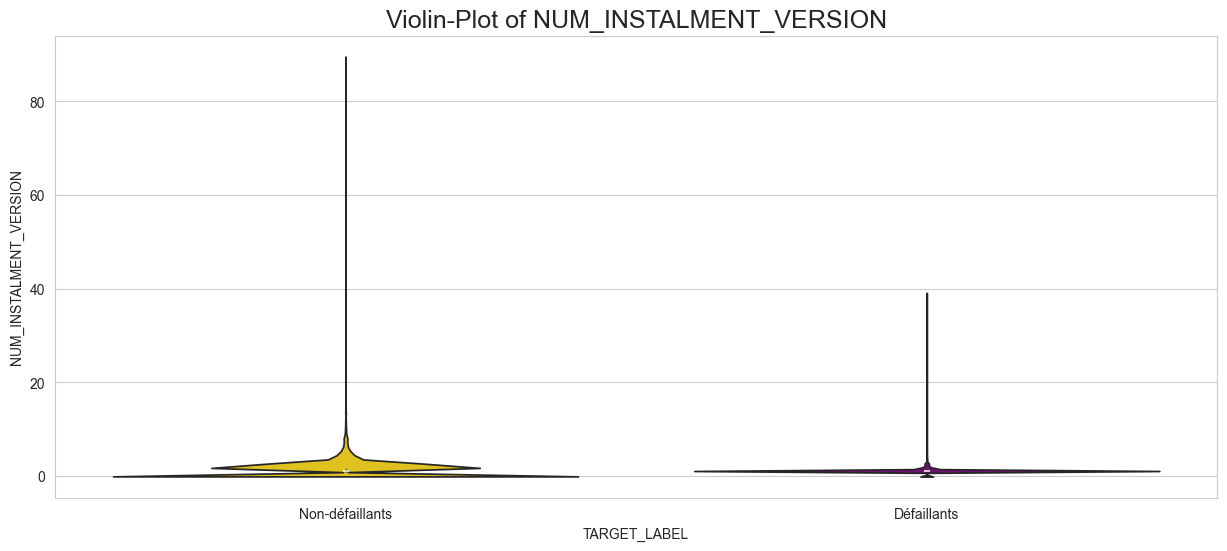

In [155]:
fonctions_data.plot_continuous_variables(installments_merged, 'NUM_INSTALMENT_VERSION', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Plus de modification de calendrier pour les non-défaillants.

<span style='background:mistyrose'>**Variable  NUM_INSTALMENT_NUMBER**</span>

Sur quel versement nous observons le paiement.

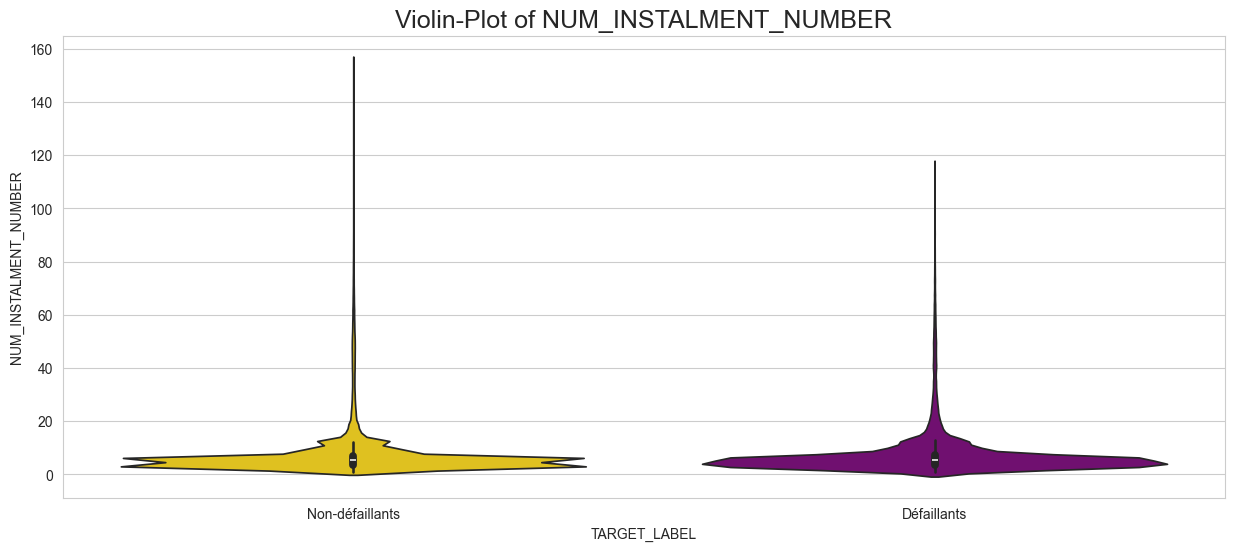

In [156]:
fonctions_data.plot_continuous_variables(installments_merged, 'NUM_INSTALMENT_NUMBER', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence

<span style='background:mistyrose'>**Variable AMT_INSTALMENT**</span>

Montant de l'acompte prescrit du crédit précédent sur cet acompte

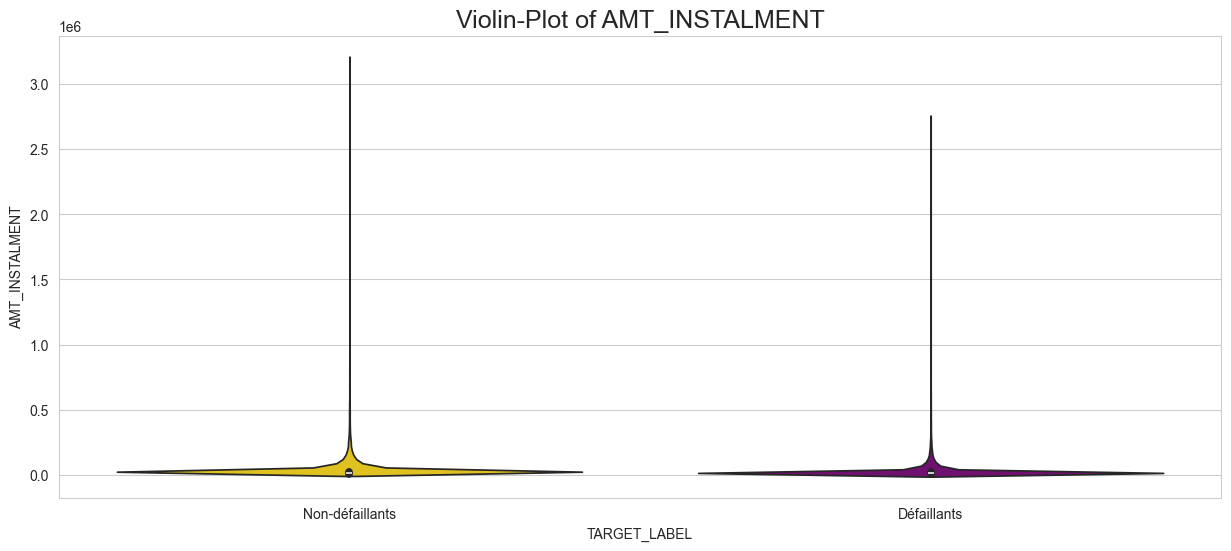

In [157]:
fonctions_data.plot_continuous_variables(installments_merged, 'AMT_INSTALMENT', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence

<span style='background:mistyrose'>**Variable AMT_PAYMENT**</span>

Ce que le demandeur a effectivement payé sur le crédit précédent pour ce versement.

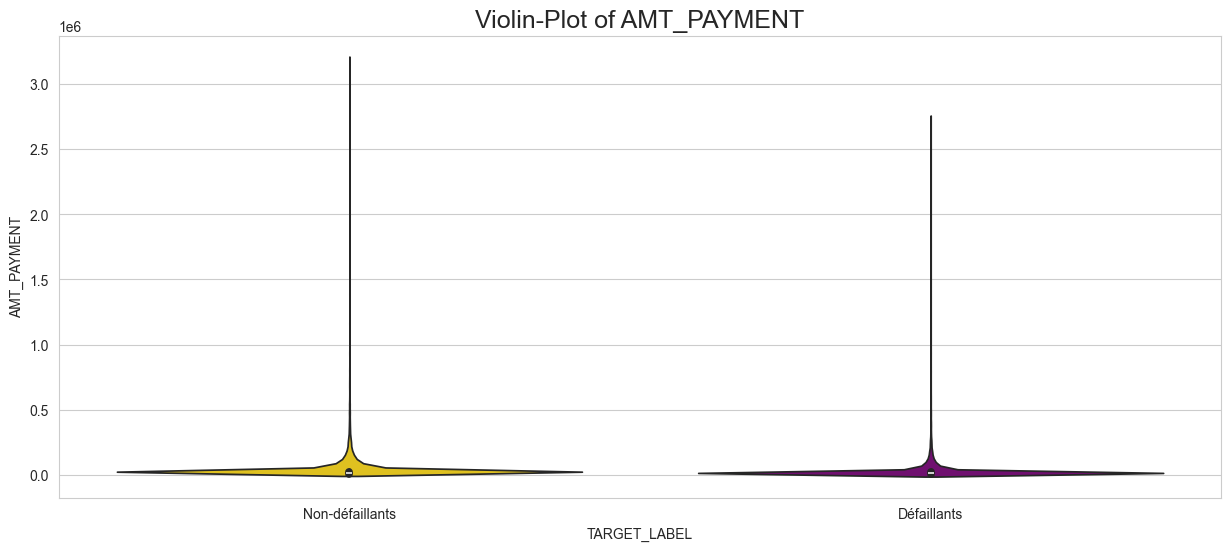

In [158]:
fonctions_data.plot_continuous_variables(installments_merged, 'AMT_PAYMENT', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence

#### <span style='background:Moccasin'>2.4.3. Analyse multivariée des colonnes</span>

<span style='background:mistyrose'>**Corrélation sur les variables numériques**</span>

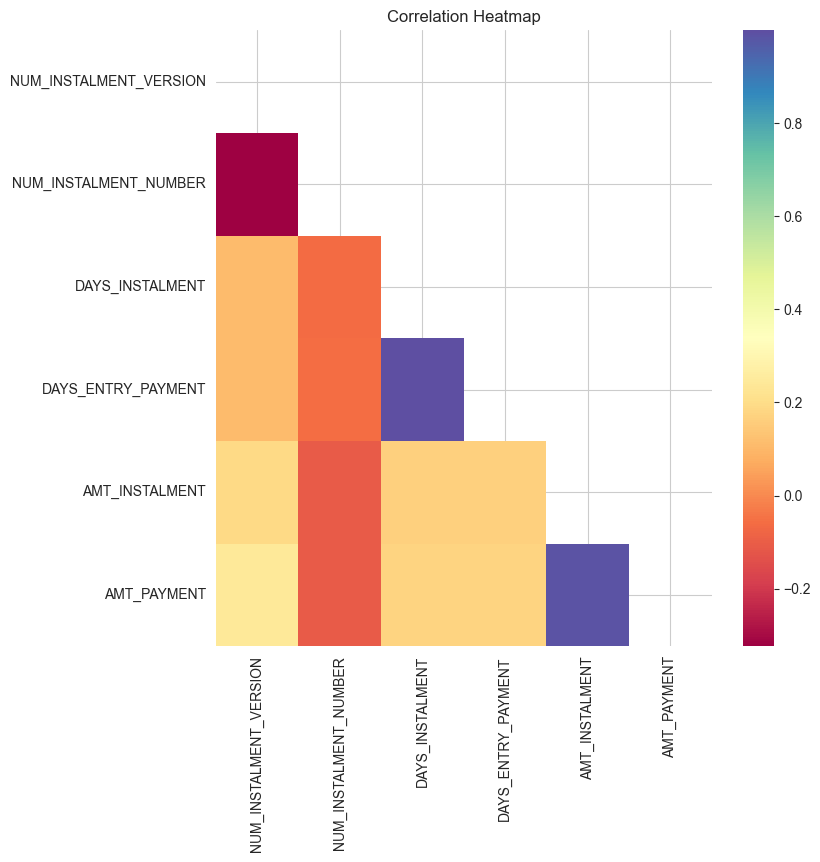

In [159]:
# Heatmap des variables numériques
categorical_columns = installments_merged.select_dtypes(exclude=[np.number]).columns.to_list()

columns_to_drop = ['SK_ID_CURR'] + list(set(categorical_columns)
                                        - set(['TARGET']))

ext_data = installments_merged.drop(columns_to_drop + ['TARGET'], axis=1)

plt.figure(figsize = (8, 8))
mask = np.triu(np.ones_like(ext_data.corr()))
    
# Heatmap of correlations
sns.heatmap(ext_data.corr(), mask = mask, cmap = plt.cm.Spectral)
plt.title('Correlation Heatmap');

**Bilan** :
***
- La carte thermique ci-dessus montre la corrélation entre chaque variable du fichier installments_payments.csv et le reste des variables.
- À partir de la carte thermique de la matrice de corrélation, nous voyons un couple de variables fortement corrélées. Il s'agit de :
    - AMT_INSTALMENT et AMT_PAYMENT,
    - DAYS_INSTALMENT et DAYS_ENTRY_PAYMENT.
- Ces deux ensembles de variables corrélées sont compréhensibles, car il s'agit en fait des variables relatives à la date à laquelle l'acompte devait être payé par rapport à la date à laquelle il a été payé, ainsi qu'au montant qui était dû par rapport au montant qui a été payé.
- Ces variables seront utiles pour créer de nouveaux ensembles de variables totalement non corrélées.
- La corrélation des variables avec la cible n'est pas perceptible, ce qui montre l'absence d'une relation linéaire entre la variable et la variable cible.

### <span style='background:orange'>2.5 Fichier POS_CASH_balance.csv</span>

#### <span style='background:Moccasin'>2.5.1. statistique des variables</span>

<span style='background:mistyrose'>**Compréhension des variables**</span>

In [160]:
df_var_posh = \
    homecredit_columns_description[homecredit_columns_description['Table']
                                   == 'POS_CASH_balance.csv']
df_var_posh.style.hide_index()

<span style='background:mistyrose'>**Statistiques**</span>

-------------------------------------------------------------
Type de variable pour chacune des variables



SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

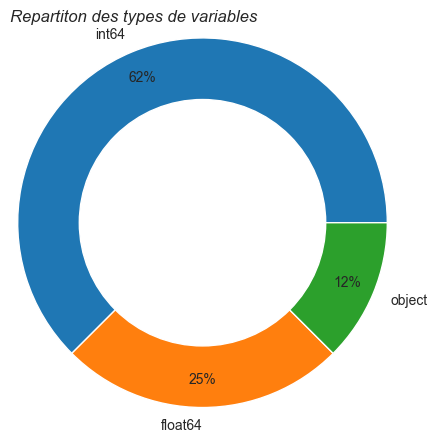

In [161]:
# Types des variables
fonctions_data.affichage_types_var(cash_balance, True, True, True)

In [162]:
# Résumé des variables qualitatives
fonctions_data.detail_type_var(cash_balance, type_var='cat')

NAME_CONTRACT_STATUS
type                 object
nb_nan                  0.0
%_nan                   0.0
count              10001358
unique                    9
top                  Active
freq                9151119

In [163]:
# Résumé des variables numériques
fonctions_data.detail_type_var(cash_balance, type_var='num')

SK_ID_PREV     SK_ID_CURR MONTHS_BALANCE CNT_INSTALMENT  \
type             int64          int64          int64        float64   
nb_nan             0.0            0.0            0.0        26071.0   
%_nan              0.0            0.0            0.0       0.260675   
count       10001358.0     10001358.0     10001358.0      9975287.0   
mean    1903216.598957  278403.863306     -35.012588       17.08965   
std      535846.530722   102763.74509       26.06657      11.995056   
min          1000001.0       100001.0          -96.0            1.0   
25%          1434405.0       189550.0          -54.0           10.0   
50%          1896565.0       278654.0          -28.0           12.0   
75%          2368963.0       367429.0          -13.0           24.0   
max          2843499.0       456255.0           -1.0           92.0   

       CNT_INSTALMENT_FUTURE      SK_DPD  SK_DPD_DEF  
type                 float64       int64       int64  
nb_nan               26087.0         0.0         0.0  
%_nan               0.260835         0.0         0.0  
count              9975271.0  10001358.0  10001358.0  
mean                10.48384   11.606928    0.654468  
std                11.109058  132.714043   32.762491  
min                      0.0         0.0         0.0  
25%                      3.0         0.0         0.0  
50%                      7.0         0.0         0.0  
75%                     14.0         0.0         0.0  
max                     85.0      4231.0      3595.0

Valeurs manquantes :52158 NaN pour 80010864 données (0.07 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



Nombres de valeurs manquantes  % de valeurs manquantes
CNT_INSTALMENT                                 26071                     0.26
CNT_INSTALMENT_FUTURE                          26087                     0.26

-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


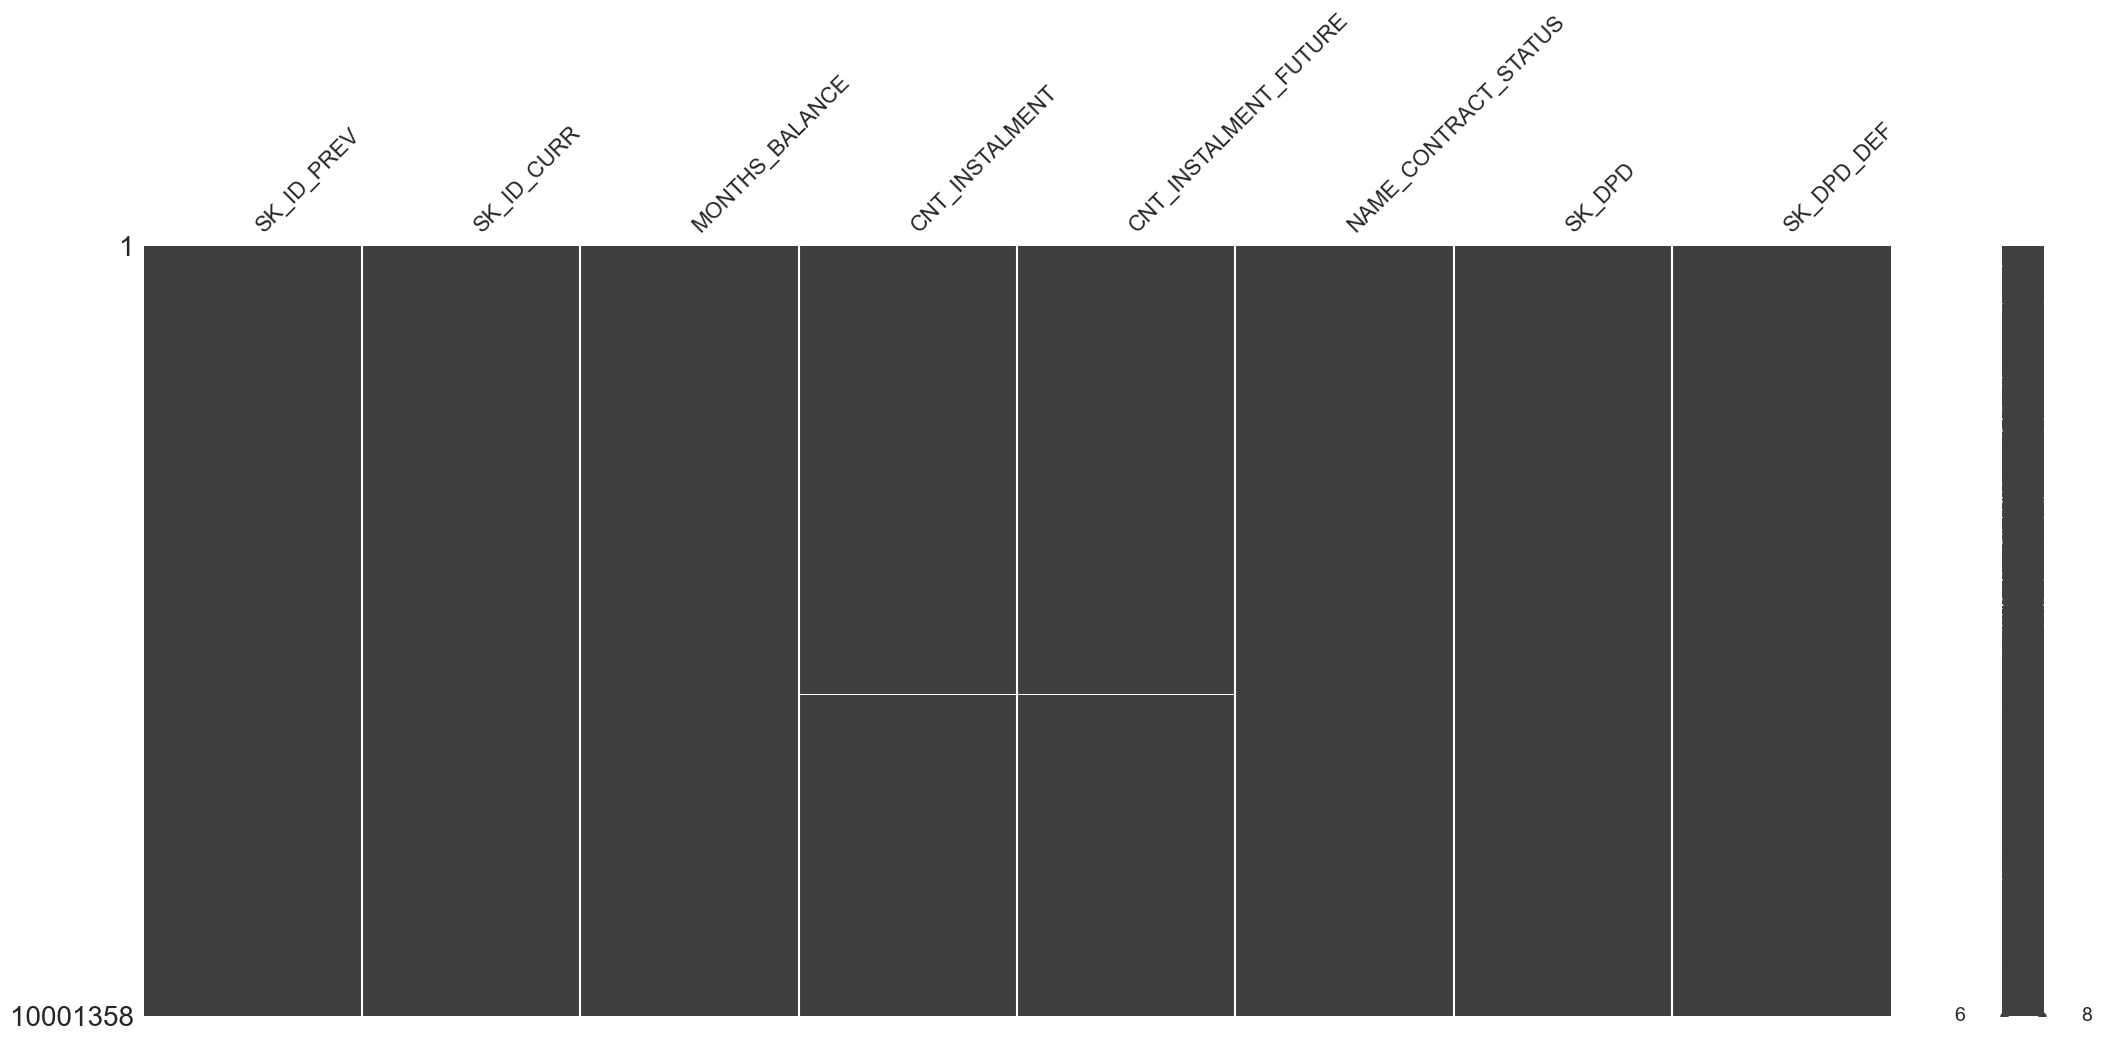

In [164]:
# Visualisation des données manquantes dans le dataset
fonctions_data.get_val_manq(cash_balance, True, True)

**Bilan** :
***
- Il y a seulement 2 variables qui contiennent des valeurs NaN des 8 variables de POS_CASH_balance.
- Ces variables sont le nombre de versements restants et la durée du prêt.
- Ces variables contiennent également une proportion très minime de valeurs NaN, c'est-à-dire seulement 0,26 %

**Préparation du dataframe**

In [165]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
var1 = 'Création dataframe de travail : merge TARGET '
print(var1 + 'avec dataframe POS_CASH_balance')
pos_cash_merged = application_train.iloc[:, :2].merge(cash_balance,
                                                      on='SK_ID_CURR',
                                                      how='left')
print("-"*79)

-------------------------------------------------------------------------------
Création dataframe de travail : merge TARGET avec dataframe POS_CASH_balance
-------------------------------------------------------------------------------


#### <span style='background:Moccasin'>2.5.2. Analyse univariée des colonnes</span>

<span style='background:violet'>**Analyse des données catégorielles**</span>

In [166]:
# Liste des variables qualitatives
cols_cat_posh = \
    pos_cash_merged.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_posh

['NAME_CONTRACT_STATUS']

<span style='background:mistyrose'>**Variable NAME_CONTRACT_STATUS**</span>

État du contrat au cours du mois.

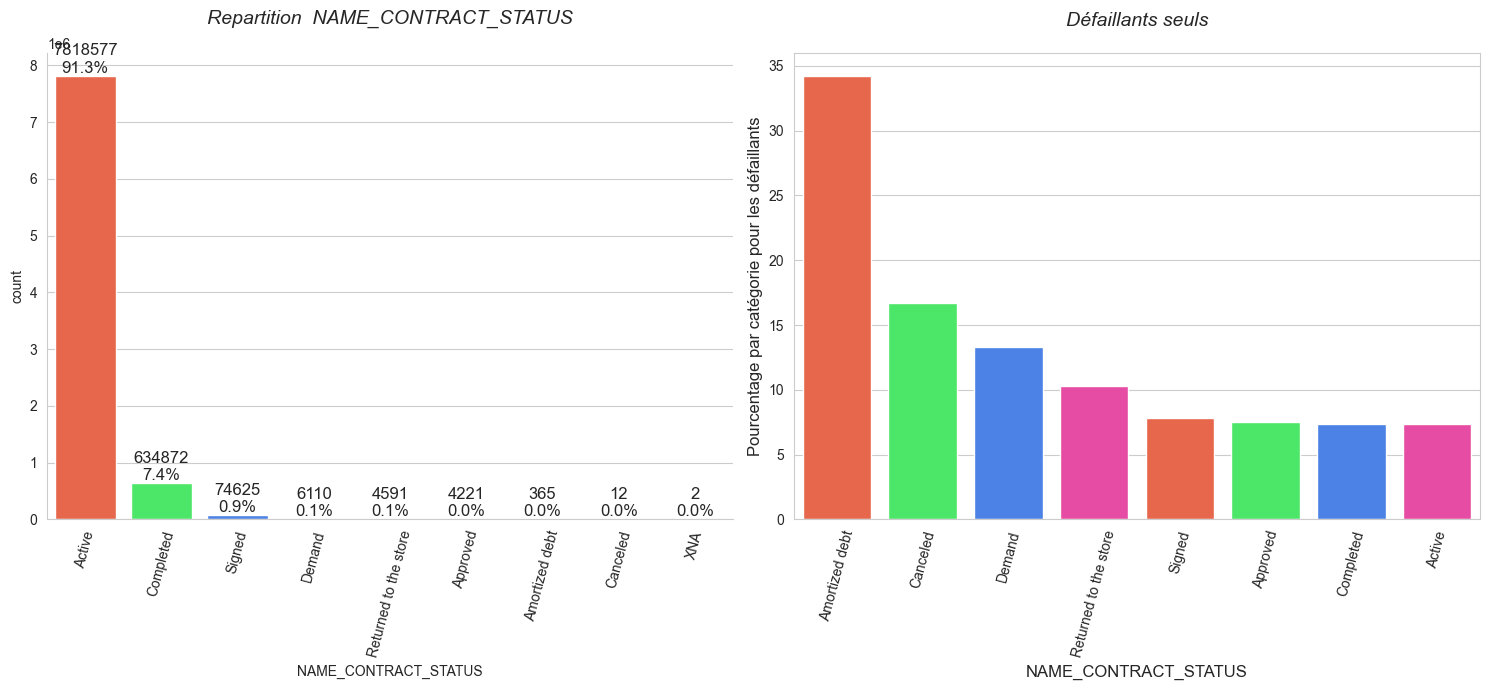

In [169]:
categ_var_bar(pos_cash_merged, 'NAME_CONTRACT_STATUS', custom_palette, "Repartition  NAME_CONTRACT_STATUS\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
- La majorité des états des contrats des prêts sont Actif ou Terminé.
- Les non-défaillants ont plus de prêts actifs que les défaillants.

<span style='background:violet'>**Analyse des variables quantitatives**</span>

In [170]:
# Liste des variables quantitatives
cols_num_posh = \
    pos_cash_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num_posh

['SK_ID_CURR',
 'TARGET',
 'SK_ID_PREV',
 'MONTHS_BALANCE',
 'CNT_INSTALMENT',
 'CNT_INSTALMENT_FUTURE',
 'SK_DPD',
 'SK_DPD_DEF']

<span style='background:mistyrose'>**Variable MONTHS_BALANCE**</span>

Mois du solde par rapport à la date d'application (-1 signifie la date de solde la plus récente).

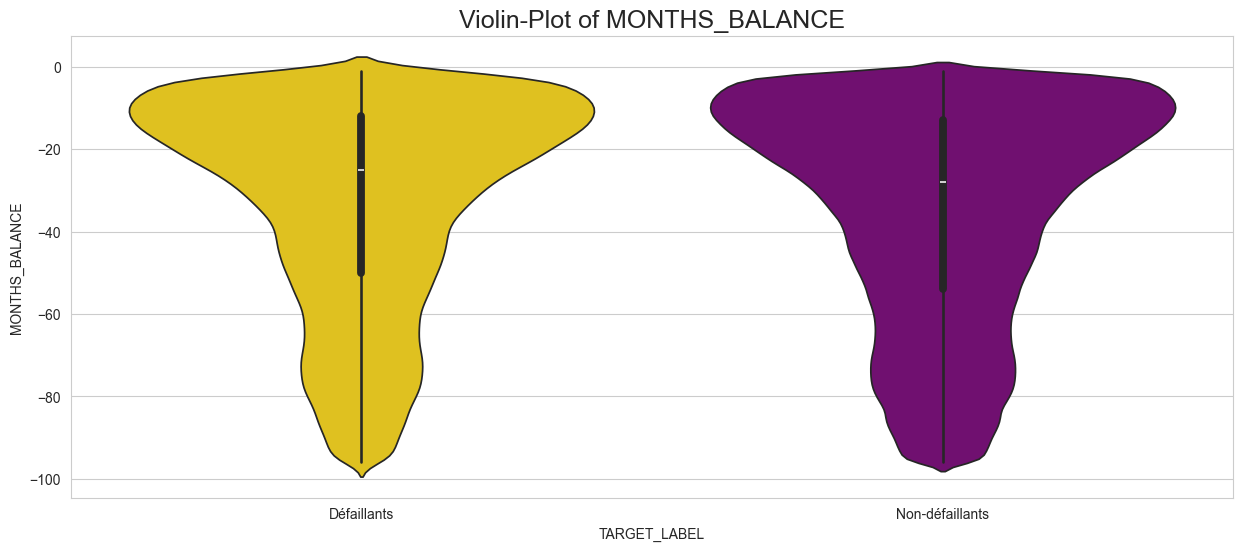

In [171]:
fonctions_data.plot_continuous_variables( pos_cash_merged, 'MONTHS_BALANCE', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable CNT_INSTALMENT**</span>

Durée du crédit précédent.

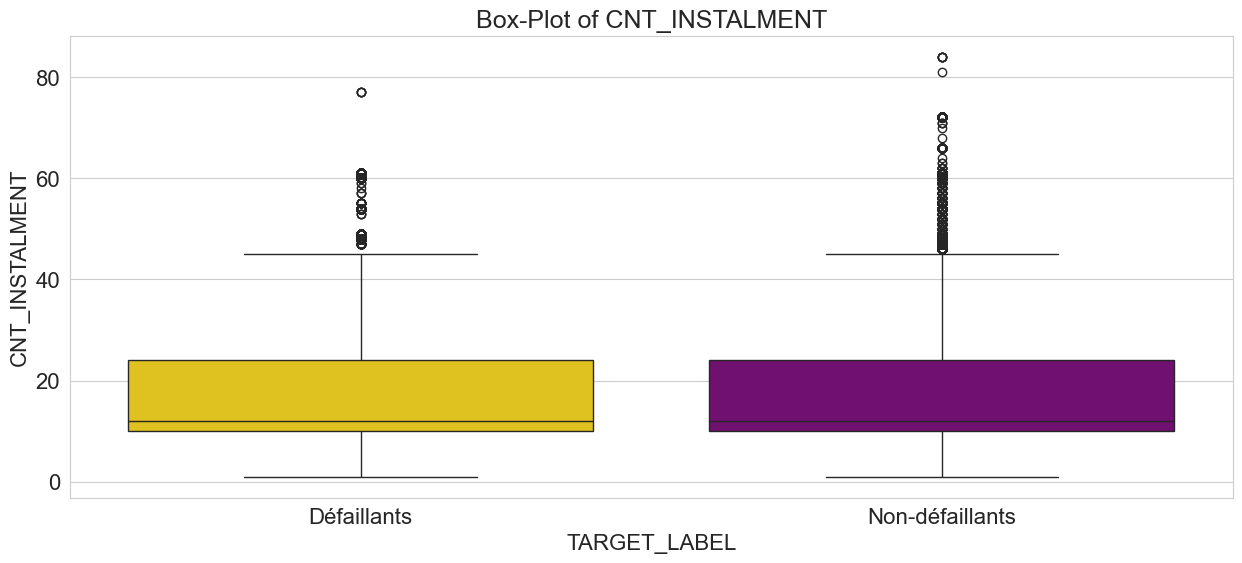

In [173]:
fonctions_data.plot_continuous_variables(pos_cash_merged, 'CNT_INSTALMENT', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable CNT_INSTALMENT_FUTURE**</span>

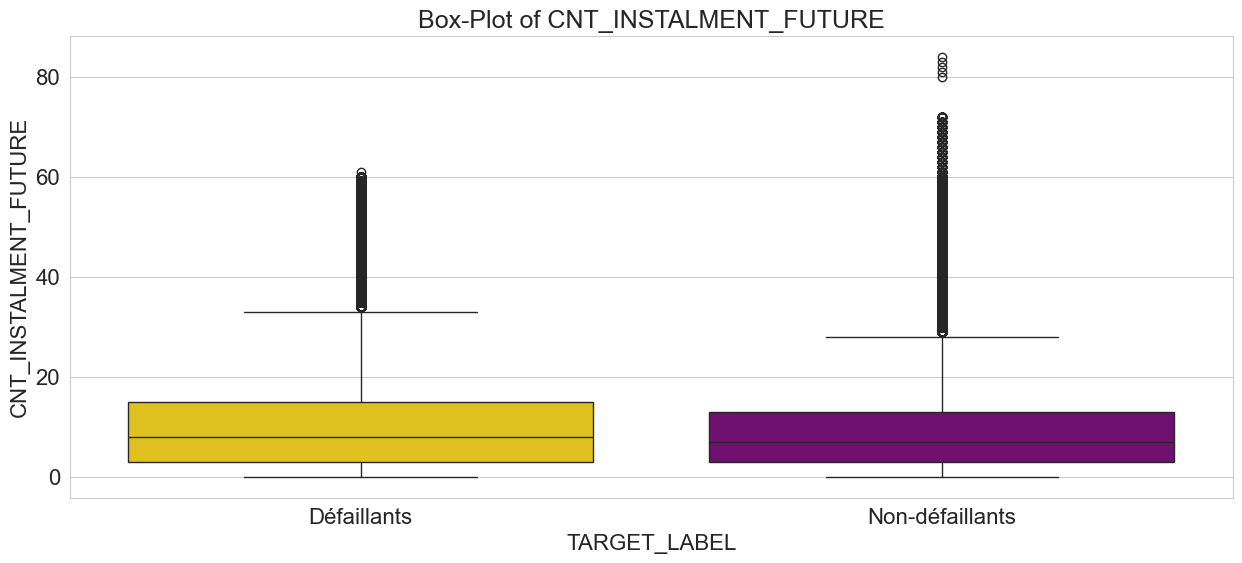

In [174]:
fonctions_data.plot_continuous_variables(pos_cash_merged, 'CNT_INSTALMENT_FUTURE', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- Les versements sont légèrement plus élevés pour les défaillants.

<span style='background:mistyrose'>**Variable SK_DPD**</span>

DPD (jours de retard) au cours du mois du crédit précédent.

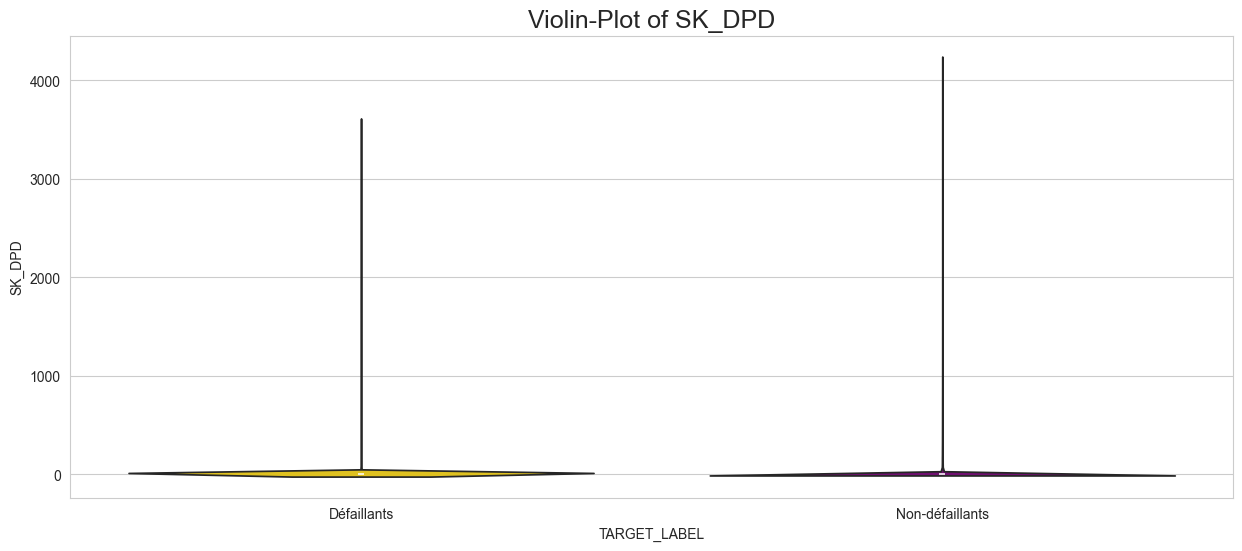

In [175]:
fonctions_data.plot_continuous_variables(pos_cash_merged, 'SK_DPD', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable SK_DPD_DEF**</span>

DPD au cours du mois avec tolérance.

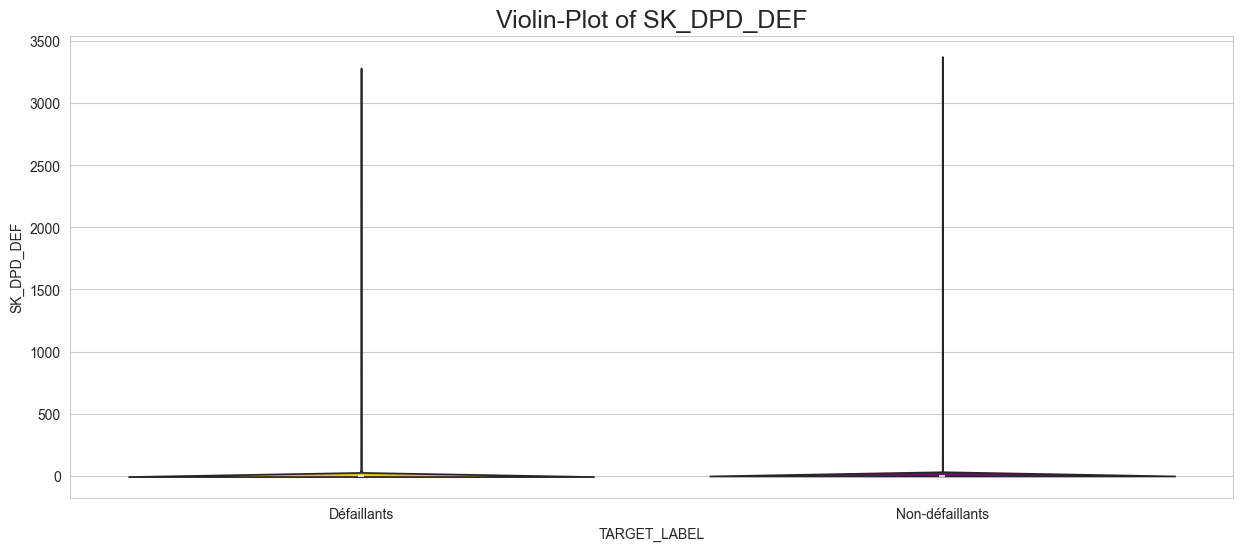

In [176]:
fonctions_data.plot_continuous_variables(pos_cash_merged, 'SK_DPD_DEF', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

#### <span style='background:Moccasin'>2.5.3. Analyse multivariée des colonnes</span>

<span style='background:mistyrose'>**Corrélation sur les variables numériques**</span>

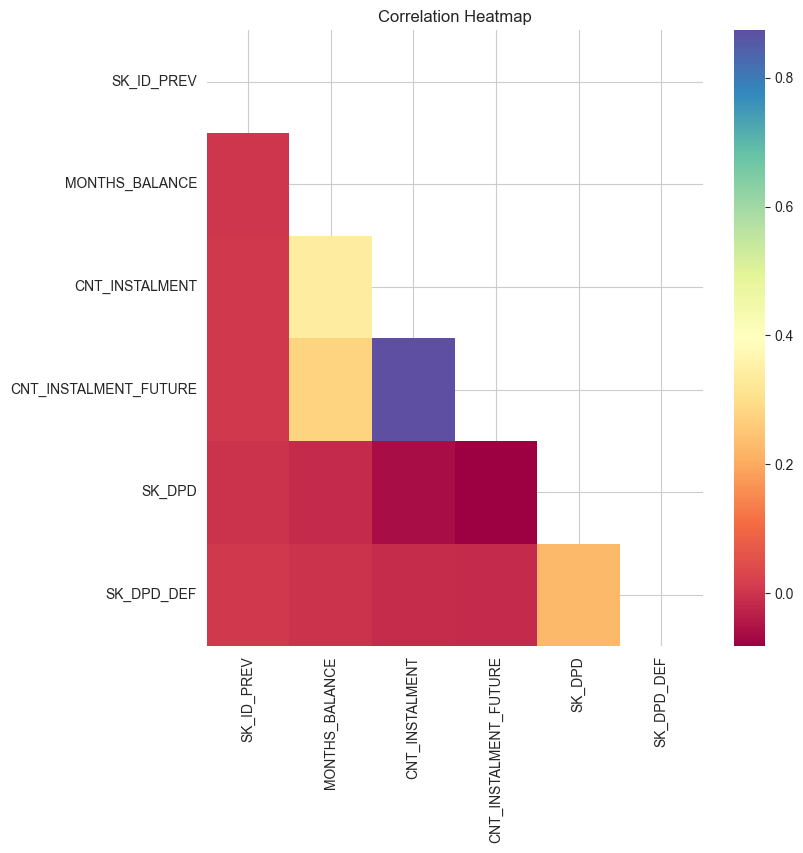

In [177]:
# Heatmap des variables numériques
categorical_columns = pos_cash_merged.select_dtypes(exclude=[np.number]).columns.to_list()

columns_to_drop = ['SK_ID_CURR'] + list(set(categorical_columns)
                                        - set(['TARGET']))

ext_data = pos_cash_merged.drop(columns_to_drop + ['TARGET'], axis=1)

plt.figure(figsize = (8, 8))
mask = np.triu(np.ones_like(ext_data.corr()))
    
# Heatmap of correlations
sns.heatmap(ext_data.corr(), mask = mask, cmap = plt.cm.Spectral)
plt.title('Correlation Heatmap');

**Bilan** :
***
- La carte thermique ci-dessus montre la corrélation entre les variables.
- A partir de la carte de chaleur de la matrice de corrélation, nous avons un ensemble de variables modérément corrélées, qui sont : 
    - CNT_INSTALMENT et CNT_INSTALMENT_FUTURE.
- La corrélation des variables avec la cible est très faible, ce qui montre l'absence d'une relation linéaire entre la variables et la variable cible.

### <span style='background:orange'>2.6 Fichier previous_application.csv</span>

#### <span style='background:Moccasin'>2.6.1. statistique des variables</span>

<span style='background:mistyrose'>**Compréhension des variables**</span>

In [178]:
df_var_prev = \
    homecredit_columns_description[homecredit_columns_description['Table']
                                   == 'previous_application.csv']
df_var_prev.style.hide_index()

<span style='background:mistyrose'>**Statistiques**</span>

-------------------------------------------------------------
Type de variable pour chacune des variables



SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

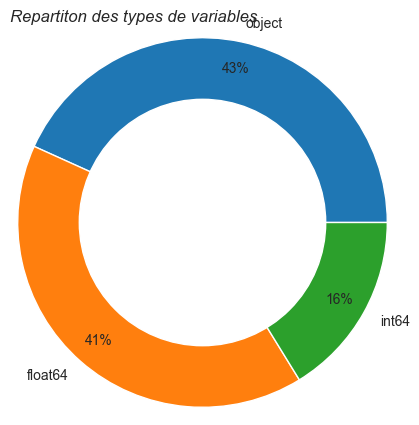

In [179]:
# Types des variables
fonctions_data.affichage_types_var(previous_application, True, True, True)

In [180]:
# Résumé des variables qualitatives
fonctions_data.detail_type_var(previous_application, type_var='cat')

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
type               object                     object   
nb_nan                0.0                        0.0   
%_nan                 0.0                        0.0   
count             1670214                    1670214   
unique                  4                          7   
top            Cash loans                    TUESDAY   
freq               747553                     255118   

       FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
type                        object                 object   
nb_nan                         0.0                    0.0   
%_nan                          0.0                    0.0   
count                      1670214                1670214   
unique                           2                     25   
top                              Y                    XAP   
freq                       1661739                 922661   

       NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
type                 object                 object             object   
nb_nan                  0.0                    0.0                0.0   
%_nan                   0.0                    0.0                0.0   
count               1670214                1670214            1670214   
unique                    4                      4                  9   
top                Approved  Cash through the bank                XAP   
freq                1036781                1033552            1353093   

       NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
type            object           object              object         object   
nb_nan        820405.0              0.0                 0.0            0.0   
%_nan        49.119754              0.0                 0.0            0.0   
count           849809          1670214             1670214        1670214   
unique               7                4                  28              5   
top      Unaccompanied         Repeater                 XNA            POS   
freq            508970          1231261              950809         691011   

       NAME_PRODUCT_TYPE             CHANNEL_TYPE NAME_SELLER_INDUSTRY  \
type              object                   object               object   
nb_nan               0.0                      0.0                  0.0   
%_nan                0.0                      0.0                  0.0   
count            1670214                  1670214              1670214   
unique                 3                        8                   11   
top                  XNA  Credit and cash offices                  XNA   
freq             1063666                   719968               855720   

       NAME_YIELD_GROUP PRODUCT_COMBINATION  
type             object              object  
nb_nan              0.0               346.0  
%_nan               0.0            0.020716  
count           1670214             1669868  
unique                5                  17  
top                 XNA                Cash  
freq             517215              285990

In [181]:
# Résumé des variables numériques
fonctions_data.detail_type_var(previous_application, type_var='num')

SK_ID_PREV     SK_ID_CURR   AMT_ANNUITY AMT_APPLICATION  \
type             int64          int64       float64         float64   
nb_nan             0.0            0.0      372235.0             0.0   
%_nan              0.0            0.0     22.286665             0.0   
count        1670214.0      1670214.0     1297979.0       1670214.0   
mean    1923089.135331  278357.174099  15955.120659    175233.86036   
std      532597.958696  102814.823849  14782.137335   292779.762386   
min          1000001.0       100001.0           0.0             0.0   
25%         1461857.25       189329.0       6321.78         18720.0   
50%          1923110.5       278714.5       11250.0         71046.0   
75%         2384279.75       367514.0      20658.42        180360.0   
max          2845382.0       456255.0    418058.145       6905160.0   

           AMT_CREDIT AMT_DOWN_PAYMENT AMT_GOODS_PRICE  \
type          float64          float64         float64   
nb_nan            1.0         895844.0        385515.0   
%_nan         0.00006         53.63648       23.081773   
count       1670213.0         774370.0       1284699.0   
mean    196114.021218      6697.402139   227847.279283   
std     318574.616547      20921.49541   315396.557937   
min               0.0             -0.9             0.0   
25%           24160.5              0.0         50841.0   
50%           80541.0           1638.0        112320.0   
75%          216418.5           7740.0        234000.0   
max         6905160.0        3060045.0       6905160.0   

       HOUR_APPR_PROCESS_START NFLAG_LAST_APPL_IN_DAY RATE_DOWN_PAYMENT  ...  \
type                     int64                  int64           float64  ...   
nb_nan                     0.0                    0.0          895844.0  ...   
%_nan                      0.0                    0.0          53.63648  ...   
count                1670214.0              1670214.0          774370.0  ...   
mean                 12.484182               0.996468          0.079637  ...   
std                   3.334028                0.05933          0.107823  ...   
min                        0.0                    0.0         -0.000015  ...   
25%                       10.0                    1.0               0.0  ...   
50%                       12.0                    1.0          0.051605  ...   
75%                       15.0                    1.0          0.108909  ...   
max                       23.0                    1.0               1.0  ...   

       RATE_INTEREST_PRIVILEGED DAYS_DECISION SELLERPLACE_AREA CNT_PAYMENT  \
type                    float64         int64            int64     float64   
nb_nan                1664263.0           0.0              0.0    372230.0   
%_nan                 99.643698           0.0              0.0   22.286366   
count                    5951.0     1670214.0        1670214.0   1297984.0   
mean                   0.773503   -880.679668       313.951115   16.054082   
std                    0.100879    779.099667      7127.443459   14.567288   
min                     0.37315       -2922.0             -1.0         0.0   
25%                    0.715645       -1300.0             -1.0         6.0   
50%                    0.835095        -581.0              3.0        12.0   
75%                    0.852537        -280.0             82.0        24.0   
max                         1.0          -1.0        4000000.0        84.0   

       DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  \
type              float64        float64                   float64   
nb_nan           673065.0       673065.0                  673065.0   
%_nan           40.298129      40.298129                 40.298129   
count            997149.0       997149.0                  997149.0   
mean        342209.855039   13826.269337              33767.774054   
std          88916.115833   72444.869708             106857.034789   
min               -2922.0        -2892.0                   -2801.0   
25% 

Valeurs manquantes :11109336 NaN pour 61797918 données (17.98 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



Nombres de valeurs manquantes  \
RATE_INTEREST_PRIMARY                            1664263   
RATE_INTEREST_PRIVILEGED                         1664263   
AMT_DOWN_PAYMENT                                  895844   
RATE_DOWN_PAYMENT                                 895844   
NAME_TYPE_SUITE                                   820405   
DAYS_FIRST_DRAWING                                673065   
DAYS_FIRST_DUE                                    673065   
DAYS_LAST_DUE_1ST_VERSION                         673065   
DAYS_LAST_DUE                                     673065   
DAYS_TERMINATION                                  673065   
NFLAG_INSURED_ON_APPROVAL                         673065   
AMT_GOODS_PRICE                                   385515   
AMT_ANNUITY                                       372235   
CNT_PAYMENT                                       372230   
PRODUCT_COMBINATION                                  346   
AMT_CREDIT                                             1   

                           % de valeurs manquantes  
RATE_INTEREST_PRIMARY                        99.64  
RATE_INTEREST_PRIVILEGED                     99.64  
AMT_DOWN_PAYMENT                             53.64  
RATE_DOWN_PAYMENT                            53.64  
NAME_TYPE_SUITE                              49.12  
DAYS_FIRST_DRAWING                           40.30  
DAYS_FIRST_DUE                               40.30  
DAYS_LAST_DUE_1ST_VERSION                    40.30  
DAYS_LAST_DUE                                40.30  
DAYS_TERMINATION                             40.30  
NFLAG_INSURED_ON_APPROVAL                    40.30  
AMT_GOODS_PRICE                              23.08  
AMT_ANNUITY                                  22.29  
CNT_PAYMENT                                  22.29  
PRODUCT_COMBINATION                           0.02  
AMT_CREDIT                                    0.00

-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


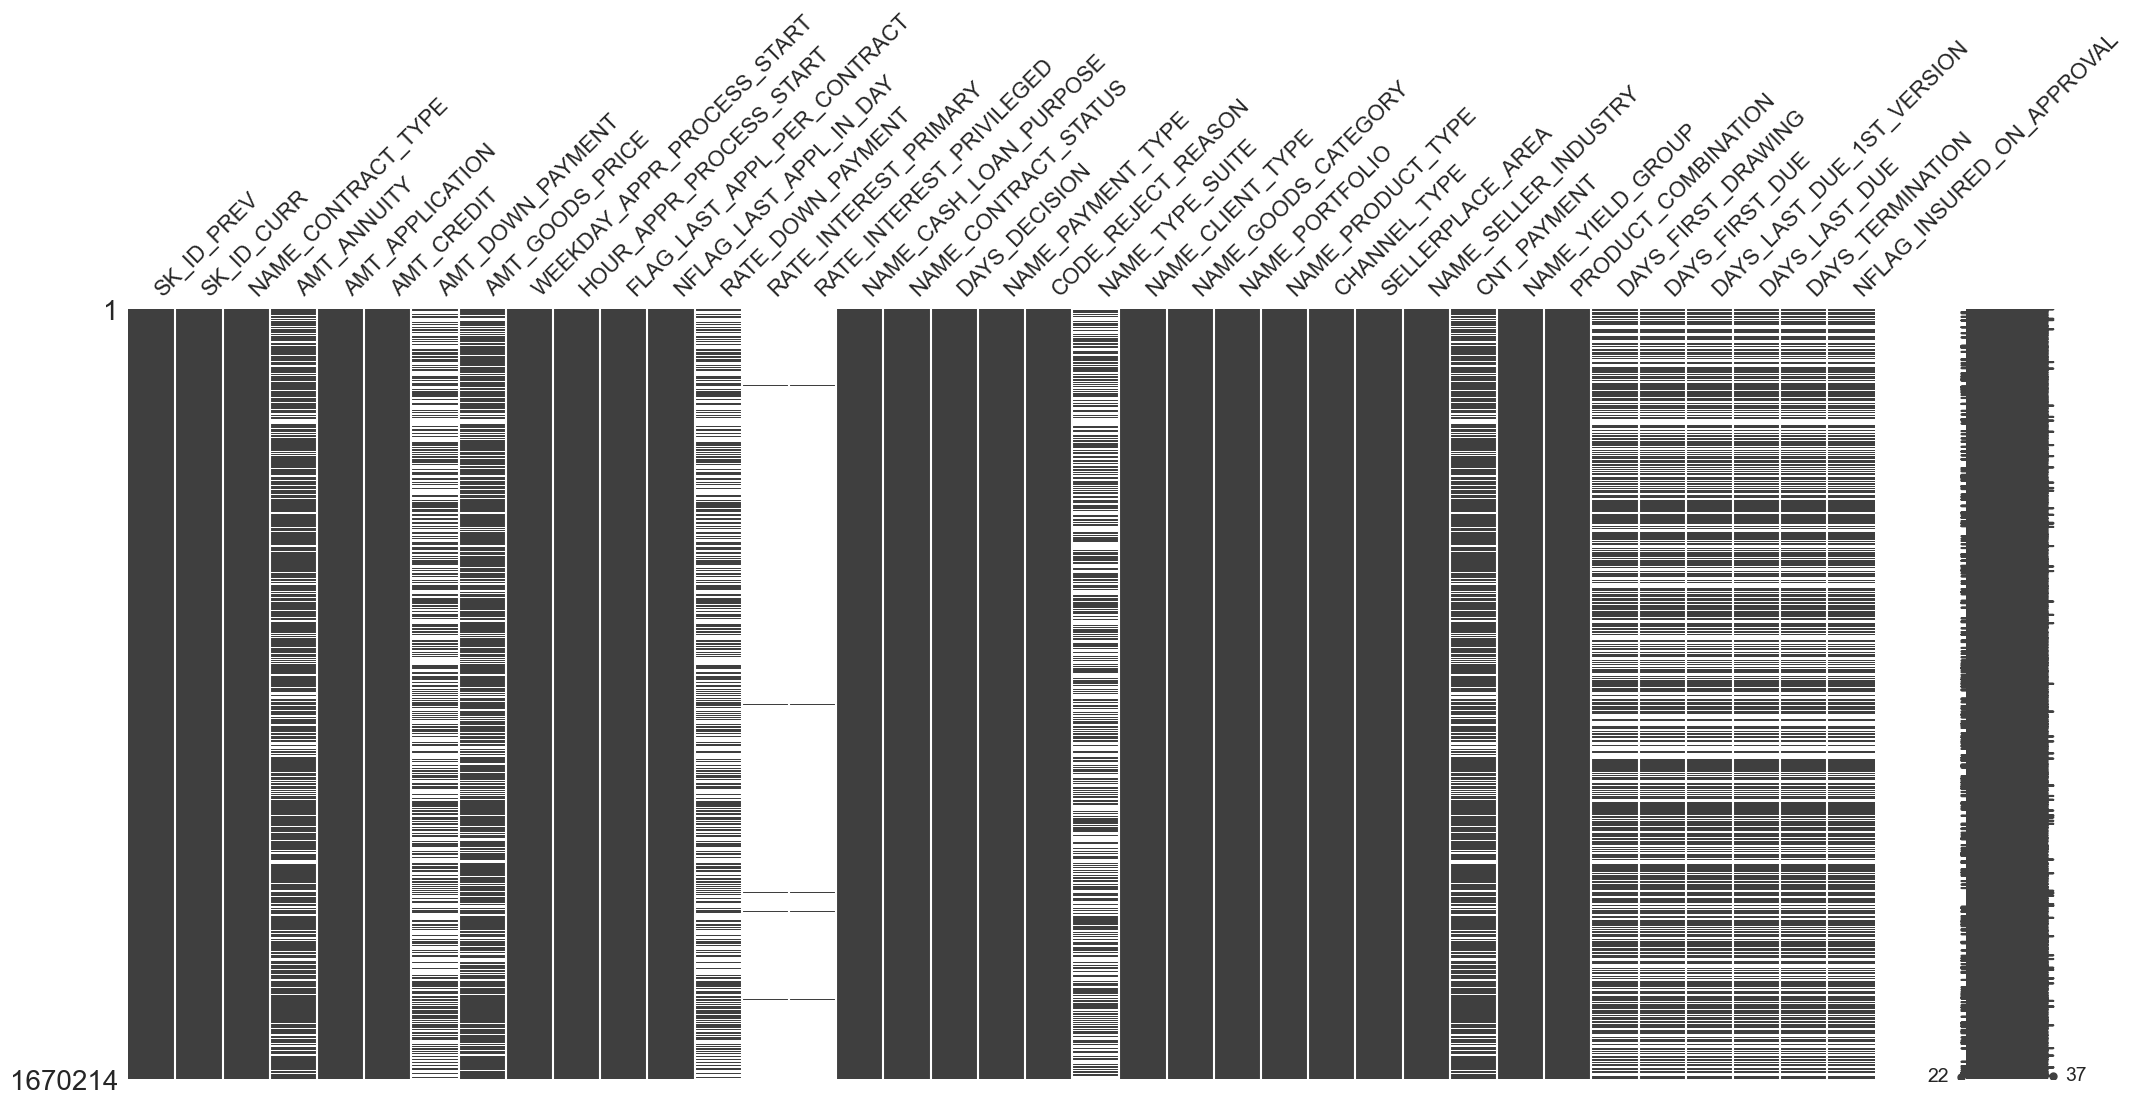

In [182]:
# Visualisation des données manquantes dans le dataset
fonctions_data.get_val_manq(previous_application, True, True)

**Bilan** :
***
- Il y a 16 variables sur les 37 variables qui contiennent des valeurs NaN.
- Deux de ces variables ont 99,64% de valeurs manquantes, ce qui est très élevé, et nous devrons trouver un moyen intelligent de gérer des valeurs NaN aussi élevées. 
- En dehors de ces deux variables, le reste des variables contient également > 40% de valeurs NaN, à l'exception de 5 variables.

**Préparation du dataframe**

In [183]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
var = 'Création dataframe de travail : merge TARGET '
print(var + 'avec dataframe previous_application')
prev_merged = application_train.iloc[:, :2].merge(previous_application,
                                                  on='SK_ID_CURR',
                                                  how='left')
print("-"*79)

-------------------------------------------------------------------------------
Création dataframe de travail : merge TARGET avec dataframe previous_application
-------------------------------------------------------------------------------


#### <span style='background:Moccasin'>2.6.2. Analyse univariée des colonnes</span>

<span style='background:violet'>**Analyse des données catégorielles**</span>

In [184]:
# Liste des variables qualitatives
cols_cat_prev = \
    prev_merged.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_prev

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

<span style='background:mistyrose'>**Variable NAME_CONTRACT_TYPE**</span>

Type de produit contractuel (prêt d'argent ou prêt à la consommation [POS]...) de la demande précédente.

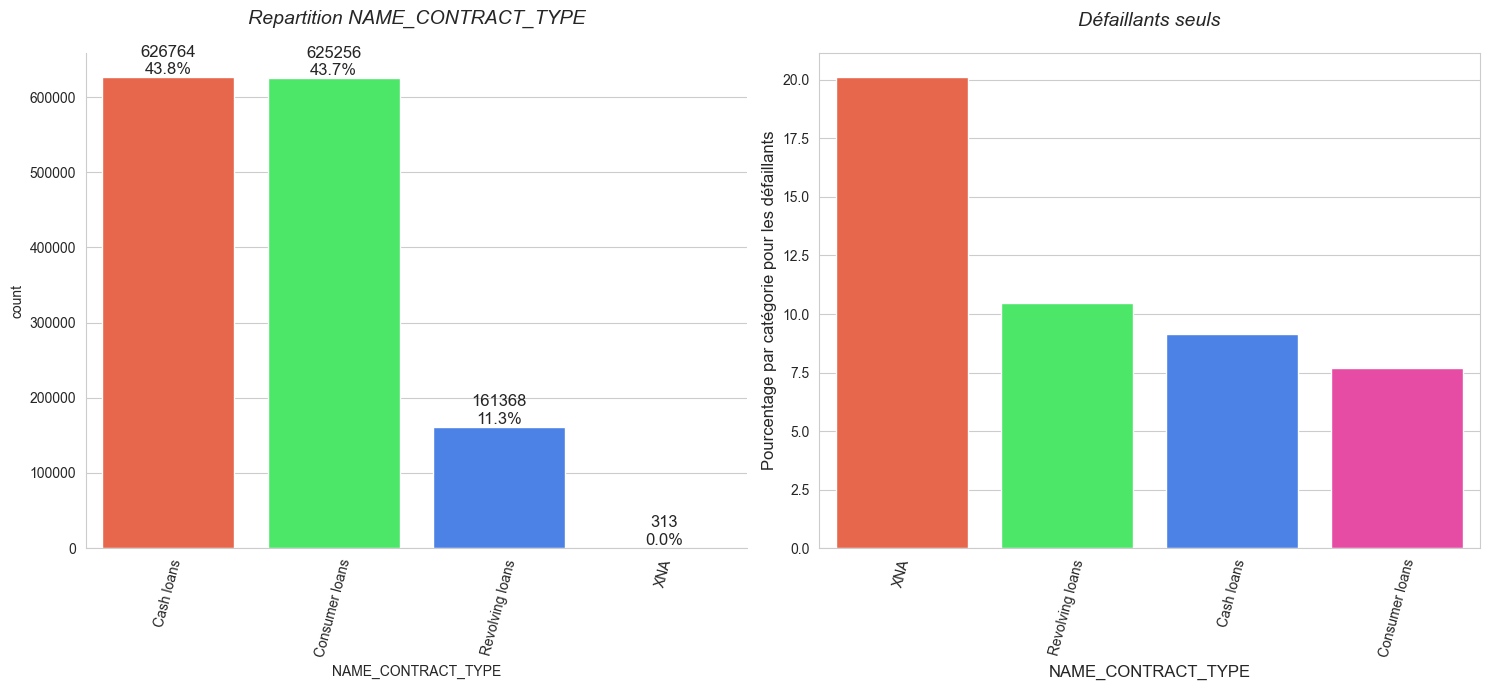

In [185]:
categ_var_bar(prev_merged, 'NAME_CONTRACT_TYPE', custom_palette, "Repartition NAME_CONTRACT_TYPE\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***

- D'après le premier sous-graphe, nous voyons que la plupart des prêts précédents ont été des prêts d'argent ou des prêts à la consommation, qui correspondent à environ 44% des prêts chacun. 
- Les 11,41% restants correspondent à des prêts revolving, et il y a quelques prêts nommés XNA dont les types ne sont en fait pas connus, mais ils sont très peu nombreux.
- En regardant le deuxième sous-graphe, nous voyons que le pourcentage de défaillants pour le type de prêt XNA est le plus élevé, avec un taux de défaillance de 20%.
- Le deuxième taux de défaut le plus élevé est celui des prêts revolving, qui est proche de 10,5 %.
- Les prêts d'argent ont des taux de défaillance moins élevés, environ 9%, tandis que les prêts à la consommation ont tendance à avoir le plus faible pourcentage de défaillants, qui est proche de 7,5%.

<span style='background:mistyrose'>**Variable  NAME_CONTRACT_STATUS**</span>

État du contrat (approuvé ou annulé ...) de la demande précédente

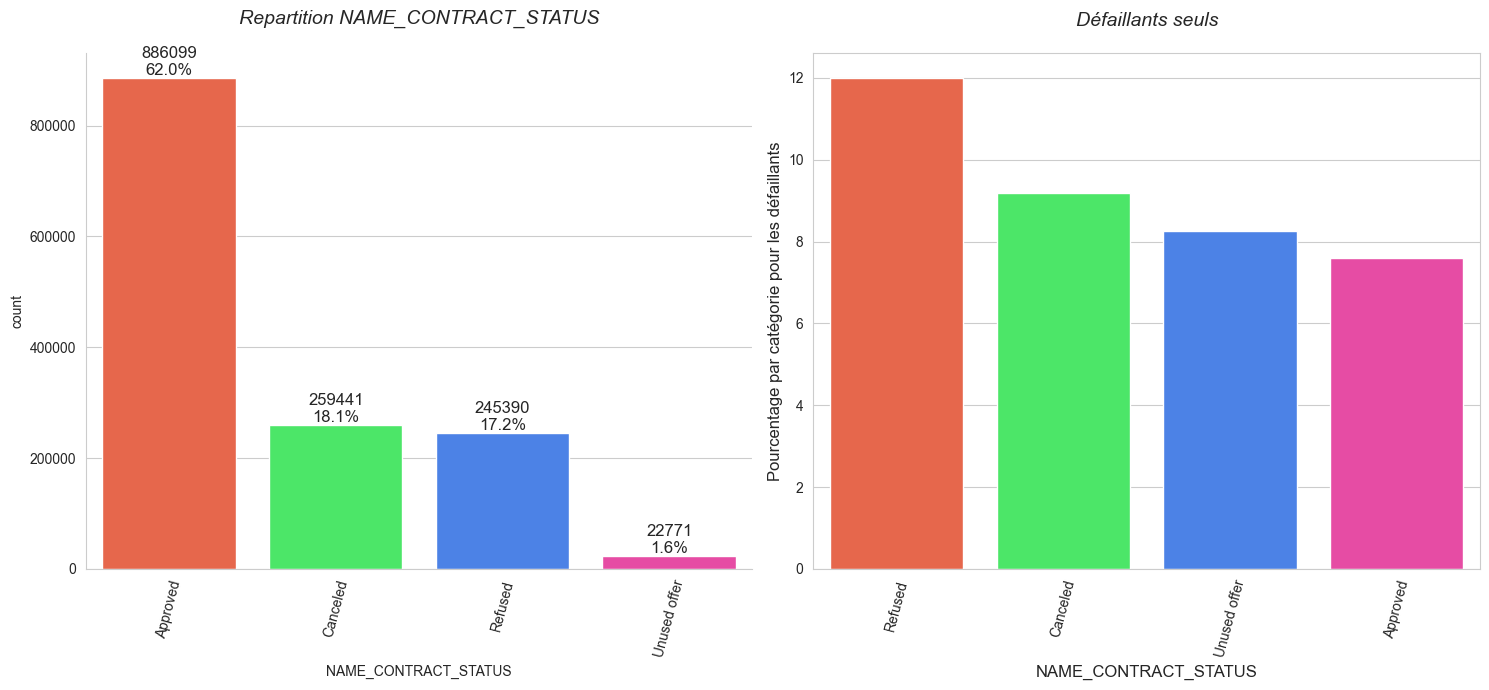

In [186]:
categ_var_bar(prev_merged, 'NAME_CONTRACT_STATUS', custom_palette, "Repartition NAME_CONTRACT_STATUS\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***

- Le type le plus courant de statut de contrat est le statut approuvé. Environ 63% des crédits précédents ont un statut approuvé. Les deux statuts les plus courants suivants sont Annulé et Refusé, qui correspondent tous deux à environ 18% des prêts, cela prouve que la majorité des prêts sont approuvés et que seule une partie d'entre eux ne le sont pas. 
- Les prêts qui avaient auparavant le statut Refusé ont tendance à être les plus défaillants dans les prêts actuels. Ils correspondent à environ 12% des défaillants de cette catégorie. Ils sont suivis par les prêts annulés qui correspondent à près de 9% du taux de défaillance. Ce comportement est assez attendu logiquement, puisque ces personnes ont dû être refusées parce qu'elles n'avaient pas le profil adéquat. Le taux de défaillance le plus faible est observé pour le statut de contrat Approuvé.

<span style='background:mistyrose'>**Variable CODE_REJECT_REASON**</span>

Raison éventuelle du rejet de la demande ?

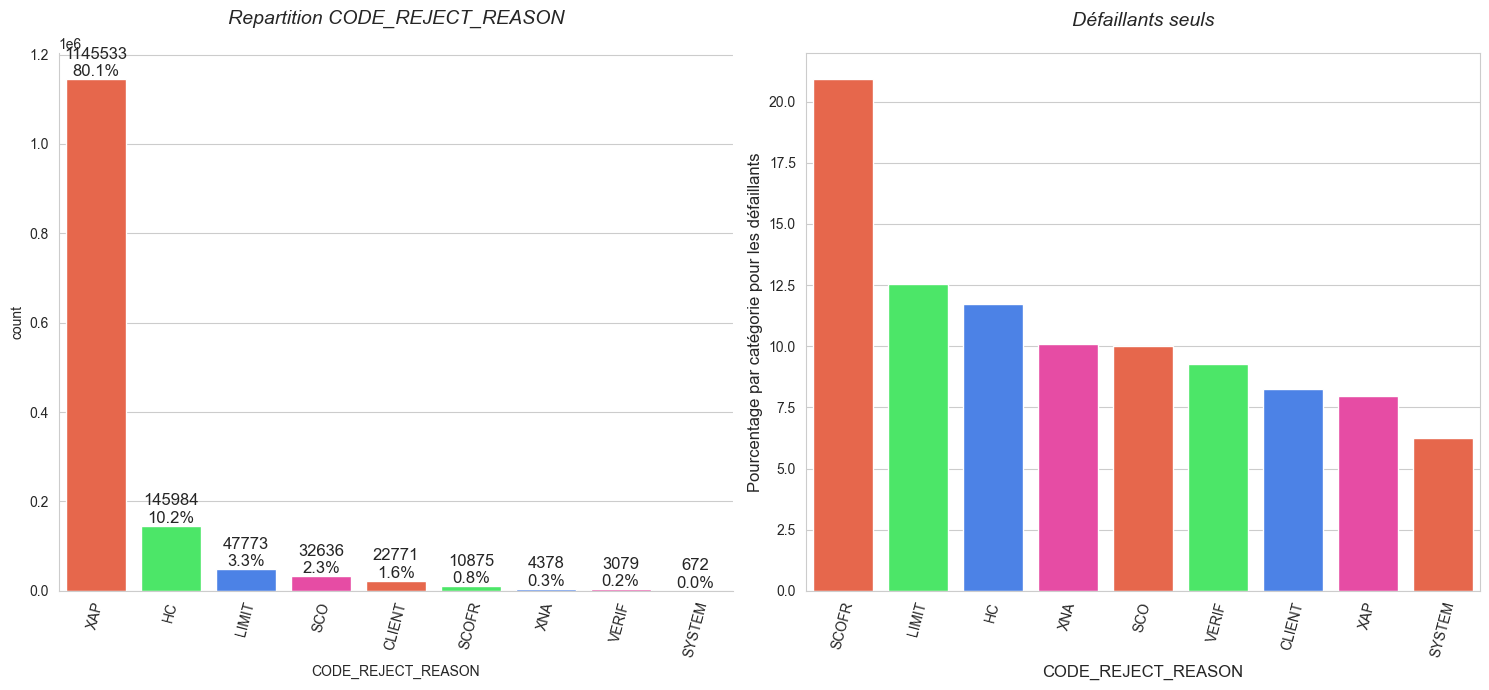

In [187]:
categ_var_bar(prev_merged, 'CODE_REJECT_REASON', custom_palette, "Repartition CODE_REJECT_REASON\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
- La raison du rejet le plus courant est le XAP avec ~80 %, les autres raisons du rejet sont minoraitaires avec ~ 10 % pour le HC.
- Les demandeurs dont les demandes précédentes ont été rejetées par le code SCOFT ont le pourcentage le plus élevé de défaillants parmi eux (~21%). Ils sont suivis par LIMIT et HC, qui comptent respectivement 12,5 % et 12 % de défaillants.
- Le motif de rejet le plus courant, XAP, ne correspond qu'à 7,5 % des défaillants, et représente le deuxième plus faible pourcentage de défaillants après le code SYSTEM. 

<span style='background:mistyrose'>**Variable CHANNEL_TYPE**</span>

Canal par lequel le demander a été acquis pour le prêt précédent dans Home Credit.

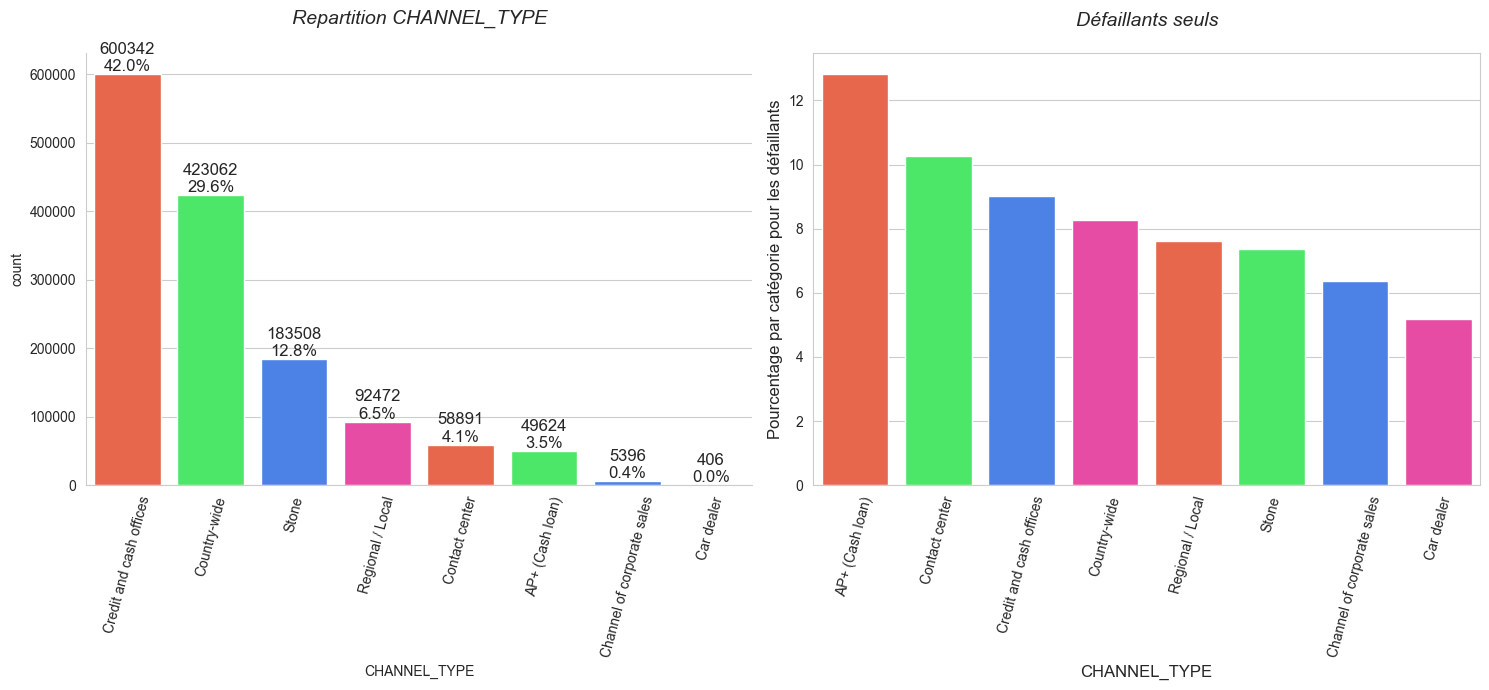

In [188]:
categ_var_bar(prev_merged, 'CHANNEL_TYPE', custom_palette, "Repartition CHANNEL_TYPE\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
- Les demandes acquises par le biais des bureaux de crédit et de caisse, soit environ 42,47% des demandes, suivies par le canal national qui correspond à 29,93% des demandes.
- Le pourcentage de défaillance le plus élevé a été observé parmi les demandes pour lesquelles le type de canal était AP+ (prêt en espèces), ce qui correspondait à environ 13% de défaillants dans cette catégorie.

<span style='background:mistyrose'>**Variable PRODUCT_COMBINATION**</span>

Combinaison détaillée des produits de la demande précédente.

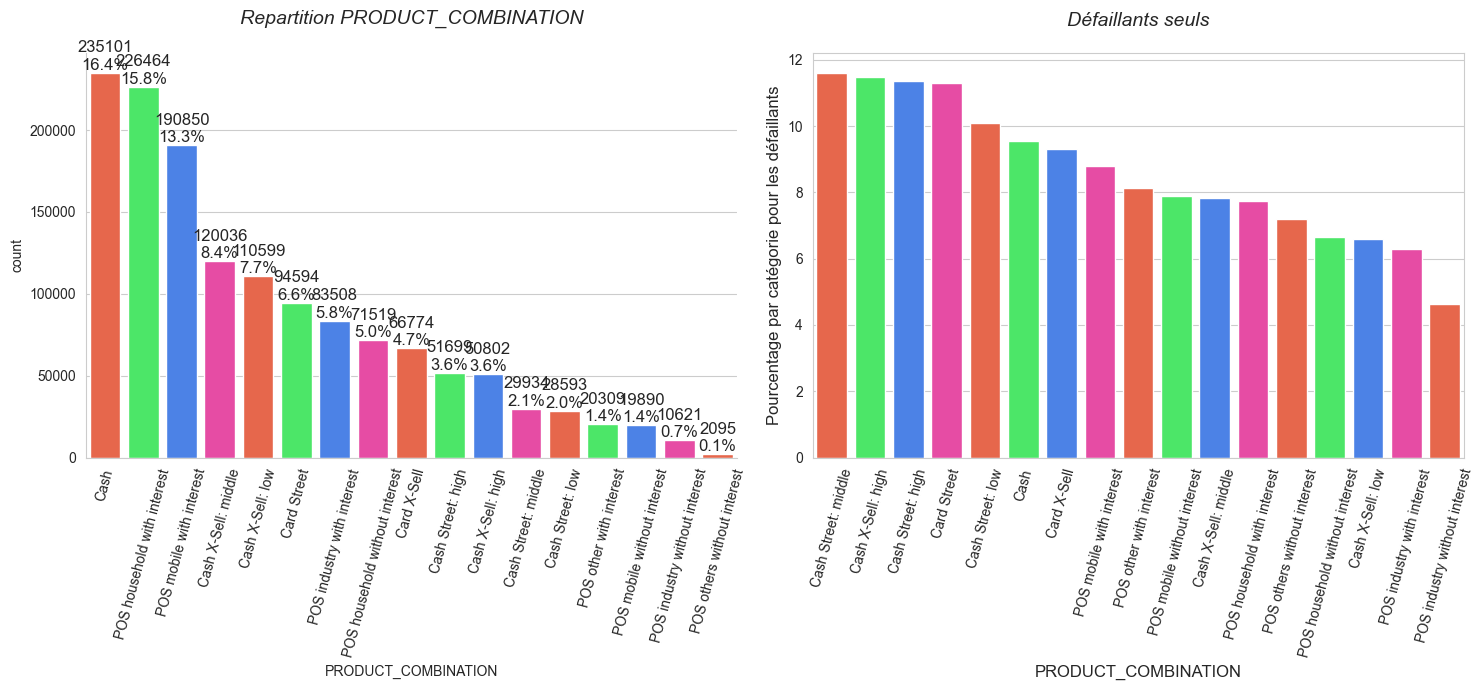

In [189]:
categ_var_bar(prev_merged, 'PRODUCT_COMBINATION', custom_palette, "Repartition PRODUCT_COMBINATION\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
- Les combinaisons de produits les plus courants sont l'argent liquide, les points de vente domestiques avec intérêt et les points de vente mobiles avec intérêt. Ils correspondent à environ 50% de tous les produits.
-  La défaillance est la plus élevée chez Cash Street : catégorie mobile, Cash X-sell : élevé, Cash Street : élevé et Card Street qui sont tous proches de 11-11,5% de défaillants par catégorie. Le pourcentage le plus faible de défaillants se trouve dans la catégorie POS Industry without interest, qui correspond à environ 4,5% de défaillants.

<span style='background:mistyrose'>**Variable  WEEKDAY_APPR_PROCESS_START**</span>

Jour de la semaine le demandeur a-t-il demandé le prêt 

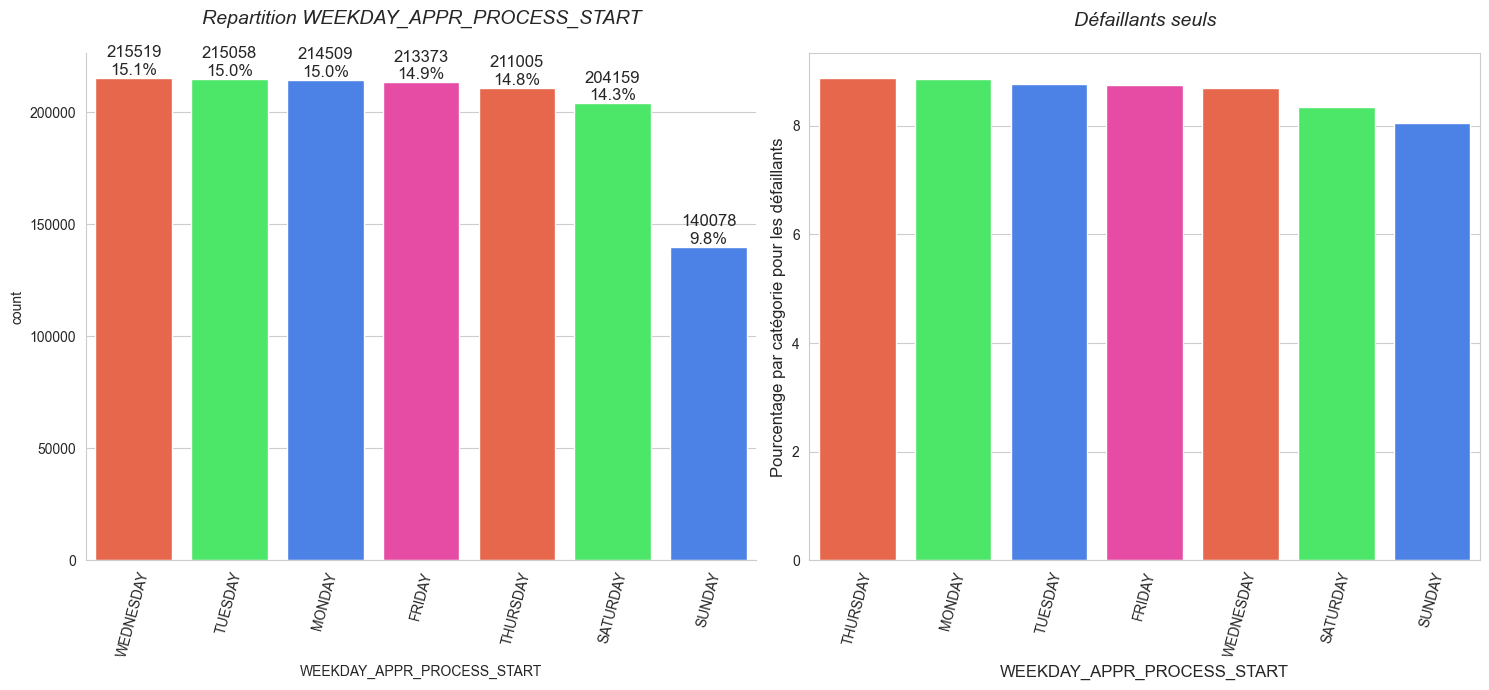

In [190]:
categ_var_bar(prev_merged, 'WEEKDAY_APPR_PROCESS_START', custom_palette, "Repartition WEEKDAY_APPR_PROCESS_START\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
- Plutôt en semaine qu'en week-end, indifféremment des jours que ce soit pour les défaillants ou les non-défaillants.

<span style='background:mistyrose'>**Variable FLAG_LAST_APPL_PER_CONTRACT**</span>

- Indicateur si c'était la dernière demande pour le contrat précédent :
    - **Y** : OUI,
    - **N** : NON.
- Parfois par erreur du demandeur ou de notre greffier il peut y avoir plusieurs demandes pour un seul contrat.at.

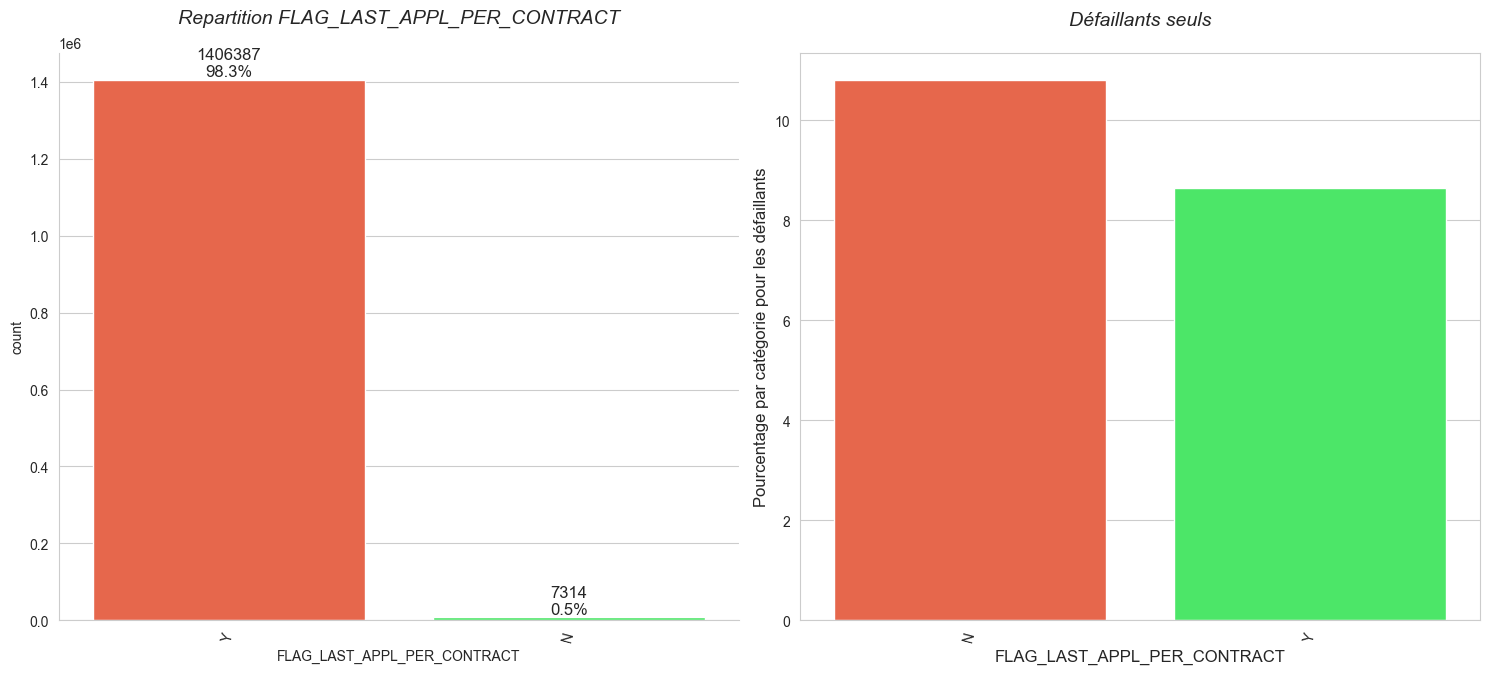

In [191]:
categ_var_bar(prev_merged, 'FLAG_LAST_APPL_PER_CONTRACT', custom_palette, "Repartition FLAG_LAST_APPL_PER_CONTRACT\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
- La dernière demande pour le dernier contrat est de 99,5%, mais pour plus de 10% des défaillants, ce n'était pas la dernière demande.

<span style='background:mistyrose'>**Variable NAME_CASH_LOAN_PURPOSE**</span>

Objectif du prêt d'argent.

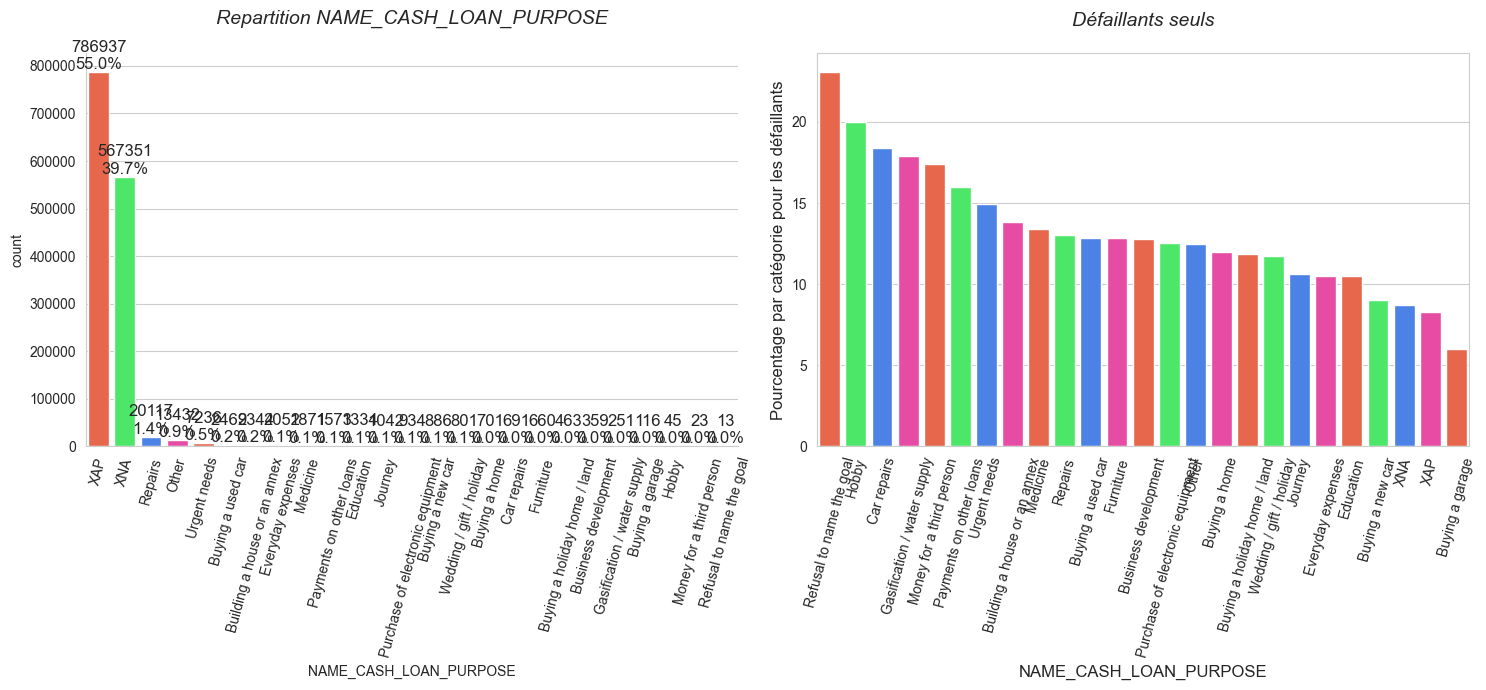

In [192]:
categ_var_bar(prev_merged, 'NAME_CASH_LOAN_PURPOSE', custom_palette, "Repartition NAME_CASH_LOAN_PURPOSE\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
- Les catégories des défaillants ne sont pas celles de l'ensemble catégories : XAP et XNA.

<span style='background:mistyrose'>**Variable NAME_PAYMENT_TYPE**</span>

Mode de paiement que le demandeur a choisi pour payer la demande précédente.

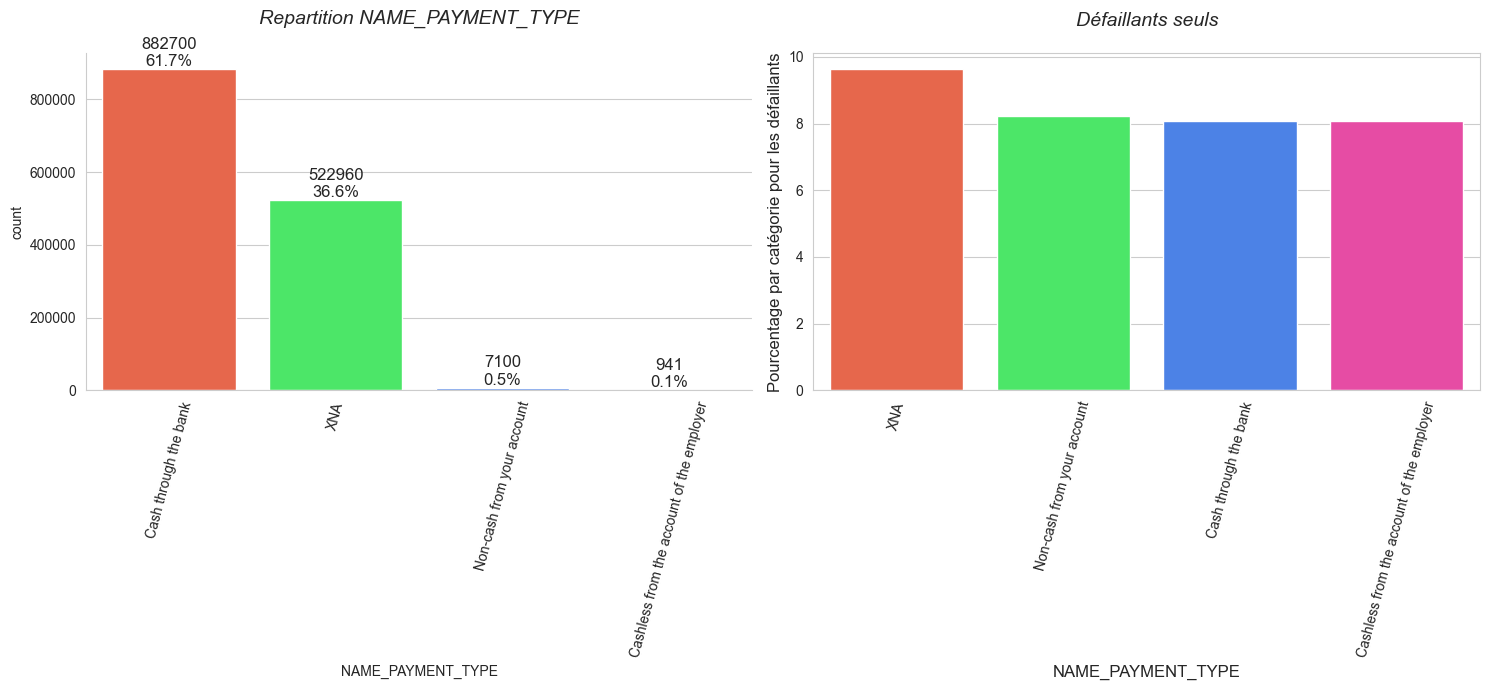

In [193]:
categ_var_bar(prev_merged, 'NAME_PAYMENT_TYPE', custom_palette, "Repartition NAME_PAYMENT_TYPE\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
- Les défaillants ont des catégories différentes de celles de toutes les catégories 'Cash through the bank'.

<span style='background:mistyrose'>**Variable NAME_TYPE_SUITE**</span>

Eventuelle personne qui a accompagné le demandeur lors de la demande précédente.

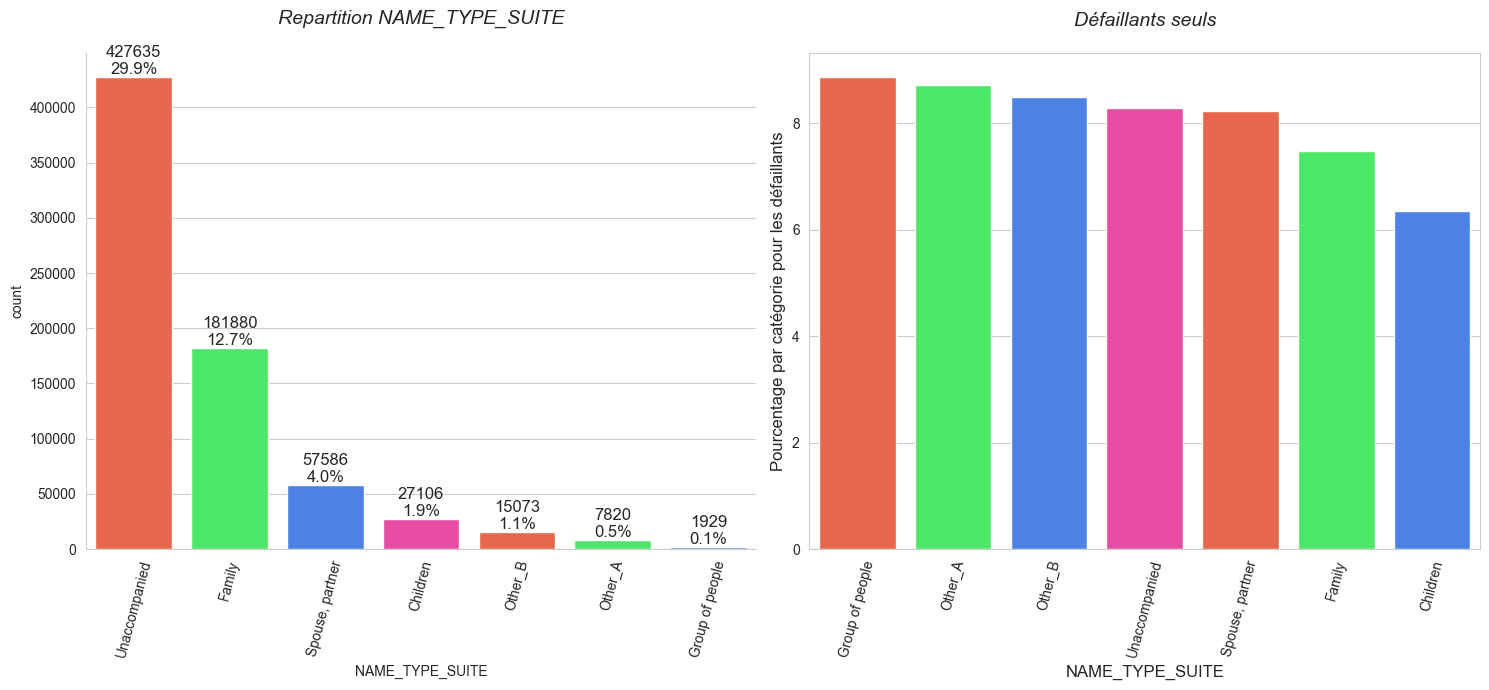

In [194]:
categ_var_bar(prev_merged, 'NAME_TYPE_SUITE', custom_palette, "Repartition NAME_TYPE_SUITE\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***

- Les défaillants sont accompagnés (groupe de personne, Other_A et Other_B...) lors de leur demande de prêt alors que les non-défaillants ne sont pas accompagnés.

<span style='background:mistyrose'>**Variable  NAME_CLIENT_TYPE**</span>

Le demandeur était-il un ancien ou un nouveau demandeur lors de la demande précédente.

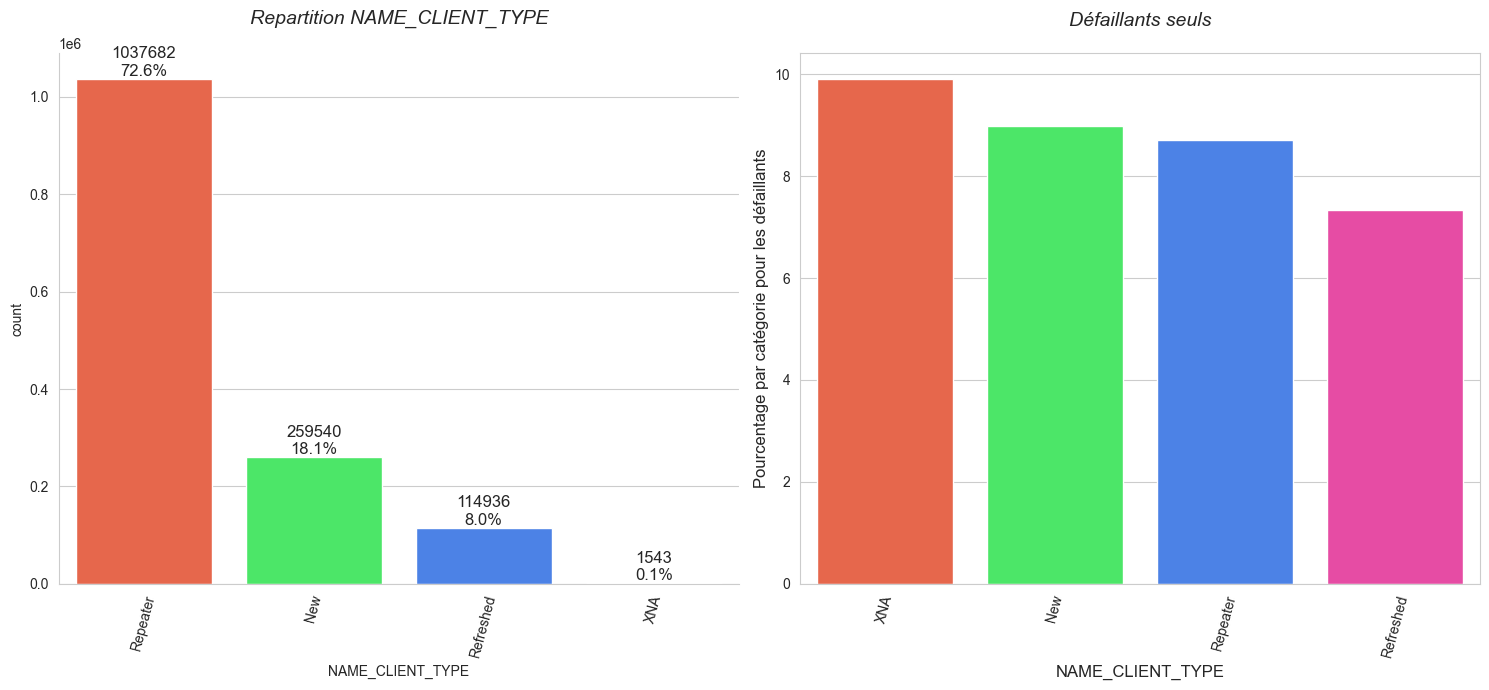

In [195]:
categ_var_bar(prev_merged, 'NAME_CLIENT_TYPE', custom_palette, "Repartition NAME_CLIENT_TYPE\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
- La majorité des demandeurs non-défaillants ont déjà effectué un prêt mais pour les non-défaillants.

<span style='background:mistyrose'>**Variable NAME_GOODS_CATEGORY**</span>

Quel type de marchandises le demandeur a-t-il demandé dans la demande précédente ?

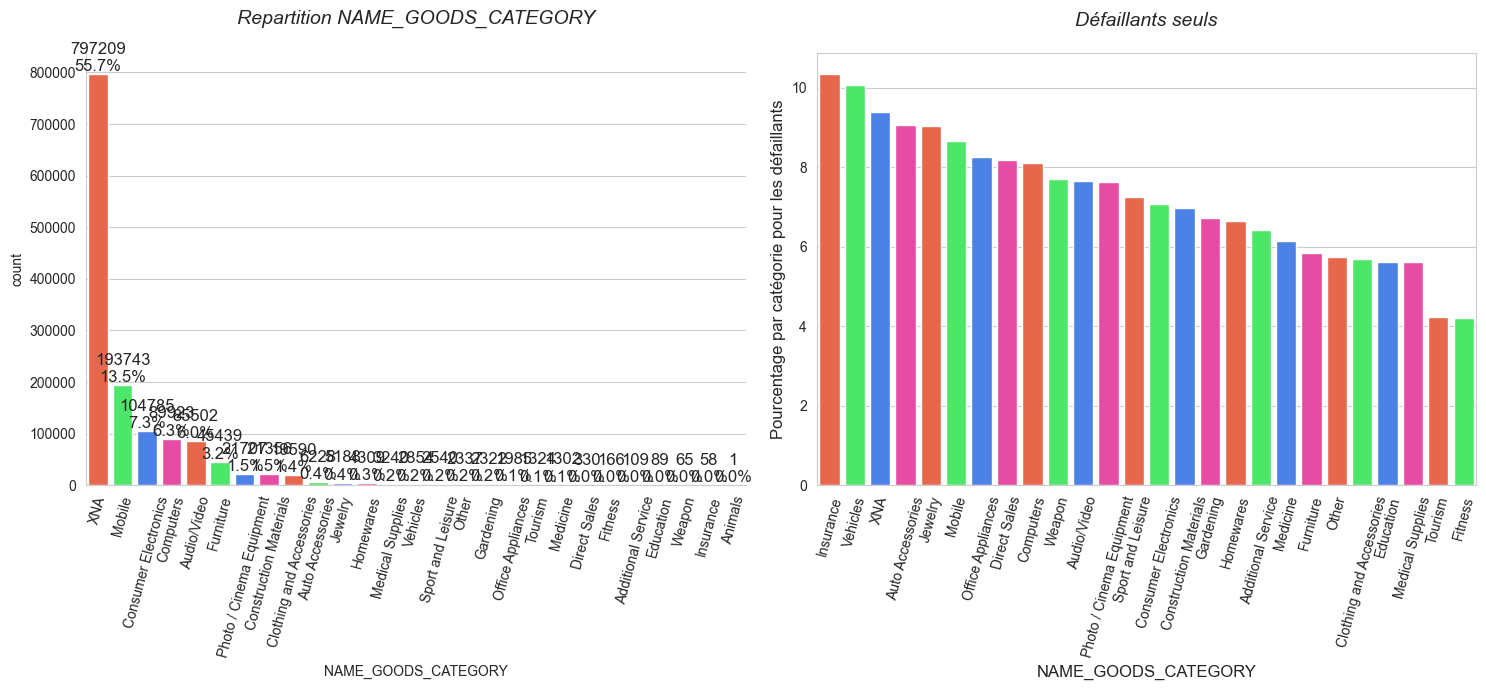

In [196]:
categ_var_bar(prev_merged, 'NAME_GOODS_CATEGORY', custom_palette, "Repartition NAME_GOODS_CATEGORY\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
- les équipements achetés sont plutôt de haute technologie alors que les défaillants ont des préoccupations plus terre à terre que loisirs.

<span style='background:mistyrose'>**Variable NAME_PORTFOLIO**</span>

Nom du portefeuille.

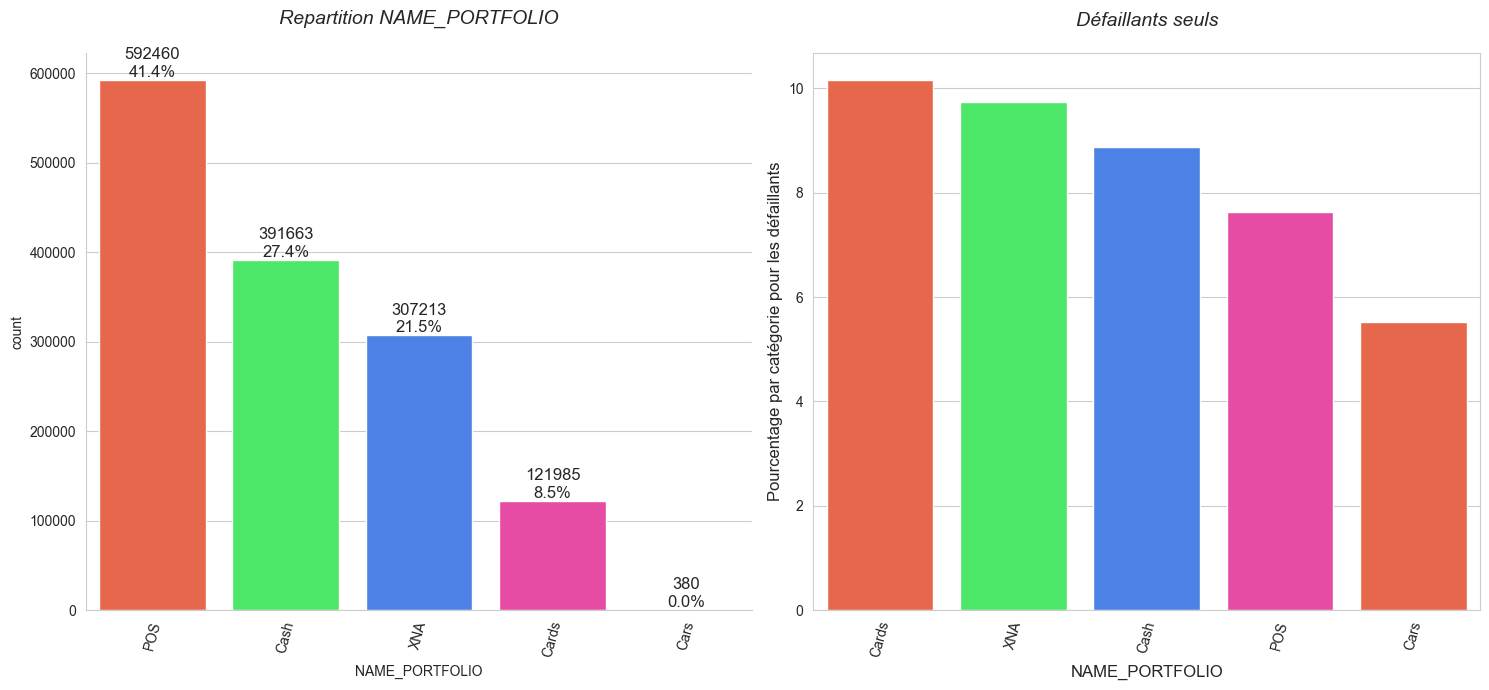

In [197]:
categ_var_bar(prev_merged, 'NAME_PORTFOLIO', custom_palette, "Repartition NAME_PORTFOLIO\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
- La majorité était POSH (42%) mais pour les défaillants l'application est Cards.

<span style='background:mistyrose'>**Variable NAME_PRODUCT_TYPE**</span>

L'application précédente était-elle x-sell o walk-in ?

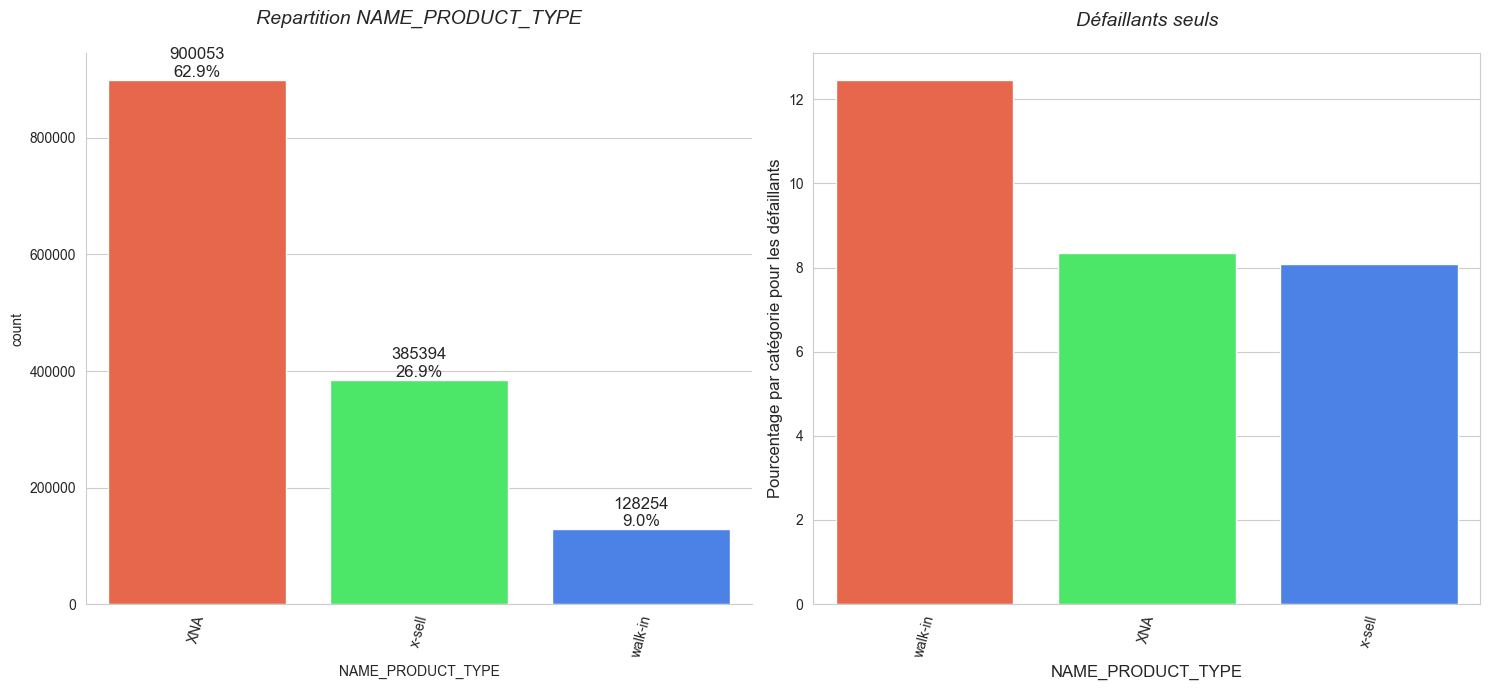

In [198]:
categ_var_bar(prev_merged, 'NAME_PRODUCT_TYPE', custom_palette, "Repartition NAME_PRODUCT_TYPE\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***
- Parmi les personnes qui ont répondu, l'ordre du type d'application précédente est inversée entre les défaillants (walk-in puis x-sell) et les non-défaillants (x-sell puis walk-in).

<span style='background:mistyrose'>**Variable NAME_SELLER_INDUSTRY**</span>

Secteur d'activité du vendeur.

categ_var_bar(prev_merged, 'NAME_SELLER_INDUSTRY', custom_palette, "Repartition NAME_SELLER_INDUSTRY\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
***

- Le secteur autour de la technologie automobile représente la majorité pour les défaillants (~ 10 %), celui du tourisme est le moins répandu (~ 4 %).

<span style='background:mistyrose'>**Variable NAME_YIELD_GROUP**</span>

Taux d'intérêt groupé en petit moyen et élevé de la demande précédente.

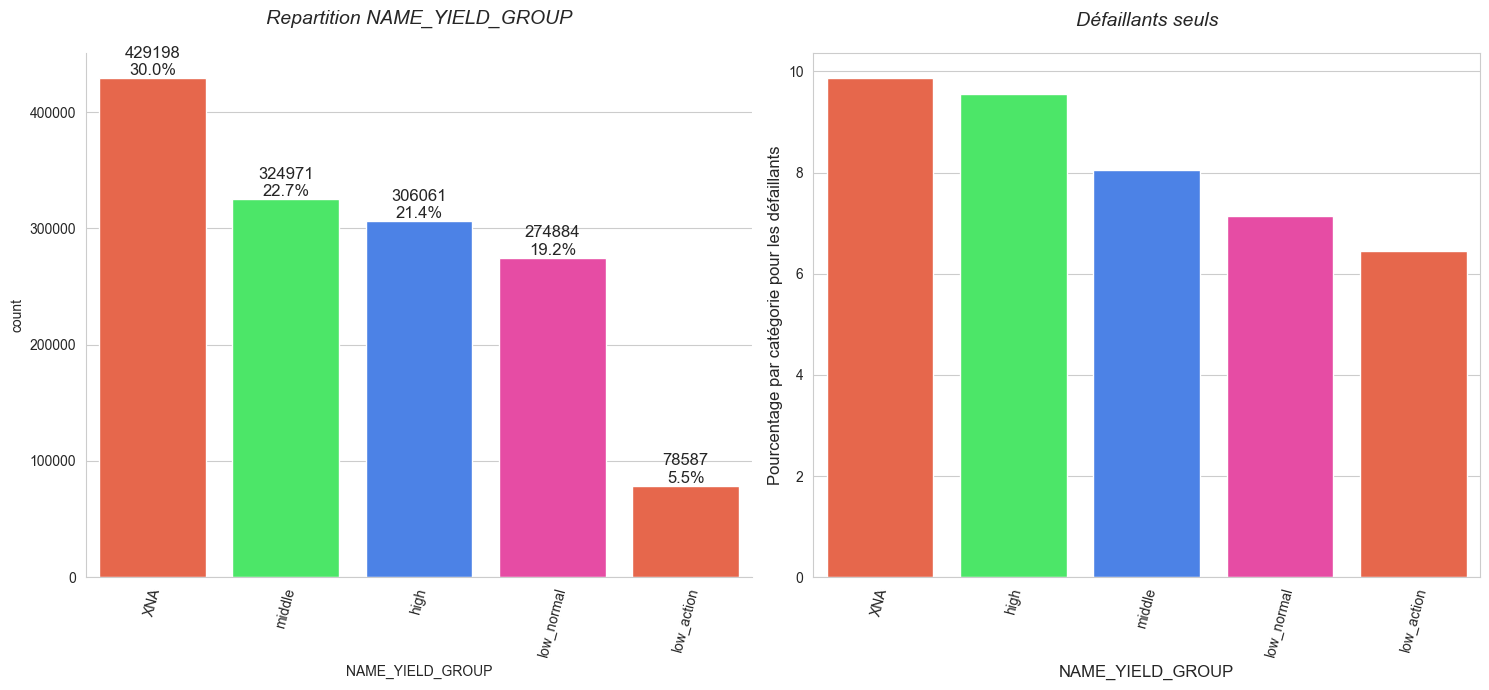

In [200]:
categ_var_bar(prev_merged, 'NAME_YIELD_GROUP', custom_palette, "Repartition NAME_YIELD_GROUP\n", (15, 7), rotation=75, plot_defaulter=True)

**Bilan** :
*** 
- Les taux d'intérêt groupé de la demande précédente sont moyens pour les non-défaillants et élevés pour les défaillants.

<span style='background:violet'>**Analyse des variables quantitatives**</span>

In [201]:
# Liste des variables quantitatives
cols_num_prev = \
    prev_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num_prev

['SK_ID_CURR',
 'TARGET',
 'SK_ID_PREV',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

<span style='background:mistyrose'>**Variable DAYS_DECISION**</span>

Nombre de jours, par rapport à la demande actuelle, où la décision a été prise concernant la demande précédente.

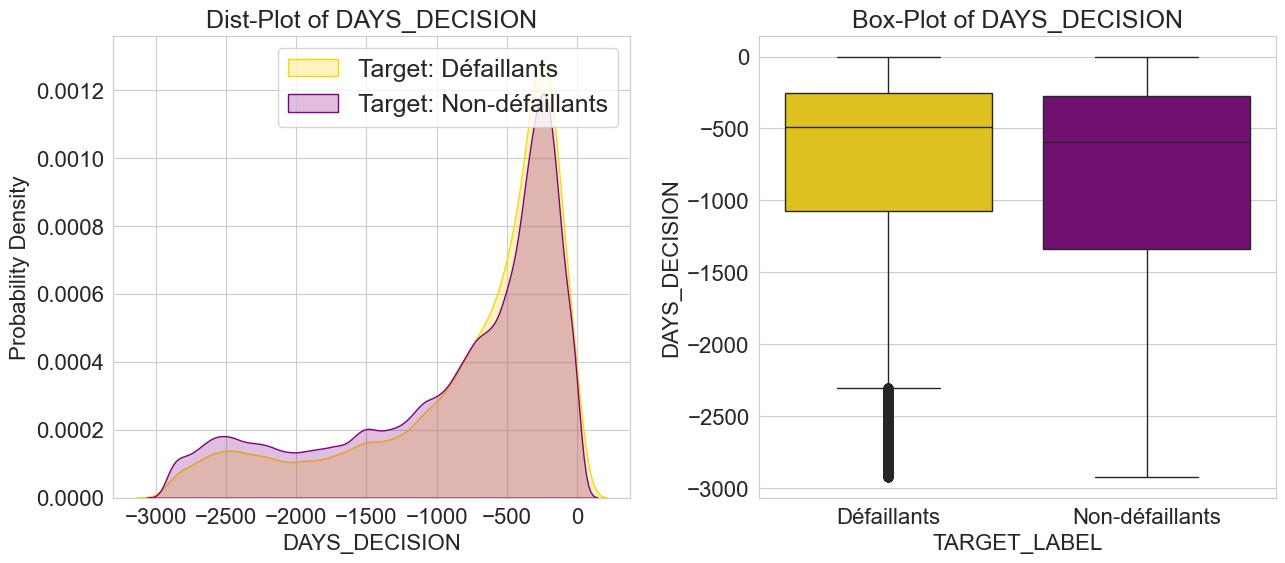

In [203]:
fonctions_data.plot_continuous_variables(prev_merged, 'DAYS_DECISION', plots=['distplot', 'box'], figsize=(15, 6))

**Bilan** :
***
-  Le nombre de jours depuis lequel la décision a été prise est un peu moins élevé que pour les non-défaillants.- 
Cela implique que la décision sur les demandes précédentes des défaillants est généralement plus récente que celle des non-défaillants.

<span style='background:mistyrose'>**Variable DAYS_FIRST_DRAWING**</span>

Nombre de jours depuis la demande actuelle où le premier déboursement de la demande précédente a été effectué.

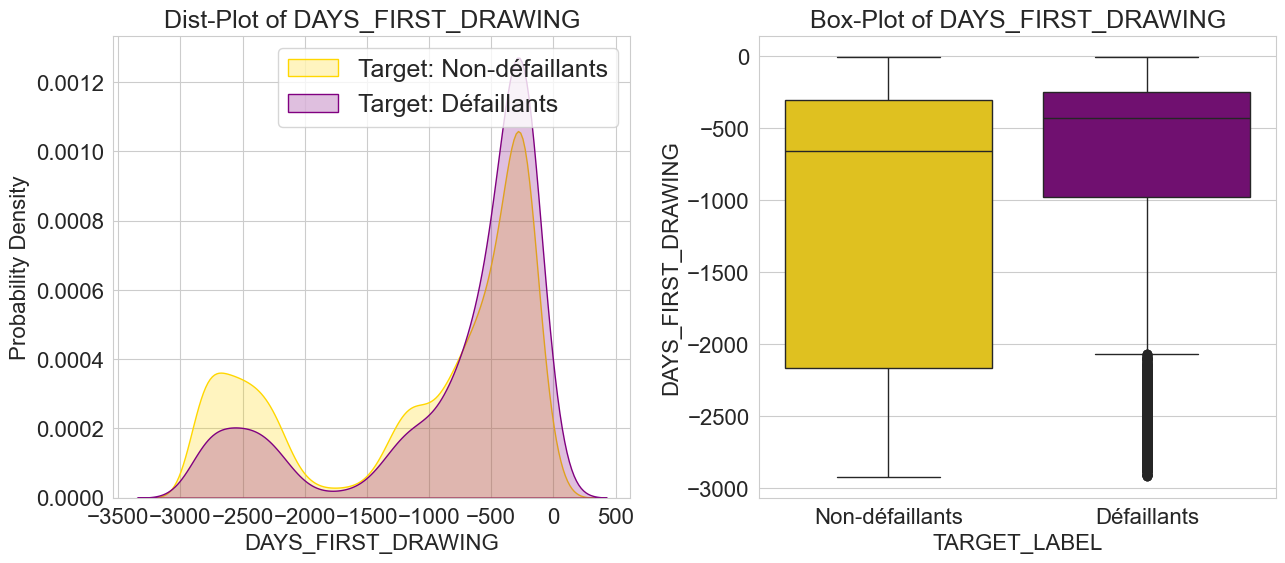

In [207]:
fonctions_data.plot_continuous_variables(prev_merged, 'DAYS_FIRST_DRAWING', plots=['distplot', 'box'], figsize=(15, 6), scale_limits=[-3000, 0])

**Bilan** :
***
- La valeur du 75e percentile pour les défaillants est également nettement inférieure à celle des non-défaillants.

<span style='background:mistyrose'>**Variable DAYS_FIRST_DUE**</span>

Par rapport à la date d'application de l'application actuelle quand la première échéance était-elle censée être celle de l'application précédente ?

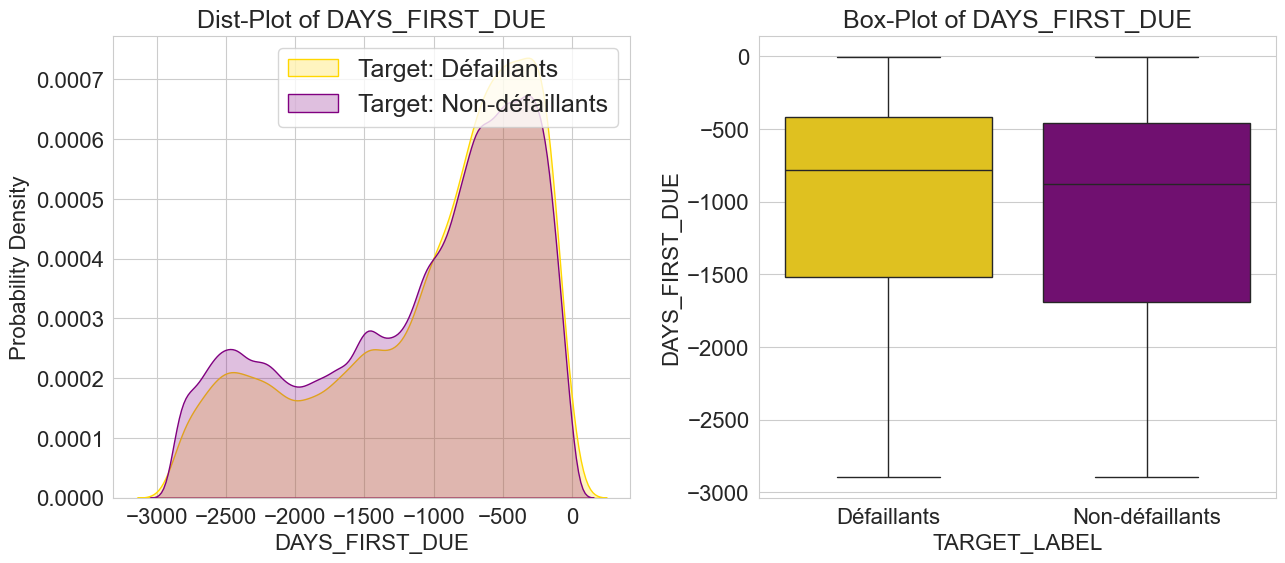

In [208]:
fonctions_data.plot_continuous_variables(prev_merged, 'DAYS_FIRST_DUE', plots=['distplot', 'box'], figsize=(15, 6), scale_limits=[-3000, 0])

<span style='background:mistyrose'>**Variable DAYS_LAST_DUE**</span>

Par rapport à la date de demande de la demande actuelle quelle était la première échéance de la demande précédente ?

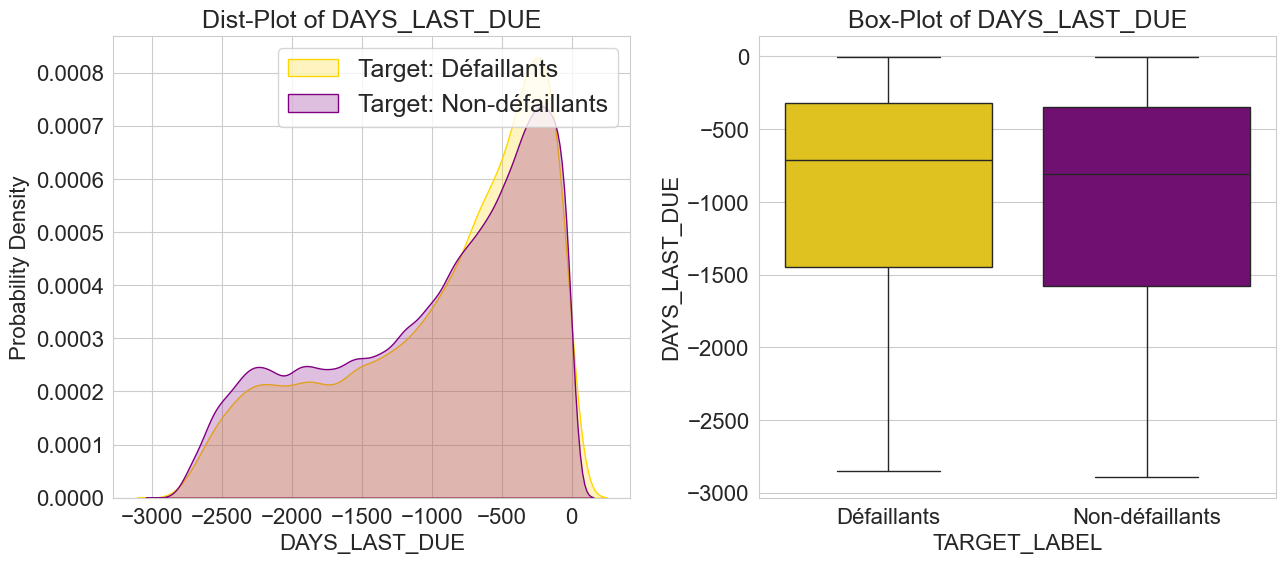

In [209]:
fonctions_data.plot_continuous_variables(prev_merged, 'DAYS_LAST_DUE', plots=['distplot', 'box'], figsize=(15, 6), scale_limits=[-3000, 0])

<span style='background:mistyrose'>**Variable DAYS_LAST_DUE_1ST_VERSION**</span>

Quelle était la première échéance de la demande précédente ?

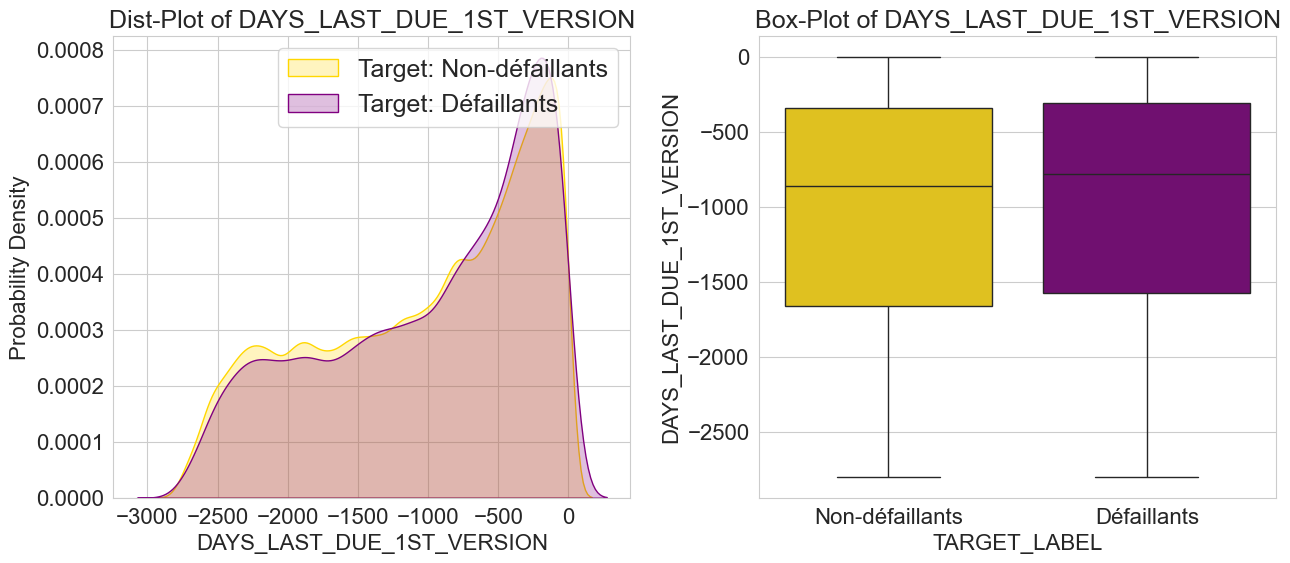

In [210]:
fonctions_data.plot_continuous_variables(prev_merged, 'DAYS_LAST_DUE_1ST_VERSION', plots=['distplot', 'box'], figsize=(15, 6), scale_limits=[-3000, 0])

<span style='background:mistyrose'>**Variable DAYS_TERMINATION**</span>

Durée prévue de la fin de l'application ?

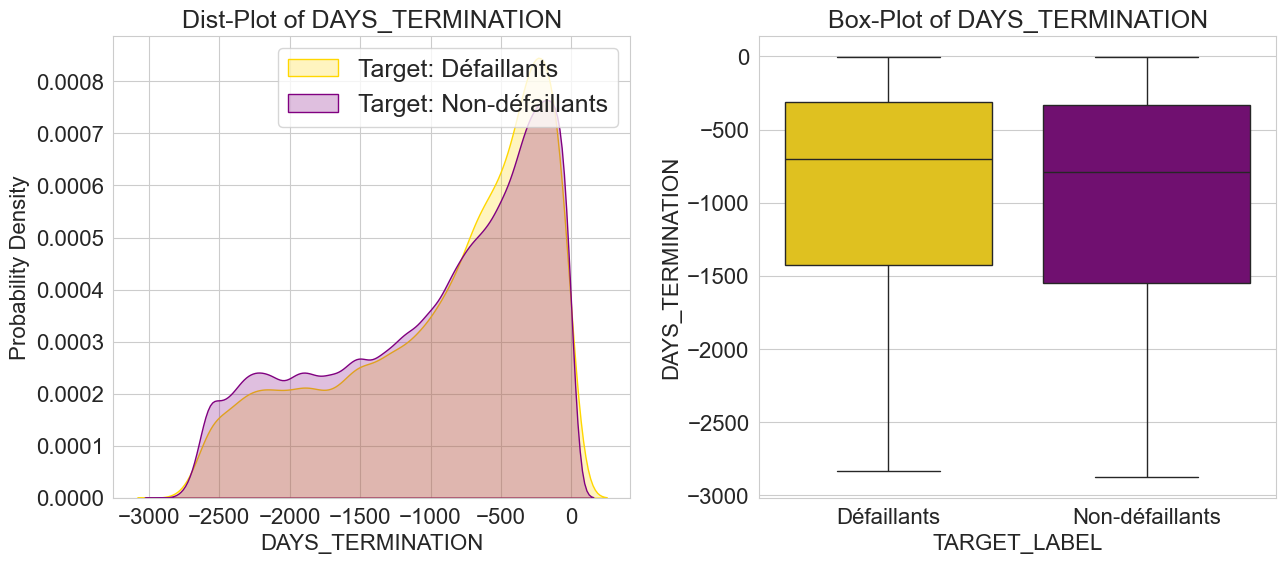

In [211]:
fonctions_data.plot_continuous_variables(prev_merged, 'DAYS_TERMINATION', plots=['distplot', 'box'], figsize=(15, 6), scale_limits=[-3000, 0])

**Bilan** :
***
-  Toutes les variables Days ont ces valeurs erronées quelque part. - Ces valeurs doivent donc être remplacées afin que notre modèle ne soit pas affecté par celles-ci.

<span style='background:mistyrose'>**Variable AMT_ANNUITY**</span>

Annuité de la demande précédente.

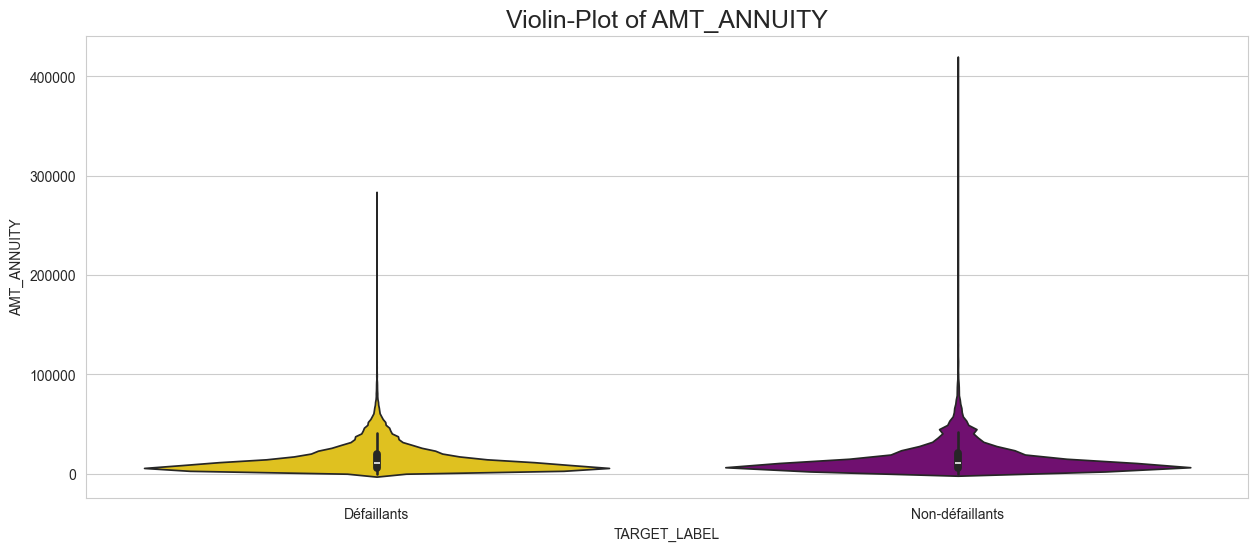

In [212]:
fonctions_data.plot_continuous_variables(prev_merged, 'AMT_ANNUITY', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable  AMT_APPLICATION**</span>

Montant de crédit le demandeur a-t-il demandé lors de la demande précédente.

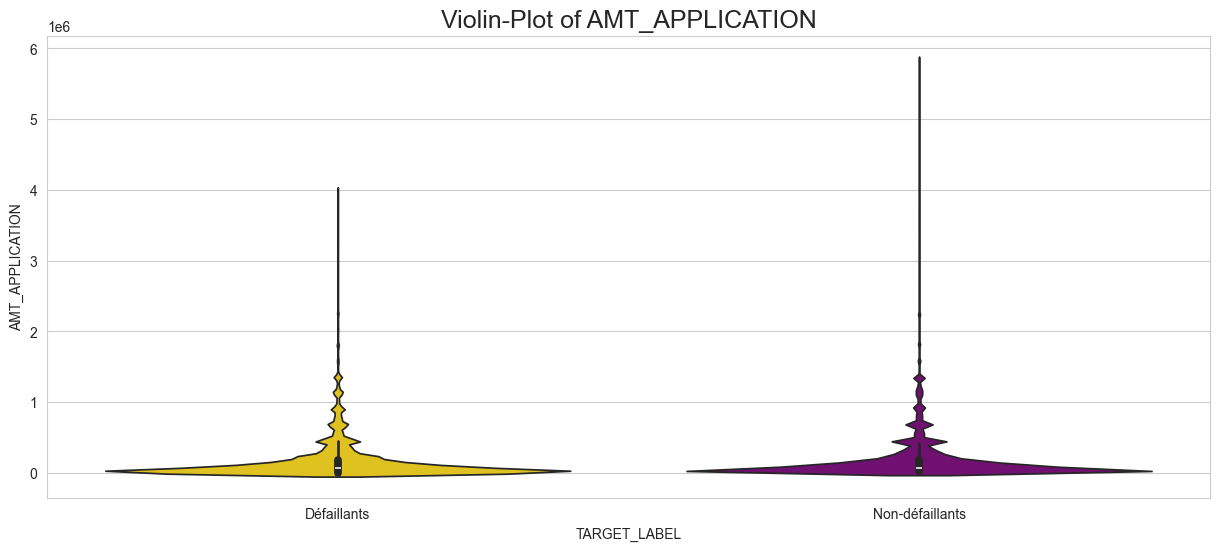

In [214]:
fonctions_data.plot_continuous_variables(prev_merged, 'AMT_APPLICATION', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable AMT_CREDIT**</span>

Montant final du crédit sur la demande précédente.

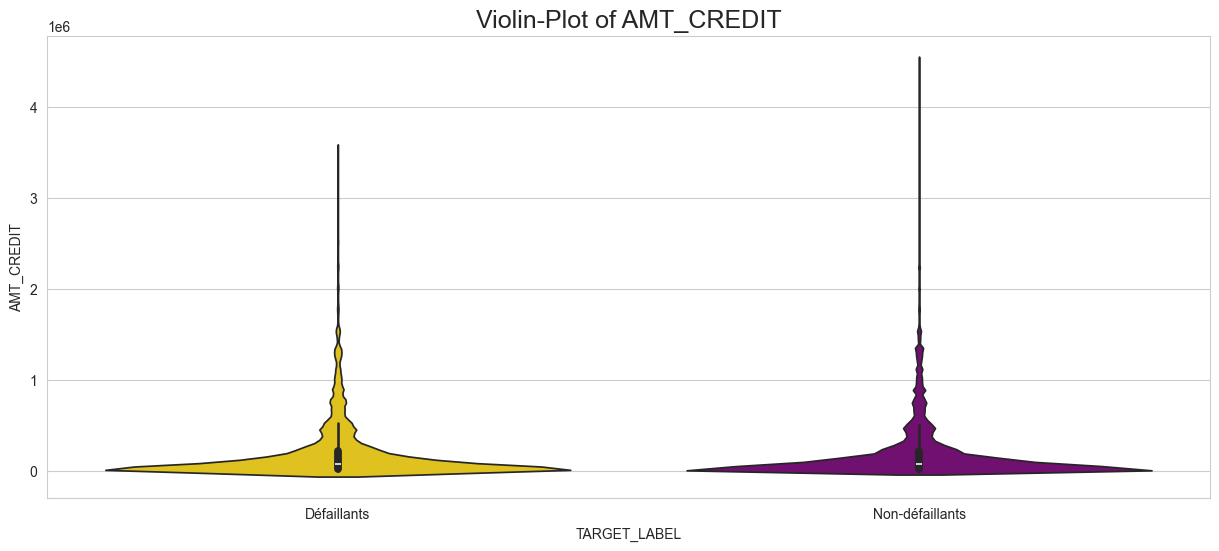

In [215]:
fonctions_data.plot_continuous_variables(prev_merged, 'AMT_CREDIT', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable AMT_DOWN_PAYMENT**</span>

Acompte sur la demande précédente.

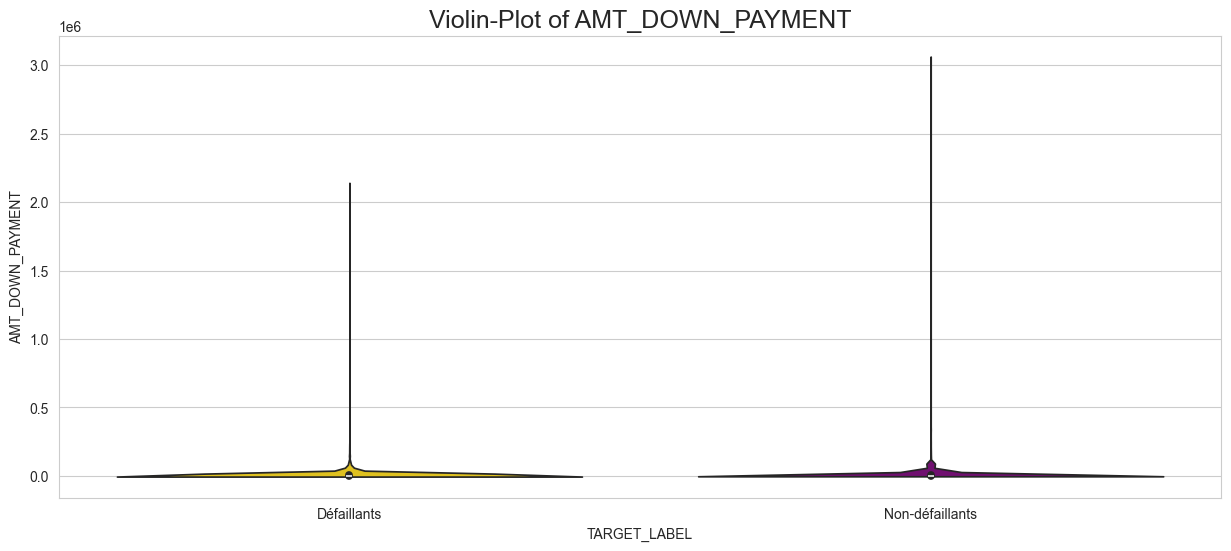

In [216]:
fonctions_data.plot_continuous_variables(prev_merged, 'AMT_DOWN_PAYMENT', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable AMT_GOODS_PRICE**</span>

Prix du bien que le demandeur a demandé (le cas échéant) sur la demande précédente.

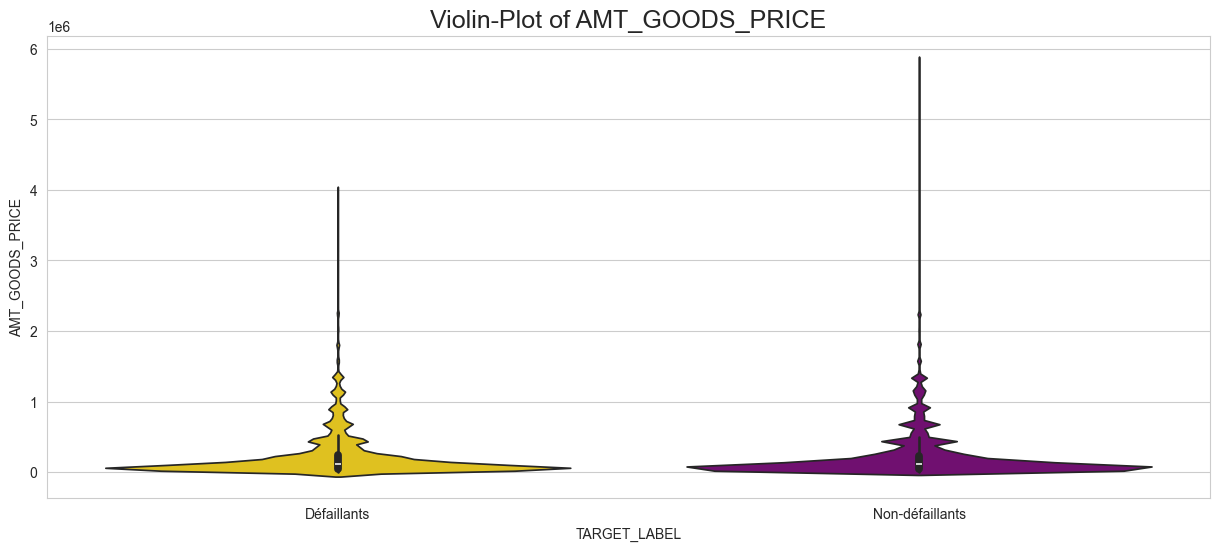

In [217]:
fonctions_data.plot_continuous_variables(prev_merged, 'AMT_GOODS_PRICE', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable HOUR_APPR_PROCESS_START**</span>

Heure environ le demandeur a-t-il fait sa demande pour la demande précédente ?

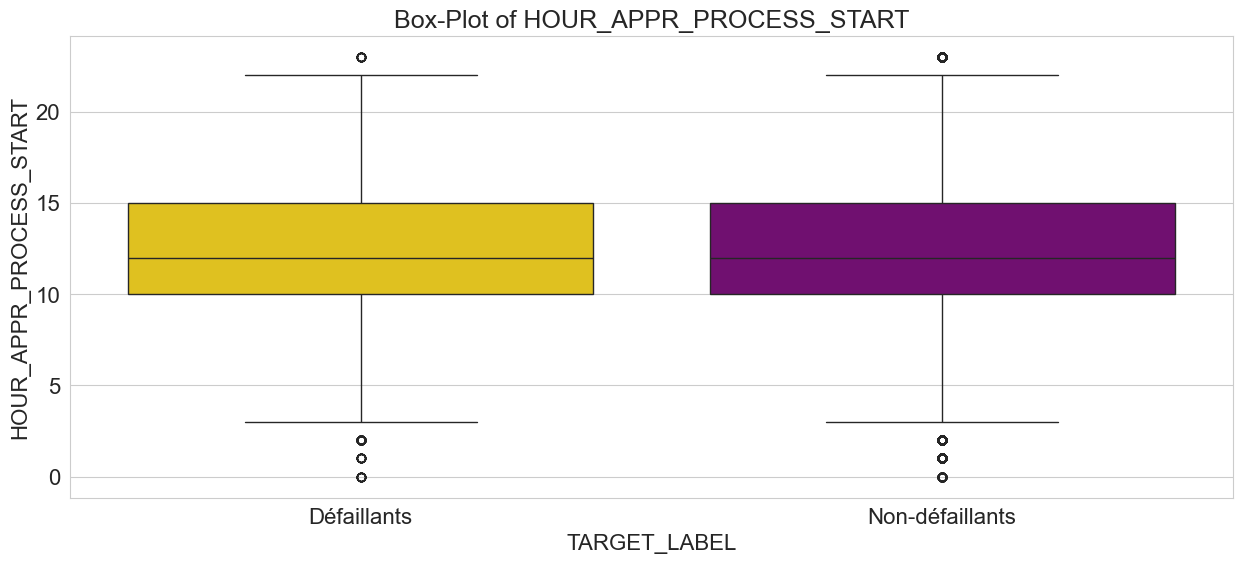

In [219]:
fonctions_data.plot_continuous_variables(prev_merged, 'HOUR_APPR_PROCESS_START', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable NFLAG_LAST_APPL_IN_DAY**</span>

Indicateur indiquant si la demande était la dernière demande par jour du demandeur.

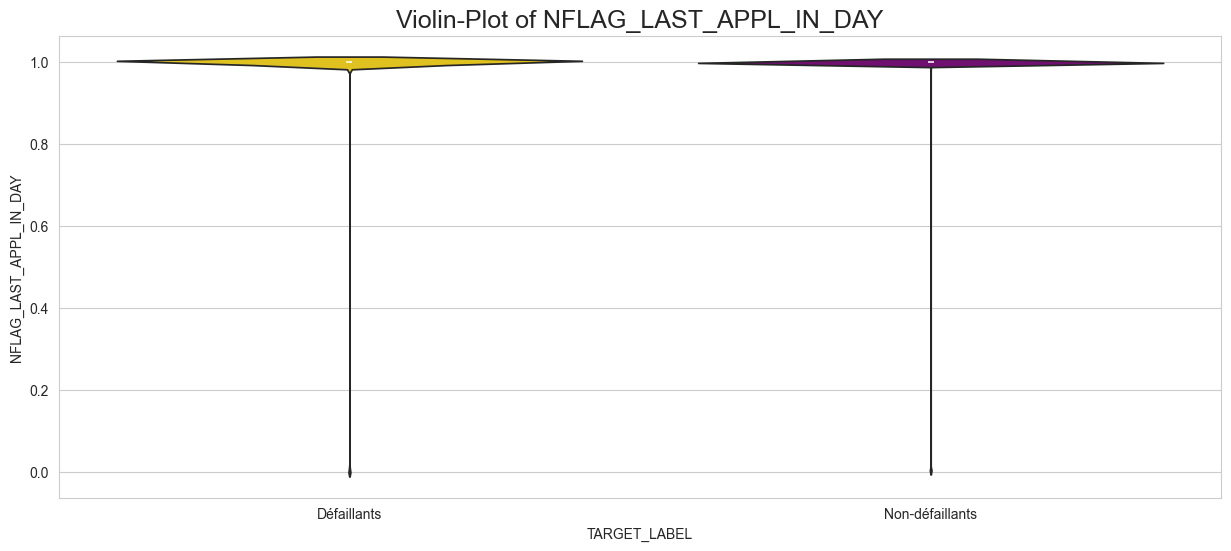

In [220]:
fonctions_data.plot_continuous_variables(prev_merged, 'NFLAG_LAST_APPL_IN_DAY', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable RATE_DOWN_PAYMENT**</span>

Taux d'acompte normalisé sur le crédit antérieur.

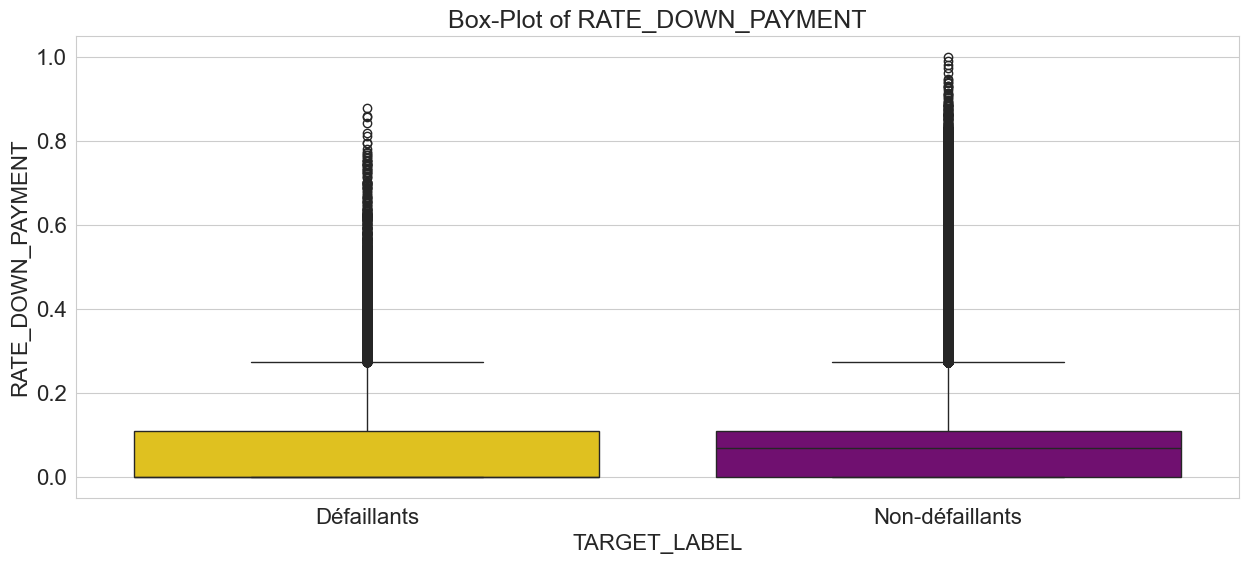

In [221]:
fonctions_data.plot_continuous_variables(prev_merged, 'RATE_DOWN_PAYMENT', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable RATE_INTEREST_PRIMARY**</span>

Taux d'intérêt normalisé sur le crédit antérieur.

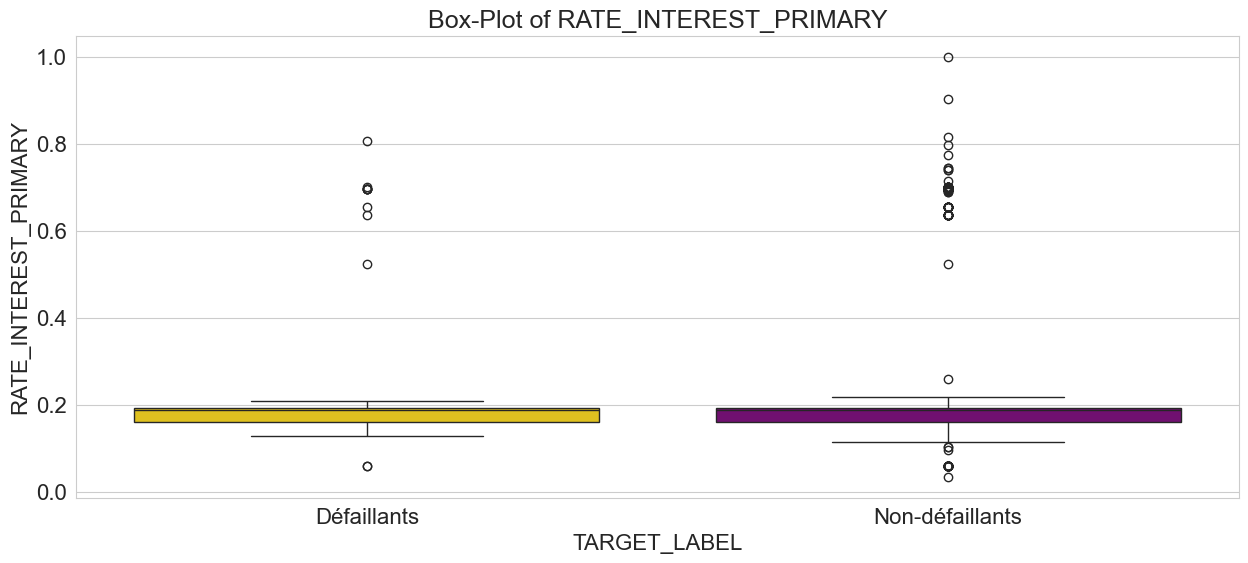

In [222]:
fonctions_data.plot_continuous_variables(prev_merged, 'RATE_INTEREST_PRIMARY', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable  RATE_INTEREST_PRIVILEGED**</span>

Taux d'intérêt normalisé sur le crédit antérieur.

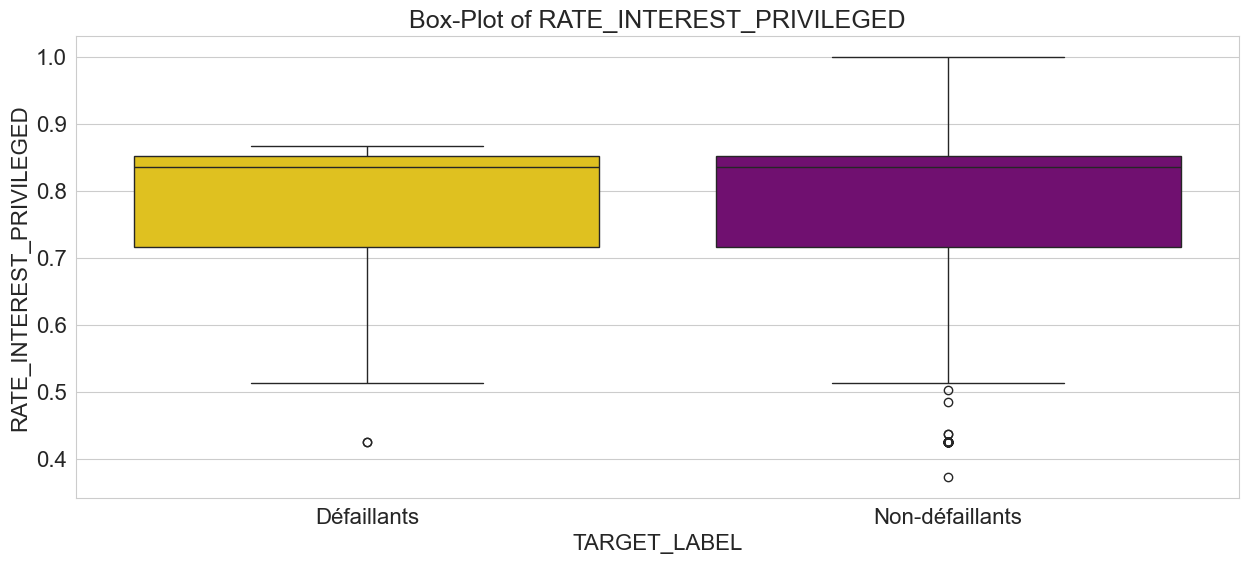

In [224]:
fonctions_data.plot_continuous_variables(prev_merged, 'RATE_INTEREST_PRIVILEGED', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable SELLERPLACE_AREA**</span>

Zone de vente du vendeur, lieu de la demande précédente.

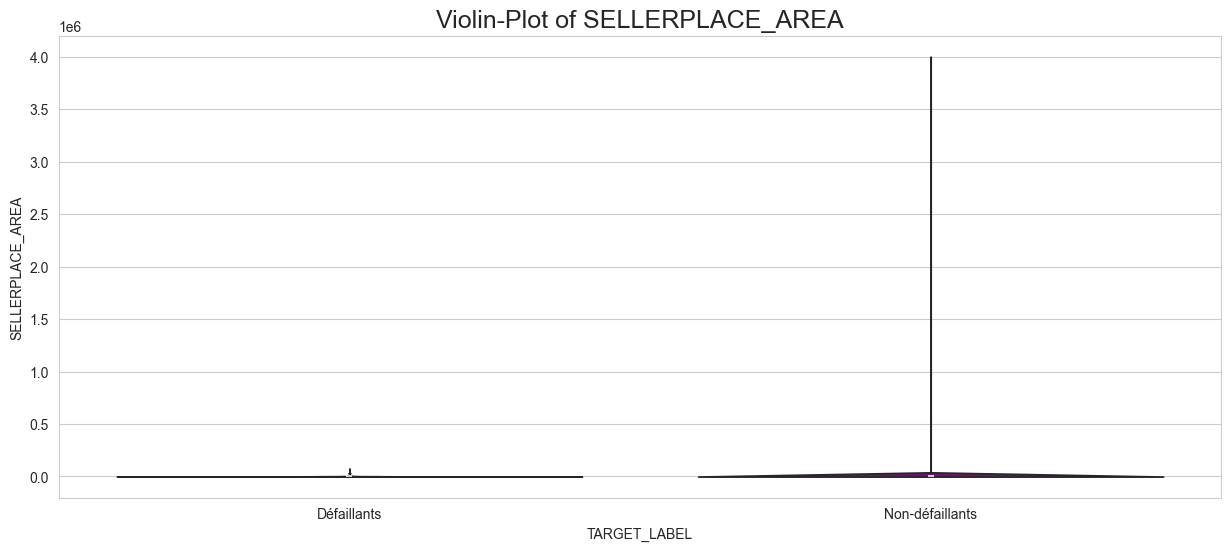

In [225]:
fonctions_data.plot_continuous_variables(prev_merged, 'SELLERPLACE_AREA', plots=['violin'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable CNT_PAYMENT**</span>

Durée du crédit précédent à la demande de la demande précédente.

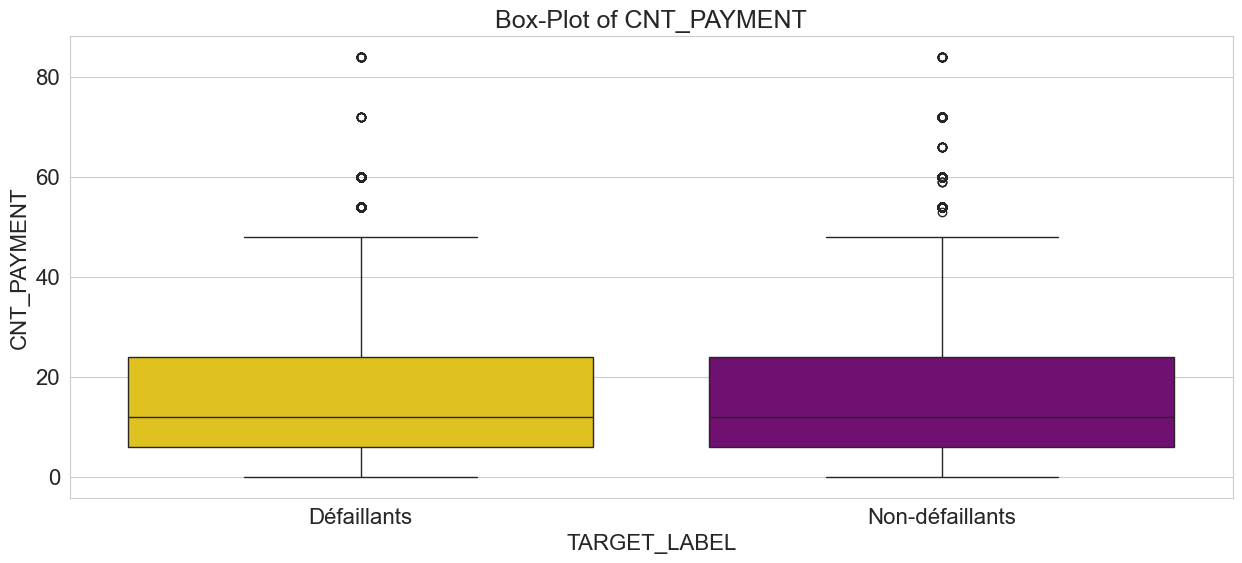

In [226]:
fonctions_data.plot_continuous_variables(prev_merged, 'CNT_PAYMENT', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

<span style='background:mistyrose'>**Variable NFLAG_INSURED_ON_APPROVAL**</span>

Le demandeur a-t-il demandé une assurance lors de la demande précédente ?

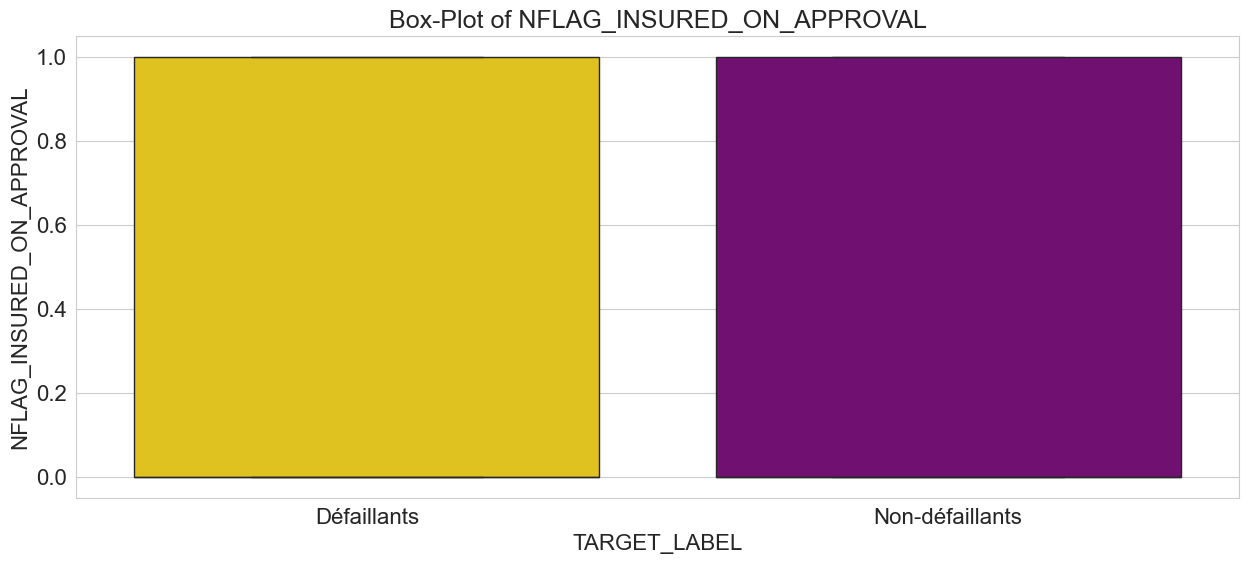

In [227]:
fonctions_data.plot_continuous_variables(prev_merged, 'NFLAG_INSURED_ON_APPROVAL', plots=['box'], figsize=(15, 6))

**Bilan** :
***
- Peu de différence.

#### <span style='background:Moccasin'>2.6.3. Analyse multivariée des colonnes</span>

<span style='background:mistyrose'>**Corrélation sur les variables categorielles**</span>

**Phi-K matrix**

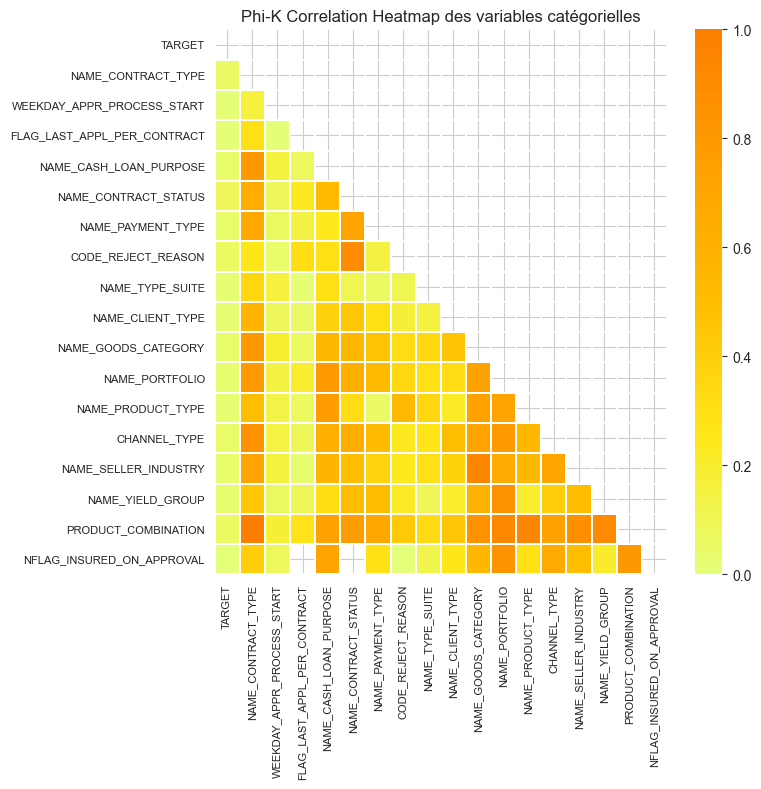

In [230]:
cols_for_phik = ['TARGET', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
                 'CREDIT_TYPE']

cols_for_phik = ['TARGET'] +  prev_merged.dtypes[prev_merged.dtypes == 'object'].index.tolist() \
    + ['NFLAG_INSURED_ON_APPROVAL']
fonctions_data.plot_phik_matrix(prev_merged, cols_for_phik, figsize=(8, 8), fontsize=8, cmap='Wistia')

**Bilan** :
***
À partir de la carte thermique ci-dessus des valeurs du coefficient Phi-K pour les variables catégorielles, nous observons que :
- La variables PRODUCT_COMBINATION montre une association avec beaucoup d'autres variables telles que NAME_CONTRACT_TYPE, NAME_PRODUCT_TYPE, NAME_PORTFOLIO, etc.
- La variable NOM_GOODS_CATEGORY est également fortement associée à NOM_SELLER_INDUSTRY.
- Si nous examinons l'association avec la variable TARGET, nous constatons que les variables NAME_CONTRACT_STATUS, PRODUCT_COMBINATION, CODE_REJECT_REASON font partie des variables les plus fortement associées et devraient faire l'objet d'une étude plus approfondie.

<span style='background:mistyrose'>**Corrélation sur les variables numériques**</span>

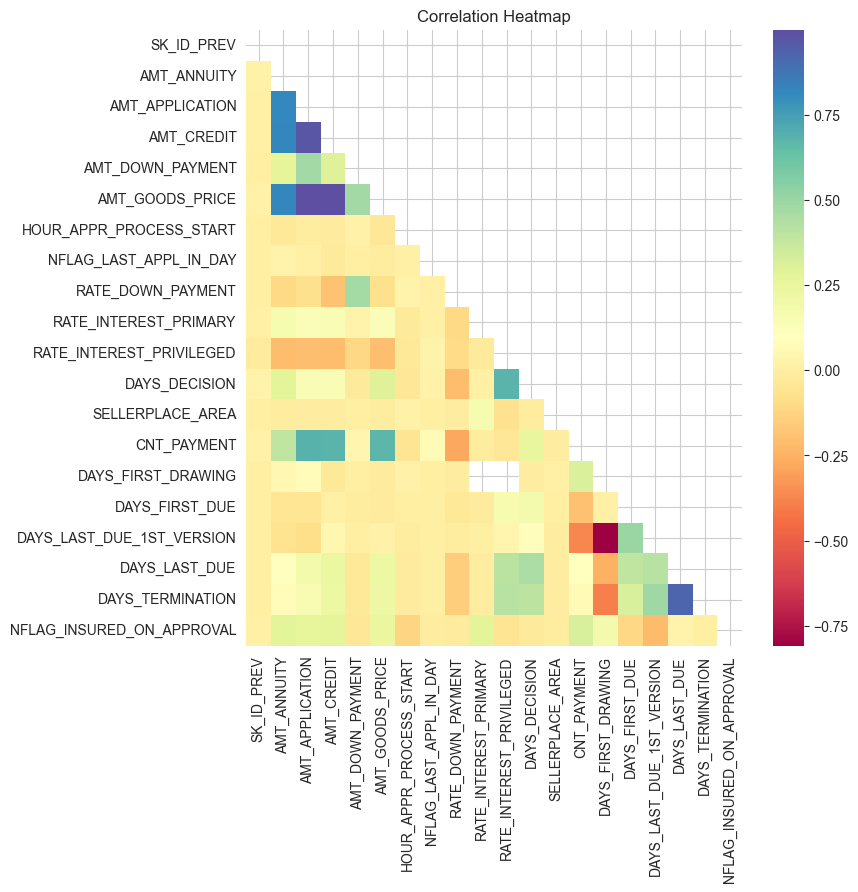

In [232]:
# Heatmap des variables numériques
categorical_columns = prev_merged.select_dtypes(exclude=[np.number]).columns.to_list()

columns_to_drop = ['SK_ID_CURR'] + list(set(categorical_columns)
                                        - set(['TARGET']))

ext_data = prev_merged.drop(columns_to_drop + ['TARGET'], axis=1)

plt.figure(figsize = (8, 8))
mask = np.triu(np.ones_like(ext_data.corr()))
    
# Heatmap of correlations
sns.heatmap(ext_data.corr(), mask = mask, cmap = plt.cm.Spectral)
plt.title('Correlation Heatmap');

**Bilan** :
***
- La carte thermique ci-dessus montre la corrélation entre chaque variable du fichier previous_application et le reste des caractéristiques.
- Sur la carte thermique, nous pouvons voir certaines variables fortement corrélées qui ont une couleur plus foncée.
- La forte corrélation est particulièrement observée pour les variables :
    - DAYS_TERMINATION et DAYS_DERNIER_DUE,
    - AMT_CREDIT et AMT_APPLICATION,
    - AMT_APPLICATION et AMT_GOODS_PRICE,
    - AMT_CREDIT et AMT_ANNUITE,
    - AMT_ANNUITY et AMT_CREDIT,
    - AMT_CREDIT et AMT_GOODS_PRICE.
- Nous pouvons également constater que les variables ne présentent pas une corrélation particulièrement bonne/élevée avec Target en tant que tel. 

Cela implique qu'il n'y a pas vraiment de relation linéaire directe entre Target et les variables.

### <span style='background:orange'>2.7 Conclusions - EDA</span>

**Globalité**

À partir de l'analyse exhaustive des données que nous avons effectuée, nous pouvons tirer quelques conclusions de haut niveau sur notre ensemble de données.

- [x] Tout d'abord, l'ensemble des données devra être fusionné d'une manière ingénieuse pour que les données fusionnées aient un sens.
- [x] Certaines variables sont très discriminantes entre les défaillants et les non-défaillants, ce qui pourrait être important pour la classification.
- [x] Il y a quelques variables numériques continues qui contiennent des points erronés, nous devrions traiter ces points.
- [x] Nous avons également remarqué quelques variables corrélées, qui ne feraient qu'augmenter la dimensionnalité des données, et n'ajouteraient pas beaucoup de valeur. Nous voudrions supprimer ces variables.
- [x] Dans l'ensemble, le jeu de données est déséquilibré, et nous devrions trouver des techniques pour gérer ce déséquilibre.
- [x] Pour la prédiction du risque de défaillance, les défaillants ont généralement tendance à avoir un comportement qui n'est pas normal, et donc, nous ne pouvons pas supprimer les points aberrants ou éloignés, car ils peuvent suggérer une tendance importante de défaillance.

**Variables à retenir/avec valeurs aberrantes**

| Fichier | Var. intéressante | Var. avec valeurs aberrantes |
| --- | --- | --- |
| <p style='text-align: justify;'>**application_train.csv** </p> | <ul style='text-align: justify;'><li>NAME_CONTRACT_TYPE</li> <li>CODE_GENDER</li> <li>FLAG_EMP_PHONE</li> <li>REGION_RATING_CLIENT_W_CITY</li> <li>NAME_EDUCATION_TYPE</li> <li>OCCUPATION_TYPE</li> <li>ORGANIZATION_TYPE</li> <li>REG_CITY_NOT_LIVE_CITY</li> <li>REG_CITY_NOT_WORK_CITY</li> <li>LIVE_CITY_NOT_WORK_CITY</li> <li>FLAG_DOCUMENT_3</li> <li>FLAG_DOCUMENT_2</li> <li>FLAG_DOCUMENT_13</li> <li>FLAG_DOCUMENT_14</li> <li>FLAG_DOCUMENT_15</li> <li>FLAG_DOCUMENT_17</li> <li>FLAG_DOCUMENT_21</li> <li>NAME_HOUSING_TYPE</li> <li>NAME_FAMILY_STATUS</li> <li>NAME_INCOME_TYPE</li> <li>NAME_TYPE_SUITE</li> <li>EMERGENCYSTATE_MODE</li> <li>FLAG_CONT_MOBILE</li> <li>DAYS_BIRTH</li> <li>DAYS_EMPLOYED</li> <li>DAYS_REGISTRATION</li> <li>DAYS_ID_PUBLISH</li> <li>EXT_SOURCE_1</li> <li>EXT_SOURCE_2</li> <li>EXT_SOURCE_3</li> <li>FLOORSMAX_AVG</li> <li>FLOORSMIN_AVG</li> <li>DAYS_LAST_PHONE_CHANGE</li> </ul> | <ul style='text-align: justify;'><li>DAYS_EMPLOYED : à partir du percentile 90, valeur de 365243 jours donc 1000 ans !</li> </ul> |
| <p style='text-align: justify;'>**bureau.csv** </p> | <ul style='text-align: justify;'><li>CREDIT_ACTIVE</li> <li>CREDIT_CURRENCY</li> <li>CREDIT_TYPE</li> <li>DAYS_CREDIT</li> <li>DAYS_ENDDATE_FACT</li> <li>DAYS_CREDIT_UPDATE</li> </ul> | <ul style='text-align: justify;'><li>DAYS_CREDIT_ENDDATE : 42060 jours ou 115 ans. Cela n'a pas beaucoup de sens car cela implique que le précédent prêt du demandeur remonte à 115 ans.</li> <li>DAYS_CREDIT_UPDATE : 41947 jours ou 114 ans. Cela n'a pas beaucoup de sens car cela implique que l'information du Bureau du Crédit remonte à 114 ans.</li> </ul> |
| <p style='text-align: justify;'>**bureau_balance.csv** </p> | <ul style='text-align: justify;'><li>STATUS</li> <li>MONTHS_BALANCE</li> </ul> |  |
| <p style='text-align: justify;'>**credit_card_balance.csv** </p> | <ul style='text-align: justify;'><li>NAME_CONTRACT_STATUS</li> <li>AMT_BALANCE</li> <li>AMT_TOTAL_RECEIVABLE</li> <li>CNT_INSTALMENT_MATURE_CUM</li> <li>MONTHS_BALANCE</li> <li>AMT_DRAWINGS_CURRENT</li> <li>AMT_INST_MIN_REGULARITY</li> <li>AMT_RECEIVABLE_PRINCIPAL</li> <li>AMT_RECIVABLE</li> </ul> |  |
| <p style='text-align: justify;'>**installments_payments.csv** </p> | <ul style='text-align: justify;'><li>DAYS_INSTALMENT</li> <li>DAYS_ENTRY_PAYMENT</li> </ul> |  |
| <p style='text-align: justify;'>**POS_CASH_balance.csv** </p> | <ul style='text-align: justify;'><li>NAME_CONTRACT_STATUS</li> </ul> |  |
| <p style='text-align: justify;'>**previous_application.csv** </p> | <ul style='text-align: justify;'><li>NAME_CONTRACT_TYPE</li> <li>NAME_CONTRACT_STATUS</li> <li>CODE_REJECT_REASON</li> <li>CHANNEL_TYPE</li> <li>PRODUCT_COMBINATION</li> <li>NAME_CASH_LOAN_PURPOSE</li> <li>NAME_PAYMENT_TYPE</li> <li>NAME_TYPE_SUITE</li> <li>NAME_CLIENT_TYPE</li> <li>NAME_GOODS_CATEGORY</li> <li>NAME_PORTFOLIO</li> <li>NAME_PRODUCT_TYPE</li> <li>DAYS_DECISION</li> <li>DAYS_FIRST_DRAWING</li> <li>DAYS_FIRST_DUE</li> </ul> | <ul style='text-align: justify;'><li>DAYS_FIRST_DRAWING : à partir du 7ième percentile, la valeur est erronée (365243 jours ~ 1000 ans).</li> <li>DAYS_FIRST_DUE : pour le percentile 100, la valeur est erronée (365243 jours ~ 1000 ans).</li> <li>DAYS_LAST_DUE : à partir du 80ième percentile, la valeur est erronée (365243 jours ~ 1000 ans).</li> <li>DAYS_LAST_DUE_1ST_VERSION : pour le percentile 100, la valeur est erronée (365243 jours ~ 1000 ans).</li> <li>DAYS_TERMINATION : à partir du percentile 80, la valeur est erronée (365243 jours ~ 1000 ans).</li> </ul>  |

Avec toutes ces informations, nous allons passer à la phase de :
   - nettoyage,
   - et de feature engineering.